In [1]:
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import rgb2hex
plt.style.use('paper.mplstyle')
from matplotlib import gridspec

import glob

In [2]:
def data_path(loc):
    return '/data/user/qliu/DM/DMFlux/Pythia/no_EW/secluded/{}/new/'.format(loc)

In [3]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.
    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [4]:
names = ['ee', 'uu', 'bb', 'WW', 'tt', 'tautau']
labels = [r'$e^{+}e^{-}$', r'$u\bar{u}$', r'$b\bar{b}$', r'$W^{+}W^{-}$', r'$t\bar{t}$', r'$\tau^{+}\tau^{-}$',]
cmaps = ['viridis', 'plasma', 'inferno', 'magma',]
lss = ['-','-','-','-','--','-',][::-1]
locs = ['Sun','Halo']
nu_labels = [r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$']
lw = 3

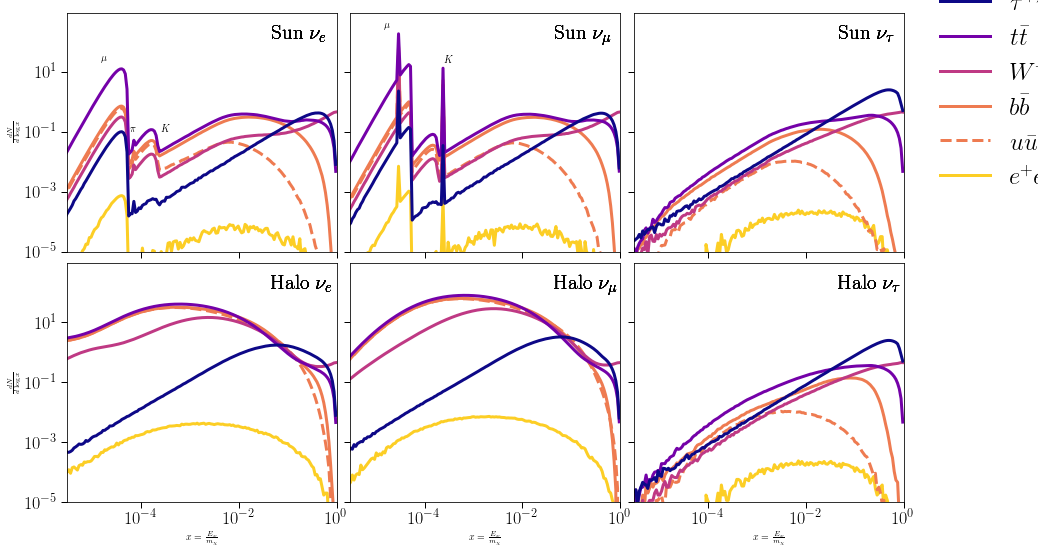

In [5]:
cmap = cm.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0.9,0,len(names)-1)]
fig, axs = plt.subplots(2,3, figsize=(15,9), gridspec_kw={'hspace': 0.05, 'wspace': 0.05})
axs_pos = [(i,j) for i in [0,1] for j in [0,1,2]]
loc_labels = [r'%s %s' % (l,lab) for l in locs for lab in nu_labels]
m = 1000

# plt.xlabel()
# plt.ylabel(r'$\frac{dN}{d\log x}$')

plt_tups = [
            (names[0], lss[0], colors[0], labels[0]),
            (names[1], lss[1], colors[1], labels[1]),
            (names[2], lss[2], colors[1], labels[2]),
            (names[3], lss[3], colors[2], labels[3]),
            (names[4], lss[4], colors[3], labels[4]),
            (names[5], lss[5], colors[4], labels[5]),
           ]
legend_elements = []
legend_elements.append(Line2D([0], [0], color=colors[4], label=labels[5], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[3], label=labels[4], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[2], label=labels[3], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[1], label=labels[2], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[1], label=labels[1], lw=lw, linestyle='--'))
legend_elements.append(Line2D([0], [0], color=colors[0], label=labels[0], lw=lw))



# fig, axs = plt.subplots(2, 3)
for name, ls, c, lb in plt_tups:
    for (i,j),ll in zip(axs_pos, loc_labels):
        loc = locs[i]
        path = data_path(loc)
        ax = axs[i,j]
        data = np.genfromtxt('%s/%s_%d_%s_ann_log.dat' % (path, name, m, loc))
        x = data[:,0]/float(m)
        y = data[:,2*j+1]+data[:,2*j+2]
        if i==0:
            ax.plot(x,y, color=c, label=lb, ls=ls, lw=lw)
        else:
            ax.plot(x,y, color=c, ls=ls, lw=lw)
        ax.loglog()
        ax.set_xlim(3e-6,1)
        ax.set_ylim(1e-5,9e2)
        ax.text(0.045,100,ll, fontsize=21)
        if i==1:
            ax.set_xlabel(r'$x=\frac{E_{\nu}}{m_{\chi}}$')
        if j==0:
            ax.set_ylabel(r'$\frac{dN}{d\log x}$')


fig.legend(
           handles=legend_elements, 
           ncol=1, 
#            loc='upper right', 
           bbox_to_anchor=(1.03, 0.9),
           frameon=False
          )
for ax in axs.flat:
    ax.label_outer()
#         ax.grid(which='major')

ax = axs[0,0]
ax.text(1.5e-5, 2.3e1,  r'$\mu$')
ax.text(2.5e-4, 1.0e-1, r'$K$')
ax.text(6.0e-5, 1.0e-1, r'$\pi$')
ax = axs[0,1]
ax.text(1.5e-5, 2.8e2,  r'$\mu$')
ax.text(2.5e-4, 2.0e1, r'$K$')
#     ax.text(6.0e-5, 1.0e-1, r'$\pi$')
plt.savefig('plots/production_paper.png')
plt.show()

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


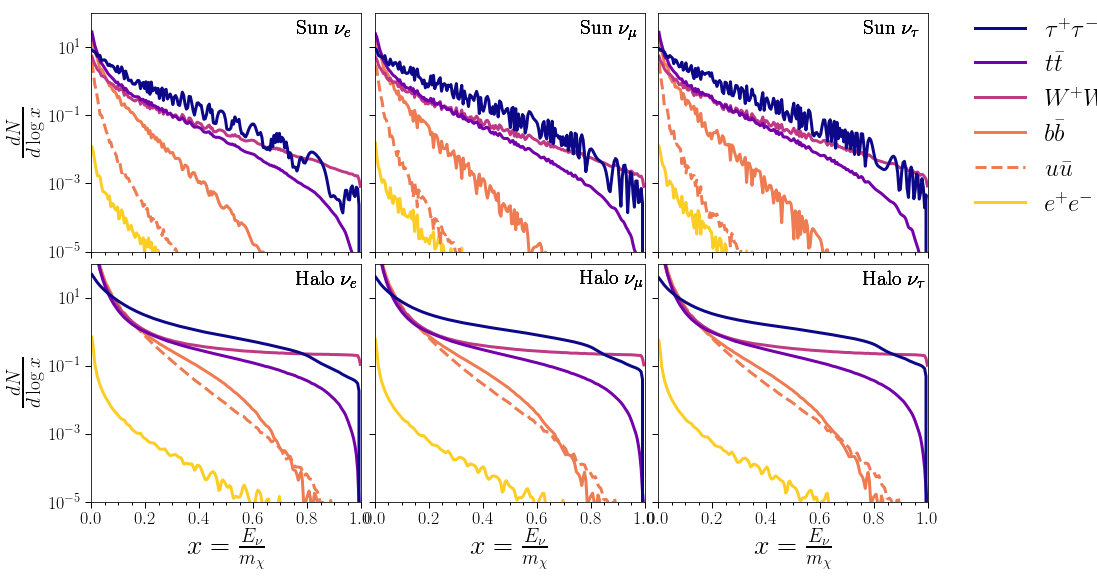

In [7]:
scream = [('nu_e','nu_e_bar'), ('nu_mu','nu_mu_bar'), ('nu_tau','nu_tau_bar')]
cmap = cm.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0.9,0,len(names)-1)]
fig, axs = plt.subplots(2,3, figsize=(15,9), gridspec_kw={'hspace': 0.05, 'wspace': 0.05})
axs_pos = [(i,j) for i in [0,1] for j in [0,1,2]]
loc_labels = [r'%s %s' % (l,lab) for l in locs for lab in nu_labels]
m = 1000

# plt.xlabel()
# plt.ylabel(r'$\frac{dN}{d\log x}$')

plt_tups = [
            (names[0], lss[0], colors[0], labels[0]),
            (names[1], lss[1], colors[1], labels[1]),
            (names[2], lss[2], colors[1], labels[2]),
            (names[3], lss[3], colors[2], labels[3]),
            (names[4], lss[4], colors[3], labels[4]),
            (names[5], lss[5], colors[4], labels[5]),
           ]
legend_elements = []
legend_elements.append(Line2D([0], [0], color=colors[4], label=labels[5], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[3], label=labels[4], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[2], label=labels[3], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[1], label=labels[2], lw=lw))
legend_elements.append(Line2D([0], [0], color=colors[1], label=labels[1], lw=lw, linestyle='--'))
legend_elements.append(Line2D([0], [0], color=colors[0], label=labels[0], lw=lw))



# fig, axs = plt.subplots(2, 3)
for name, ls, c, lb in plt_tups:
    for (i,j),ll in zip(axs_pos, loc_labels):
        loc = locs[i]
        path = '/data/user/qliu/DM/DMFlux/Pythia/no_EW/secluded/propa/propa_flux/'
        ax = axs[i,j]
        data = np.load('%s/%s_%d_det_180_%s.npy' % (path, name, m, loc.lower()))
        x = data['Energy']/float(m)
        y = data[scream[j][0]]+data[scream[j][1]]
        if i==0:
            ax.plot(x,y, color=c, label=lb, ls=ls, lw=lw)
        else:
            ax.plot(x,y, color=c, ls=ls, lw=lw)
        ax.semilogy()
        ax.set_xlim(0,1)
        ax.set_ylim(1e-5,1e2)
        ax.text(0.76, 20, ll, fontsize=21)
        if i==1:
            ax.set_xlabel(r'$x=\frac{E_{\nu}}{m_{\chi}}$')
        if j==0:
            ax.set_ylabel(r'$\frac{dN}{d\log x}$')


fig.legend(
           handles=legend_elements, 
           ncol=1, 
#            loc='upper right', 
           bbox_to_anchor=(1.05, 0.88),
           frameon=False,
           borderaxespad=0.
          )
for ax in axs.flat:
    ax.label_outer()
#         ax.grid(which='major')

#     ax = axs[0,0]
#     ax.text(1.5e-5, 2.3e1,  r'$\mu$')
#     ax.text(2.5e-4, 1.0e-1, r'$K$')
#     ax.text(6.0e-5, 1.0e-1, r'$\pi$')
#     ax = axs[0,1]
#     ax.text(1.5e-5, 2.8e2,  r'$\mu$')
#     ax.text(2.5e-4, 2.0e1, r'$K$')
#     ax.text(6.0e-5, 1.0e-1, r'$\pi$')
plt.tight_layout()
plt.savefig('plots/propagation_paper.png', bbox_inches='tight')
plt.show()

In [8]:
print(np.load('/data/user/qliu/DM/DMFlux/IceCubeSpectra/mvals.npy'))

[  500.          1000.          1584.89319246  2511.88643151
  3981.07170553  6309.5734448  10000.        ]


In [29]:
def gen_comp_tup(m, ws_ch):
    
    ws2pdg  = {5:'05', 8:'24', 11:'15'}
    m2roddm = {500:0, 1000.:1,  1600:2,  2500:3, 4000:4, 6300:5, 10000:6}
    ws2qr   = {5:'bb', 8:'WW', 11:'tautau'}
    
    data_path = '/data/user/jlazar/solar_WIMP/data/comparison_files/'
    
    pdgch = ws2pdg[ws_ch]
    qrch  = ws2qr[ws_ch]
        
    if m>=500:
        roddm = m2roddm[m]
        rodd_x           = np.load('%s/xvals.npy' % data_path)
        rodd_nu_flux     = np.load('%s/d_%s_2_14_m%d.npy' % (data_path, pdgch,roddm))/rodd_x
        rodd_nu_bar_flux = np.load('%s/d_%s_2_-14_m%d.npy' % (data_path, pdgch,roddm))/rodd_x
    else:
        rodd_x           = np.linspace(0,1,10)
        rodd_nu_flux     = np.zeros(10)
        rodd_nu_bar_flux = np.zeros(10)
    pppc_x           = np.genfromtxt('%s/%s_%d_pppc.dat' % (data_path, qrch, m))[:,0]
    pppc_nu_flux     = np.genfromtxt('%s/%s_%d_pppc.dat' % (data_path, qrch, m))[:,3]
    pppc_nu_bar_flux = np.genfromtxt('%s/%s_%d_pppc.dat' % (data_path, qrch, m))[:,4]
    pyth_x           = np.genfromtxt('%s/%s_%d.0_1_Sun_ann-2.dat' % (data_path, qrch, m))[:,0]/m
    pyth_nu_flux     = np.genfromtxt('%s/%s_%d.0_1_Sun_ann-2.dat' % (data_path, qrch, m))[:,1]
    pyth_nu_bar_flux = np.genfromtxt('%s/%s_%d.0_1_Sun_ann-3.dat' % (data_path, qrch, m))[:,1]
#     pyth_x           = np.genfromtxt('%s/%s_%d.dat' % (data_path, qrch, m))[:,0]/m
#     pyth_nu_flux     = np.genfromtxt('%s/%s_%d.dat' % (data_path, qrch, m))[:,3]
#     pyth_nu_bar_flux = np.genfromtxt('%s/%s_%d.dat' % (data_path, qrch, m))[:,4]
    ws_x             = np.linspace(0,1,200)
    ws_nu_flux       = np.genfromtxt('%s/wa-m%d-ch%d-sun-sum.dat' % (data_path, m, ws_ch))[2]
    ws_nu_bar_flux   = np.genfromtxt('%s/wa-m%d-ch%d-sun-sum.dat' % (data_path, m, ws_ch))[3]

    return [
            (pppc_x, pppc_nu_flux+pppc_nu_bar_flux),
            (rodd_x, rodd_nu_flux+rodd_nu_bar_flux),
            (pyth_x, pyth_nu_flux+pyth_nu_bar_flux),
            (ws_x, ws_nu_flux+ws_nu_bar_flux),
           ]


In [33]:
bb1000  = gen_comp_tup(1000, 5)
ww1000  = gen_comp_tup(1000, 8)
bb10000 = gen_comp_tup(10000, 5)
ww10000 = gen_comp_tup(10000, 8)
ww100 = gen_comp_tup(100, 8)
bb100 = gen_comp_tup(100, 5)

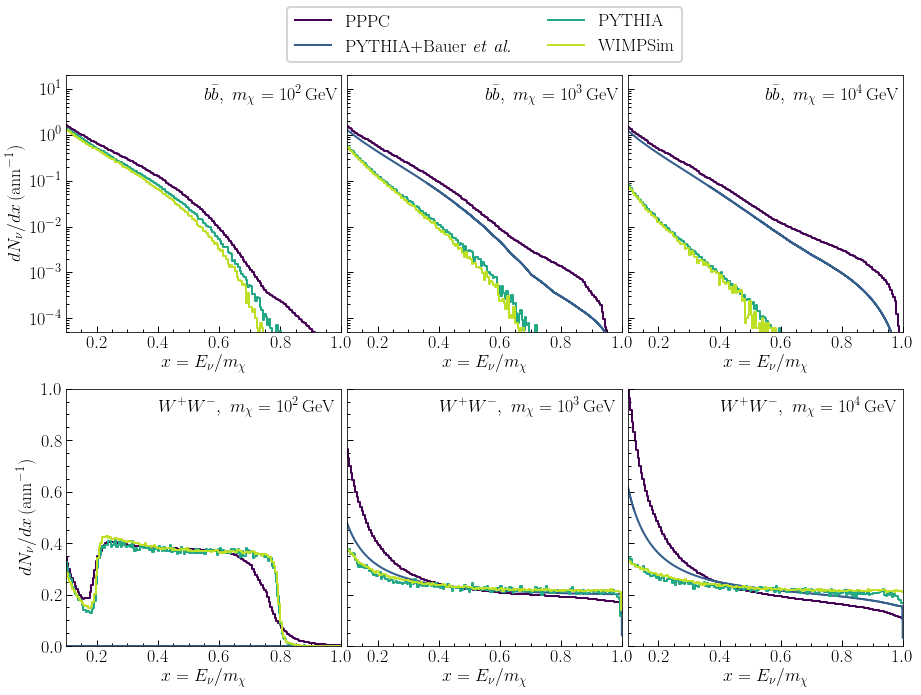

In [34]:
fig, axs = plt.subplots(2,3, figsize=(15,10.5), gridspec_kw={'hspace': 0.22, 'wspace': 0.02})
cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0,0.9,4)]
gen_labels = ['PPPC', r'PYTHIA+Bauer $\textit{et al.}$', 'PYTHIA', 'WIMPSim']


chan_labels = np.array([r'$b\bar{b},~m_{\chi}=10^{2}\,\rm{GeV}$', 
                        r'$b\bar{b},~m_{\chi}=10^{3}\,\rm{GeV}$',
                        r'$b\bar{b},~m_{\chi}=10^{4}\,\rm{GeV}$',
                        r'$W^{+}W^{-},~m_{\chi}=10^{2}\,\rm{GeV}$',  
                        r'$W^{+}W^{-},~m_{\chi}=10^{3}\,\rm{GeV}$', 
                        r'$W^{+}W^{-},~m_{\chi}=10^{4}\,\rm{GeV}$', ]).reshape(2, 3)
we = [[bb100, bb1000, bb10000],[ww100, ww1000, ww10000]]

poss = [(i,j) for i in range(2) for j in range(3)]

for i,j in poss:
    ax = axs[i,j]
    ll = chan_labels[i,j]
    plot_thing = we[i][j]
#     ax.set_ylabel(r'$dN_{\nu}/dx$', fontsize=18)
    ax.set_xlim(0.1,1)
    ax.tick_params(direction='in', which='both')
    if i==0:
        ax.set_ylim(5e-5, 20)
        ax.semilogy()
        ax.text(0.55, 5, ll, fontsize=18)
    else:
        ax.set_ylim(1e-3, 1)
        ax.text(0.4, 0.9, ll, fontsize=18)
    for (x,y),gen_label, color in zip(plot_thing, gen_labels, colors):
        if i==0:
            ax.step(x,y, label=gen_label, color=color)
        else:
            ax.step(x,y, color=color)

for ax in axs[:,1:].flatten():
    ax.yaxis.set_ticklabels([])
for ax in axs.flatten():
    ax.set_xlabel(r'$x=E_{\nu}/m_{\chi}$', fontsize=18)
for ax in axs[:,0].flatten():
    ax.set_ylabel(r'$dN_{\nu}/dx\,(\rm{ann}^{-1})$', fontsize=18)



lgd = axs[0,1].legend(fontsize=18, loc=1, frameon=True, bbox_to_anchor=(1.25,1.3),ncol=2)
plt.tight_layout()

plt.savefig('plots/gen_comp.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [13]:
def calc_max_dev(min_rat, max_rat):
    a = np.asarray(min_rat)
    a = a[np.isfinite(a)]
    b = np.asarray(max_rat)
    b = b[np.isfinite(b)]
    max_dev = max(np.max(np.abs(1-a)),np.max(np.abs(1-b)))
    return max_dev

In [14]:
ylims={'5100':(1e-6,1), '51000':(1e-6,1), '510000':(1e-6,1), '8100':(1e-2,1), '81000':(3e-4,1), '810000':(1e-6,1)}

def get_text_pos(ch, m):
    if ch==5 and m==100:
        text_pos = (0.12, 1.6e-6, 0.21, 3e-1)
    elif ch==5 and m==1000:
        text_pos = (0.12, 1.8e-6, 0.15, 3e-1)
    elif ch==5 and m==10000:
        text_pos = (0.12, 1.5e-6, 0.12, 3e-1)
    elif ch==8 and m==100:
        text_pos = (0.12, 1.25e-2, 0.12, 6.5e-1)
    elif ch==8 and m==1000:
        text_pos = (0.12, 4.3e-4, 0.12, 5e-1)
    elif ch==8 and m==10000:
        text_pos = (0.12, 1.5e-6, 0.12, 3e-1)
    else:
        print('Not valid channel/mass pairing. Try again')
        quit()
    return text_pos

In [15]:
def plot_param_uncertainty_w_ratio(ch, m, ylim=(1e-6, 1e1), save=False):
    
    xlim = (10/float(m),1)
    lw=1.5
    blw = 0.5
    cmap = cm.get_cmap('RdYlBu')
    
    
    nice_chs_strs = {5:r'b\bar{b}', 8:r'W^{+}W^{-}'}
    text_str      = r'$%s,\, m_{\chi}=%d\,\rm{GeV}$' % (nice_chs_strs[ch], m)

    text_pos      = get_text_pos(ch, m)
    
    fig = plt.figure(figsize=(13.5,7.5))
    gs  = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[4,1], hspace=0.35, wspace=0.02)
    axs = [plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1])]
    
    savedir = '/data/user/jlazar/solar_WIMP/data/param_uncertainties/'
    nominal_flux = np.load('%s/%d_%d_33.820000_48.300000_8.610000_0.000074_0.002523_222.000000.npy' % (savedir, ch, m)) / float(m)
    numu_arrs    = []
    numubar_arrs = []
    for f in sorted(glob.glob('data/param_uncertainties/%d_%d_no*' % (ch,m))):
        numu_arrs.append(np.load(f)[0]/float(m))
        numubar_arrs.append(np.load(f)[1]/float(m))
    numu_arrs    = np.array(numu_arrs)
    numubar_arrs = np.array(numubar_arrs)
    xx = np.linspace(10./float(m),1,200)
    numu_max = []
    numu_min = []
    for l in numu_arrs.T:
        numu_max.append(np.max(l))
        numu_min.append(np.min(l))
    numubar_max = []
    numubar_min = []
    for l in numubar_arrs.T:
        numubar_max.append(np.max(l))
        numubar_min.append(np.min(l))
    c = cmap(0.9)
    axs[0].plot(xx, numubar_max, color=c, lw=blw)
    axs[0].plot(xx, numubar_min, color=c, lw=blw)
    axs[0].plot(xx, nominal_flux[1], color=c, lw=lw, zorder=10, label=r'$\bar{\nu}_{\mu}$')
    axs[0].fill_between(xx, numubar_min, numubar_max, color=rgb2hex(c[:3]), alpha=0.4)
    
    axs[2].fill_between(xx, np.divide(numu_max,nominal_flux[0]),np.divide(numu_min, nominal_flux[0],), color=rgb2hex(c[:3]), alpha='0.5')
    c = cmap(0.7)
    axs[0].plot(xx, numu_max, color=c, lw=blw)
    axs[0].plot(xx, numu_min, color=c, lw=blw)
    axs[0].plot(xx, nominal_flux[0], color=c, lw=lw, zorder=10, label=r'$\nu_{\mu}$')
    axs[0].fill_between(xx, numu_min, numu_max, color=rgb2hex(c[:3]), alpha='0.2')
    
    axs[2].fill_between(xx, np.divide(numubar_max,nominal_flux[1]),np.divide(numubar_min, nominal_flux[1],), color=rgb2hex(c[:3]), alpha='0.5')
    max_dev_nuno    = calc_max_dev(np.divide(numu_max,nominal_flux[0]),np.divide(numu_min, nominal_flux[0],))
    max_dev_nubarno = calc_max_dev(np.divide(numubar_max,nominal_flux[1]),np.divide(numubar_min, nominal_flux[1],))
    
    savedir = '/data/user/jlazar/solar_WIMP/data/param_uncertainties/'
    nominal_flux = np.load('%s/%d_%d_33.820000_48.600000_8.650000_0.000074_-0.002509_285.000000.npy' % (savedir, ch, m)) / float(m)
    numu_arrs    = []
    numubar_arrs = []
    for f in sorted(glob.glob('data/param_uncertainties/%d_%d_io*' % (ch,m))):
        numu_arrs.append(np.load(f)[0]/float(m))
        numubar_arrs.append(np.load(f)[1]/float(m))
    numu_arrs    = np.array(numu_arrs)
    numubar_arrs = np.array(numubar_arrs)
    xx = np.linspace(10./float(m),1,200)
    numu_max = []
    numu_min = []
    for l in numu_arrs.T:
        numu_max.append(np.max(l))
        numu_min.append(np.min(l))
    numubar_max = []
    numubar_min = []
    for l in numubar_arrs.T:
        numubar_max.append(np.max(l))
        numubar_min.append(np.min(l))
    c = cmap(0.1)
    axs[1].plot(xx, numubar_max, color=c, lw=blw)
    axs[1].plot(xx, numubar_min, color=c, lw=blw)
    axs[1].plot(xx, nominal_flux[1], color=c, lw=lw, zorder=10, label=r'$\bar{\nu}_{\mu}$')
    axs[1].fill_between(xx, numubar_min, numubar_max, color=rgb2hex(c[:3]), alpha='0.4')
    
    axs[3].fill_between(xx, np.divide(numu_max,nominal_flux[0]),np.divide(numu_min, nominal_flux[0],), color=rgb2hex(c[:3]), alpha='0.5')

    c = cmap(0.3)
    axs[1].plot(xx, numu_max, color=c, lw=lw)
    axs[1].plot(xx, numu_min, color=c, lw=blw)
    axs[1].plot(xx, nominal_flux[0], color=c, lw=lw, zorder=10, label=r'$\nu_{\mu}$')
    axs[1].fill_between(xx, numu_min, numu_max, color=rgb2hex(c[:3]), alpha='0.2')
    
    axs[3].fill_between(xx, np.divide(numubar_max,nominal_flux[1]),np.divide(numubar_min, nominal_flux[1],), color=rgb2hex(c[:3]), alpha='0.5')
    max_dev_nuio    = calc_max_dev(np.divide(numu_max,nominal_flux[0]),np.divide(numu_min, nominal_flux[0],))
    max_dev_nubario = calc_max_dev(np.divide(numubar_max,nominal_flux[1]),np.divide(numubar_min, nominal_flux[1],))

    
    axs[0].text(text_pos[0], text_pos[1], r'\textbf{Normal ordering}', fontsize=18)
    axs[1].text(text_pos[0], text_pos[1], r'\textbf{Inverted ordering}', fontsize=18)
    axs[0].text(text_pos[2], text_pos[3], text_str, fontsize=18)
    axs[1].text(text_pos[2], text_pos[3], text_str, fontsize=18)
    
    max_dev = max(max_dev_nuno,max_dev_nubarno,max_dev_nuio,max_dev_nubario)
    if max_dev>2:
        axs[2].set_ylim(0,2)
        axs[3].set_ylim(0,2)
    else:
        axs[2].set_ylim(1-max_dev,1+max_dev)
        axs[3].set_ylim(1-max_dev,1+max_dev)
        
    
    for ax in axs:
        ax.set_xlabel(r'$x=E_{\nu}/m_{\chi}$', fontsize=18)
        ax.tick_params(direction='in', which='both')
        ax.set_xlim(0.1,1)


    axs[0].semilogy()
    axs[0].set_ylim(ylim)
    axs[0].legend(fontsize=18)
    axs[0].set_ylabel(r'$dN/dx\,\left[\rm{ann}^{-1}\right]$', fontsize=18)
    axs[1].semilogy()
    axs[1].set_ylim(ylim)
    axs[1].legend(fontsize=18)
    axs[2].set_ylabel(r'Ratio', fontsize=18)
    axs[1].yaxis.set_ticklabels([])
    axs[3].yaxis.set_ticklabels([])
    if save:
        plt.savefig('plots/ch%d_m%d_neutrino_param_uncertainty_w_ratio.pdf' % (ch, m), bbox_inches='tight')
    plt.show()

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in

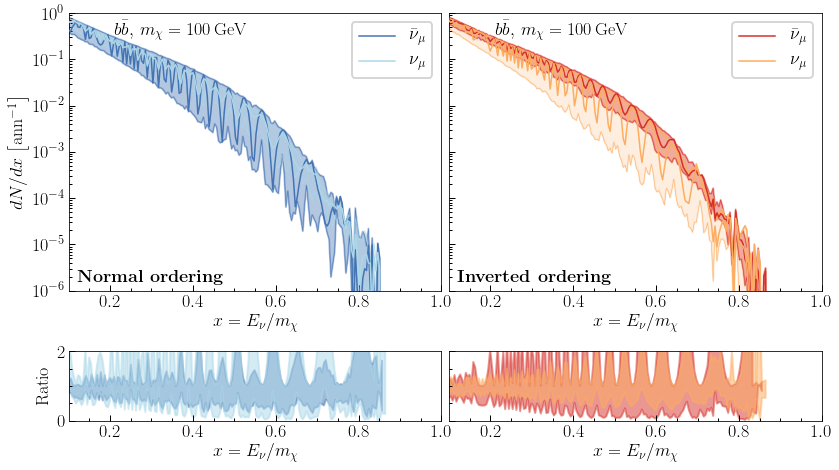

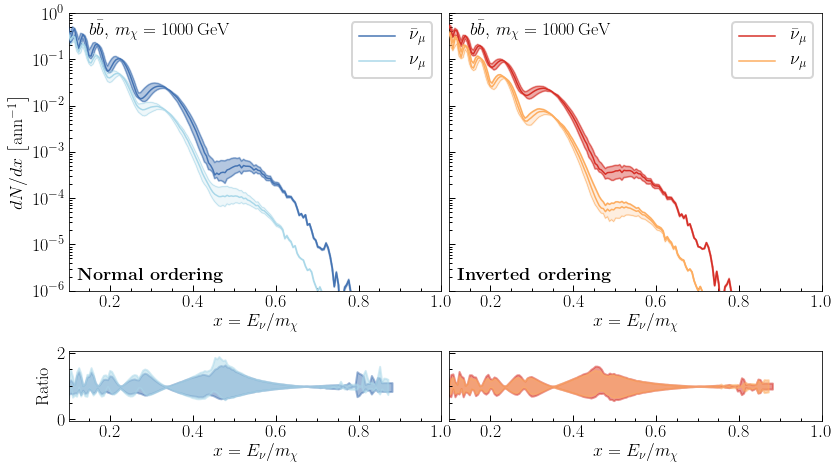

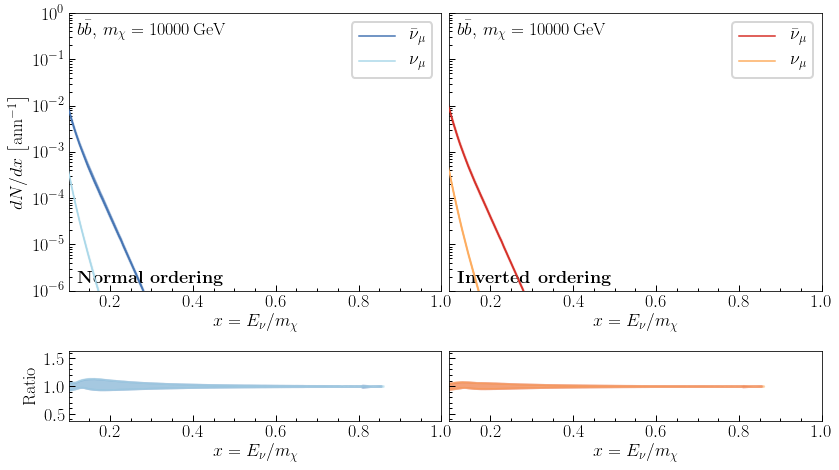

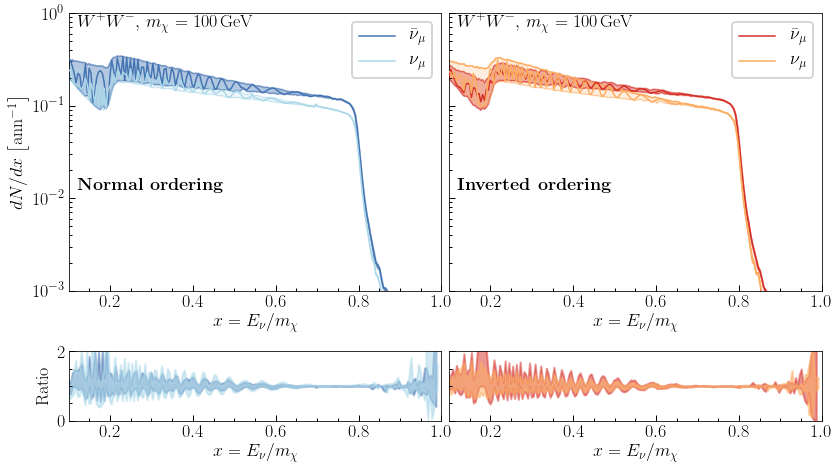

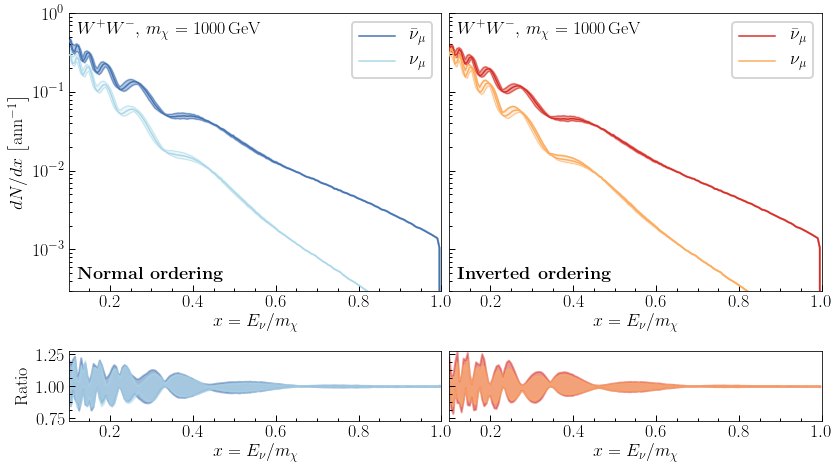

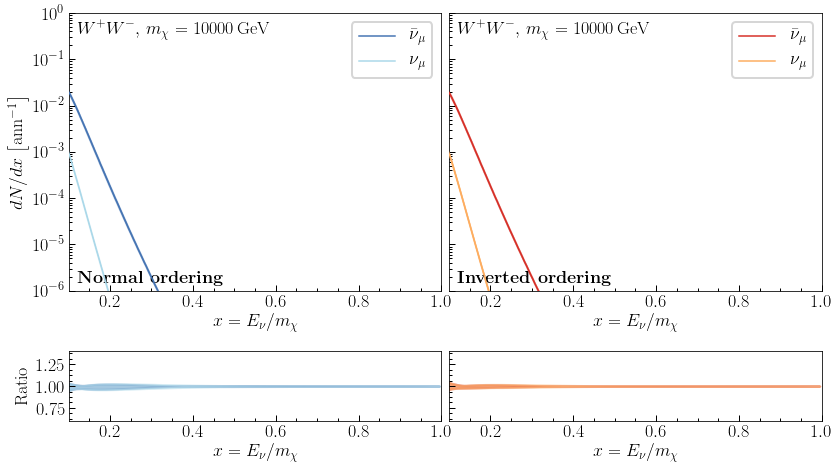

In [77]:
for ch in [5,8]:
    for m in [100,1000,10000]:
        plot_param_uncertainty_w_ratio(ch, m, ylim=ylims[str(ch)+str(m)],save=True)

In [17]:
def plot_param_uncertainty(ch, m, ylim=(1e-6, 1e1), save=False):
    
    lw=1
    cmap = cm.get_cmap('RdYlBu')
    
    fig, axs = plt.subplots(1,2, figsize=(12.5,6.25))
    
    savedir = '/data/user/jlazar/solar_WIMP/data/param_uncertainties/'
    nominal_flux = np.load('%s/%d_%d_33.820000_48.300000_8.610000_0.000074_0.002523_222.000000.npy' % (savedir, ch, m)) / float(m)
    numu_arrs    = []
    numubar_arrs = []
    for f in sorted(glob.glob('data/param_uncertainties/%d_%d_no*' % (ch,m))):
        numu_arrs.append(np.load(f)[0]/float(m))
        numubar_arrs.append(np.load(f)[1]/float(m))
    numu_arrs    = np.array(numu_arrs)
    numubar_arrs = np.array(numubar_arrs)
    xx = np.linspace(10./float(m),1,200)
    numu_max = []
    numu_min = []
    for l in numu_arrs.T:
        numu_max.append(np.max(l))
        numu_min.append(np.min(l))
    numubar_max = []
    numubar_min = []
    for l in numubar_arrs.T:
        numubar_max.append(np.max(l))
        numubar_min.append(np.min(l))
    c = cmap(0.9)
    axs[0].plot(xx, numubar_max, color=c, label=r'$\bar{\nu}_{\mu}\,\left(\rm{NO}\right)$', lw=lw)
    axs[0].plot(xx, numubar_min, color=c, lw=lw)
    axs[0].plot(xx, nominal_flux[1], color=c, lw=3, zorder=10)
    axs[0].fill_between(xx, numubar_min, numubar_max, color=rgb2hex(c[:3]), alpha='0.4')
    c = cmap(0.7)
    axs[0].plot(xx, numu_max, color=c, label=r'$\nu_{\mu}\,\left(\rm{NO}\right)$', lw=lw)
    axs[0].plot(xx, numu_min, color=c, lw=lw)
    axs[0].plot(xx, nominal_flux[0], color=c, lw=3, zorder=10)
    axs[0].fill_between(xx, numu_min, numu_max, color=rgb2hex(c[:3]), alpha='0.2')
    
    

    
    savedir = '/data/user/jlazar/solar_WIMP/data/param_uncertainties/'
    
    numu_arrs    = []
    numubar_arrs = []
    for f in sorted(glob.glob('data/param_uncertainties/%d_%d_io*' % (ch,m))):
        numu_arrs.append(np.load(f)[0]/float(m))
        numubar_arrs.append(np.load(f)[1]/float(m))
    numu_arrs    = np.array(numu_arrs)
    numubar_arrs = np.array(numubar_arrs)
    xx = np.linspace(10./float(m),1,200)
    numu_max = []
    numu_min = []
    for l in numu_arrs.T:
        numu_max.append(np.max(l))
        numu_min.append(np.min(l))
    numubar_max = []
    numubar_min = []
    for l in numubar_arrs.T:
        numubar_max.append(np.max(l))
        numubar_min.append(np.min(l))
    c = cmap(0.1)
    axs[1].plot(xx, numubar_max, color=c, label=r'$\bar{\nu}_{\mu}\,\left(\rm{IO}\right)$', lw=lw)
    axs[1].plot(xx, numubar_min, color=c, lw=lw)
    axs[1].plot(xx, nominal_flux[1], color=c, lw=3, zorder=10)
    axs[1].fill_between(xx, numubar_min, numubar_max, color=rgb2hex(c[:3]), alpha='0.4')
    c = cmap(0.3)
    axs[1].plot(xx, numu_max, color=c, label=r'$\nu_{\mu}\,\left(\rm{IO}\right)$', lw=lw)
    axs[1].plot(xx, numu_min, color=c, lw=lw)
    axs[1].plot(xx, nominal_flux[0], color=c, lw=3, zorder=10)
    axs[1].fill_between(xx, numu_min, numu_max, color=rgb2hex(c[:3]), alpha='0.2')
    
    
    axs[0].semilogy()
    axs[0].set_ylim(ylim)
    axs[0].set_xlim(0.1,1)
    axs[0].legend(fontsize=18)
    axs[0].set_xlabel(r'$x=E_{\nu}/m_{\chi}$')
    axs[0].set_ylabel(r'$dN/dx\,\left(\rm{GeV}\right)$')
    axs[1].semilogy()
    axs[1].set_ylim(ylim)
    axs[1].set_xlim(0.1,1)
    axs[1].legend(fontsize=18)
    axs[1].set_xlabel(r'$x=E_{\nu}/m_{\chi}$')
#     axs[1].ylabel(r'$dN/dx\,\left(\rm{GeV}\right)$')
    if save:
        plt.savefig('plots/ch%d_m%d_neutrino_param_uncertainty.pdf' % (ch, m))
    plt.show()

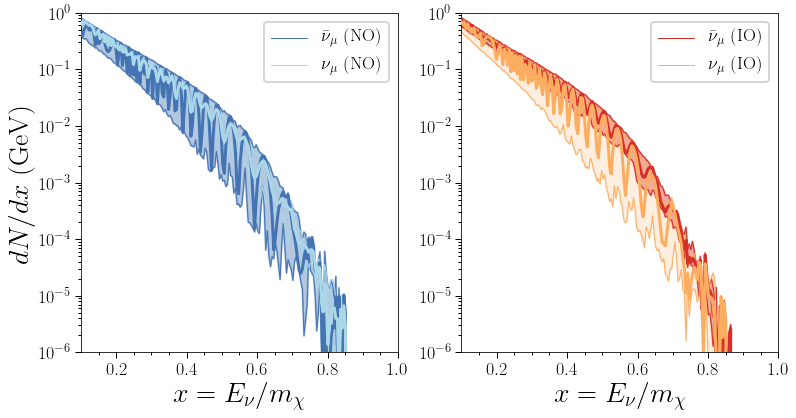

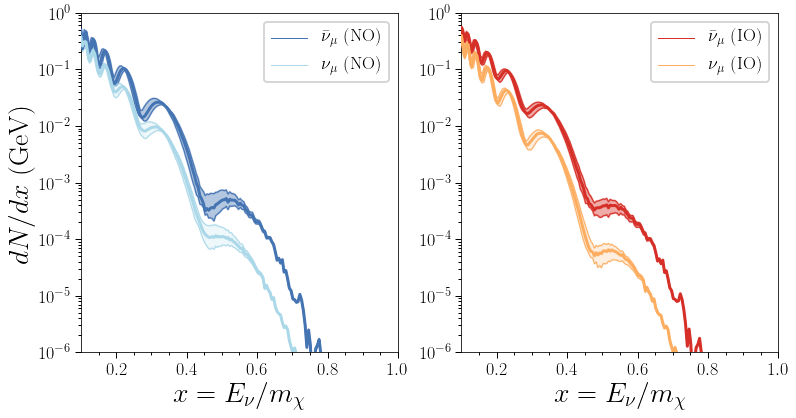

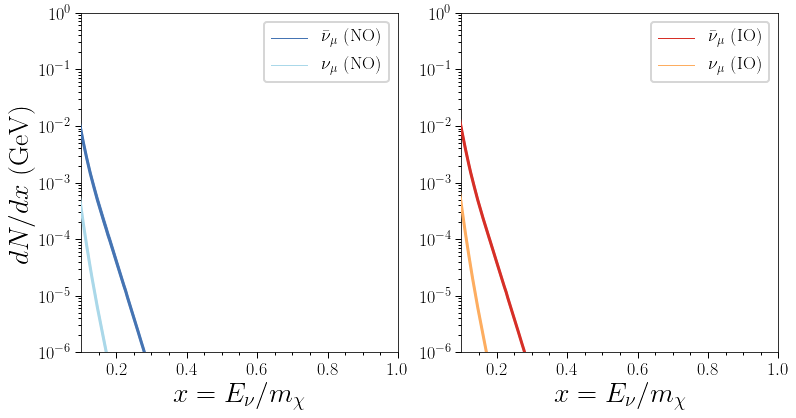

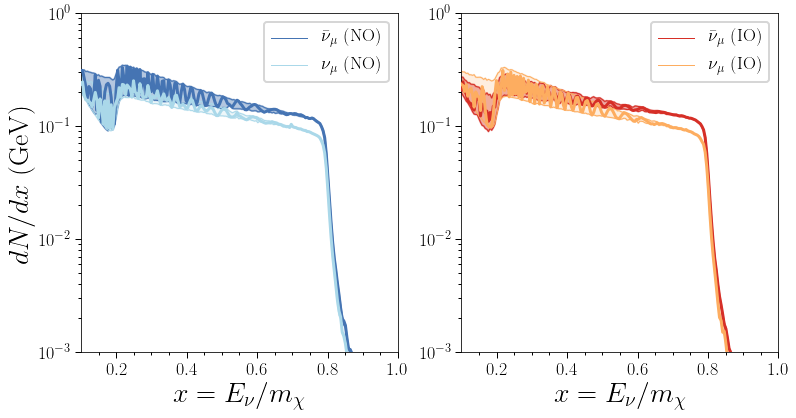

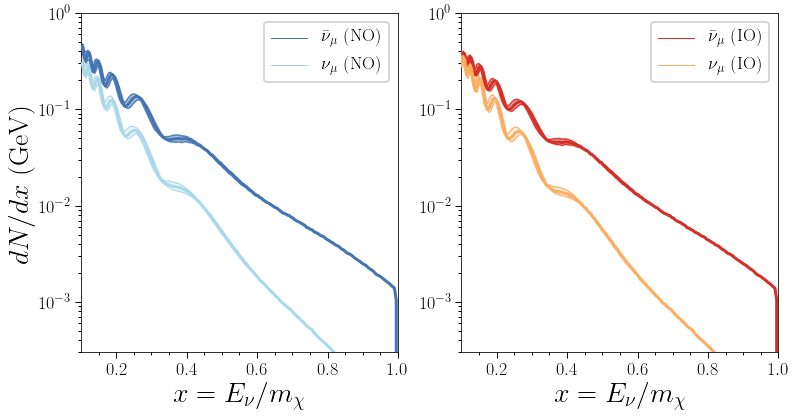

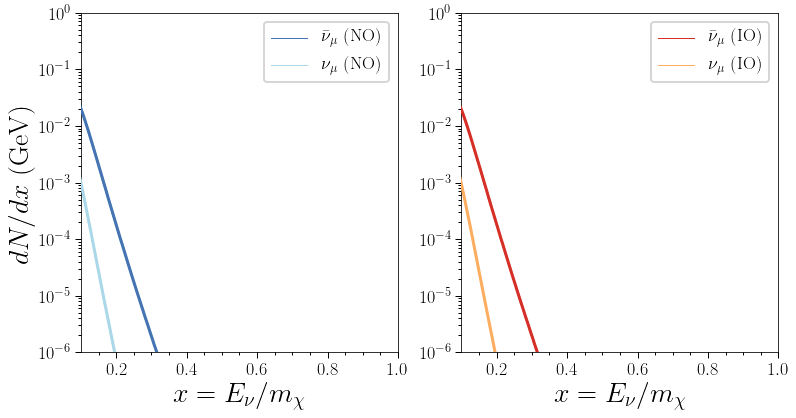

In [18]:
ylims={'5100':(1e-6,1), '51000':(1e-6,1), '510000':(1e-6,1), '8100':(1e-3,1), '81000':(3e-4,1), '810000':(1e-6,1)}

for ch in [5,8]:
    for m in [100,1000,10000]:
        plot_param_uncertainty(ch, m, ylim=ylims[str(ch)+str(m)], save=True)

In [78]:
def plot_xs_uncertainty(ch, m, save=False, ylim=(1e-6, 1e1)):
    
    lw=1
    cmap = cm.get_cmap('RdYlBu')
    xx = np.linspace(10./float(m),1,200)    
    lw=1.5
    blw = 0.5
    
    nice_chs_strs = {5:r'b\bar{b}', 8:r'W^{+}W^{-}'}
    text_str      = r'$%s,\, m_{\chi}=%d\,\rm{GeV}$' % (nice_chs_strs[ch], m)
    text_pos      = get_text_pos(ch, m)
    
    cnuno = cmap(0.7)
    cnubarno = cmap(0.9)
    cnuio = cmap(0.3)
    cnubario = cmap(0.1)
    
    fig = plt.figure(figsize=(13.5,7.5))
    gs  = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[4,1], hspace=0.29, wspace=0.02)
    axs = [plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1])]
    
    savedir = '/data/user/jlazar/solar_WIMP/data/xs_uncertainties/'
    
    # Top left panel
    upper = np.load('%s/ch%d_m%d_no_1.05.npy' % (savedir, ch, m))/float(m)
    lower = np.load('%s/ch%d_m%d_no_0.95.npy' % (savedir, ch, m))/float(m)
    nominal = np.load('%s/ch%d_m%d_no_1..npy' % (savedir, ch, m))/float(m)
    
    axs[0].plot(xx, upper[1], lw=blw, color=cnubarno)
    axs[0].plot(xx, lower[1], lw=blw, color=cnubarno)
    axs[0].plot(xx, nominal[1], lw=lw, color=cnubarno, label=r'$\bar{\nu}_{\mu}$')
    axs[0].plot(xx, upper[0], lw=blw, color=cnuno)
    axs[0].plot(xx, lower[0], lw=blw, color=cnuno)
    axs[0].plot(xx, nominal[0], lw=lw, color=cnuno, label=r'$\nu_{\mu}$')
    
    axs[0].fill_between(xx, lower[0], lower[0], color=cnuno, alpha=0.5)
    axs[0].fill_between(xx, lower[1], lower[1], color=cnubarno, alpha=0.5)
    
    axs[0].text(text_pos[0], text_pos[1], r'\textbf{Normal ordering}', fontsize=18)
    axs[0].text(text_pos[2], text_pos[3], text_str, fontsize=18)
    
    axs[0].set_ylabel(r'$dN/dx\,\left[\rm{ann}^{-1}\right]$', fontsize=18)
    axs[0].legend(fontsize=18)
    axs[0].semilogy()
    axs[0].set_ylim(ylim)
    
    # Bottom left pannel
    axs[2].fill_between(xx, np.divide(upper[0], nominal[0]), np.divide(lower[0], nominal[0]),color=rgb2hex(cnuno[:3]), alpha=0.5)
    axs[2].fill_between(xx, np.divide(upper[1], nominal[1]), np.divide(lower[1], nominal[1]),color=rgb2hex(cnubarno[:3]), alpha=0.5)
    axs[2].set_ylabel(r'Ratio', fontsize=18)
    axs[2].set_ylim(0,2)
    
    # Top right panel
    upper = np.load('%s/ch%d_m%d_io_1.05.npy' % (savedir, ch, m))/float(m)
    lower = np.load('%s/ch%d_m%d_io_0.95.npy' % (savedir, ch, m))/float(m)
    nominal = np.load('%s/ch%d_m%d_io_1..npy' % (savedir, ch, m))/float(m)
    
    axs[1].plot(xx, upper[1], lw=blw, color=cnubario)
    axs[1].plot(xx, lower[1], lw=blw, color=cnubario)
    axs[1].plot(xx, nominal[1], lw=lw, color=cnubario, label=r'$\bar{\nu}_{\mu}$')
    axs[1].plot(xx, upper[0], lw=blw, color=cnuio)
    axs[1].plot(xx, lower[0], lw=blw, color=cnuio)
    axs[1].plot(xx, nominal[0], lw=lw, color=cnuio, label=r'$\nu_{\mu}$')
    
    axs[1].fill_between(xx, lower[0], lower[0], color=rgb2hex(cnuio[:3]), alpha=0.5)
    axs[1].fill_between(xx, lower[1], lower[1], color=rgb2hex(cnubario[:3]), alpha=0.5)
    
    axs[1].text(text_pos[0], text_pos[1], r'\textbf{Inverted ordering}', fontsize=18)
    axs[1].text(text_pos[2], text_pos[3], text_str, fontsize=18)

    
    axs[1].legend(fontsize=18)
    axs[1].semilogy()
    axs[1].set_ylim(ylim)
    axs[1].yaxis.set_ticklabels([])
    
    # Bottom right panel
    axs[3].fill_between(xx, np.divide(upper[0], nominal[0]), np.divide(lower[0], nominal[0]),color=rgb2hex(cnuio[:3]), alpha=0.5)
    axs[3].fill_between(xx, np.divide(upper[1], nominal[1]), np.divide(lower[1], nominal[1]),color=rgb2hex(cnubario[:3]), alpha=0.5)
    axs[3].set_ylim(0,2)
    axs[3].yaxis.set_ticklabels([])
    
    for ax in axs:
        ax.set_xlabel(r'$x=E_{\nu}/m_{\chi}$', fontsize=18)
        ax.tick_params(direction='in', which='both')
        ax.set_xlim(0.1,1)
    
    if save:
        plt.savefig('plots/ch%d_m%d_xs_uncertainty.pdf' % (ch,m), bbox_inches='tight')
    
    plt.show()

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in divide


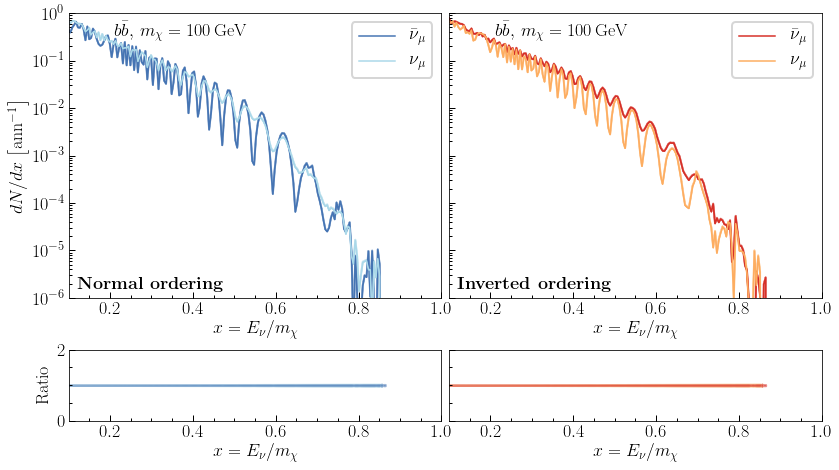

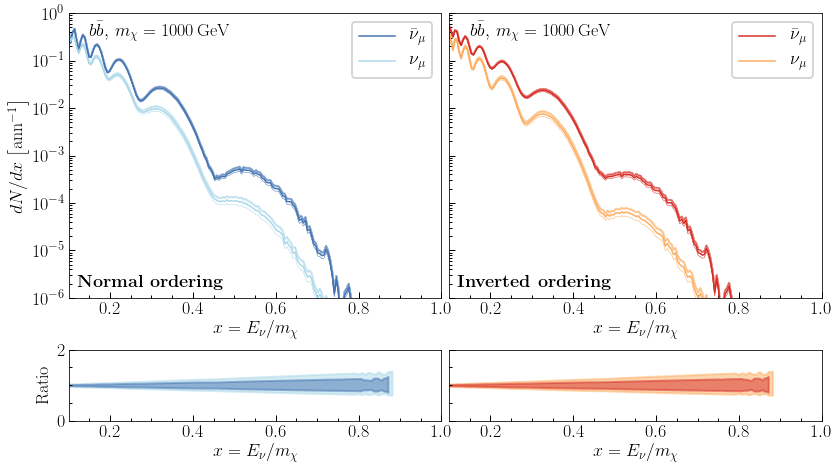

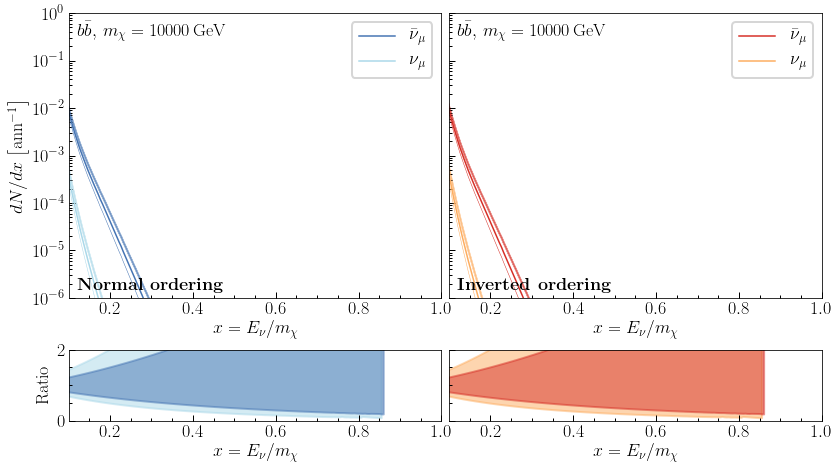

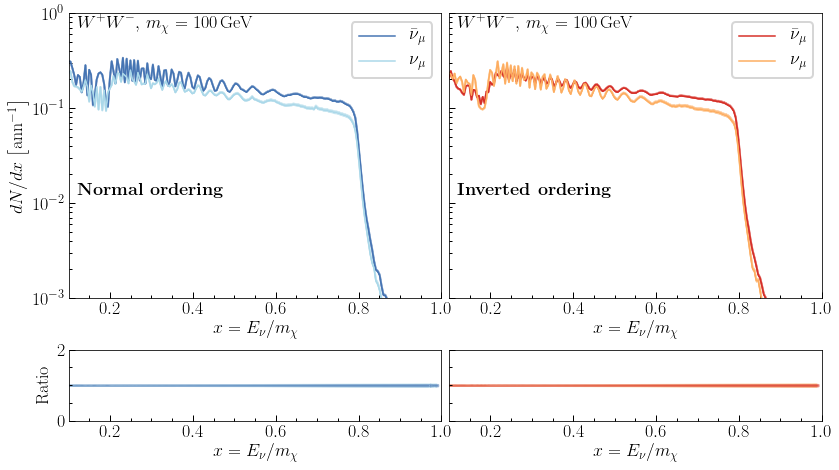

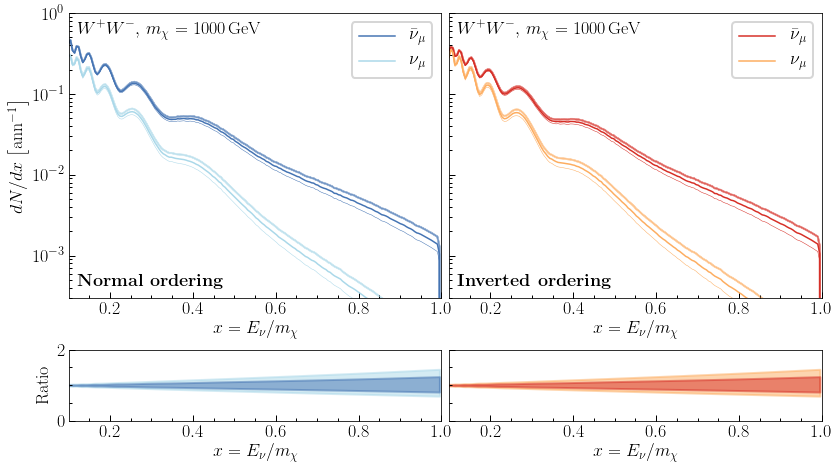

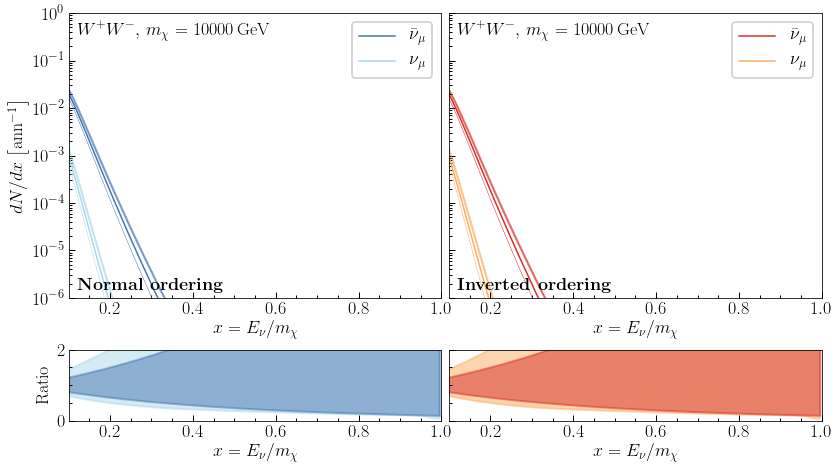

In [79]:
for ch in [5,8]:
    for m in [100,1000,10000]:
        plot_xs_uncertainty(ch, m, ylim=ylims[str(ch)+str(m)],save=True)

In [21]:
ch       = 5
m        = 1000
ordering = 'no'

nom       = np.load('data/param_uncertainties/%d_%d_33.820000_48.300000_8.610000_0.000074_0.002523_222.000000.npy' % (ch,m))
nom_nu    = nom[0]
nom_nubar = nom[1]

fluxes    = np.zeros((len(glob.glob('data/param_uncertainties/%d_%d_%s*' % (ch, m, ordering))), nom.shape[0],nom.shape[1],))
for i, fluxf in enumerate(sorted(glob.glob('data/param_uncertainties/%d_%d_%s*' % (ch, m, ordering)))):
    flux = np.load(fluxf)/float(m)
    fluxes[i,0,:] = flux[0]
    fluxes[i,1,:] = flux[1]
                     

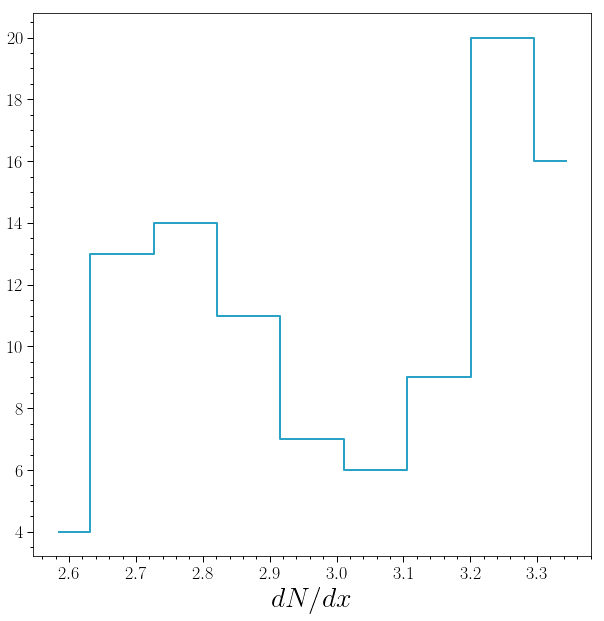

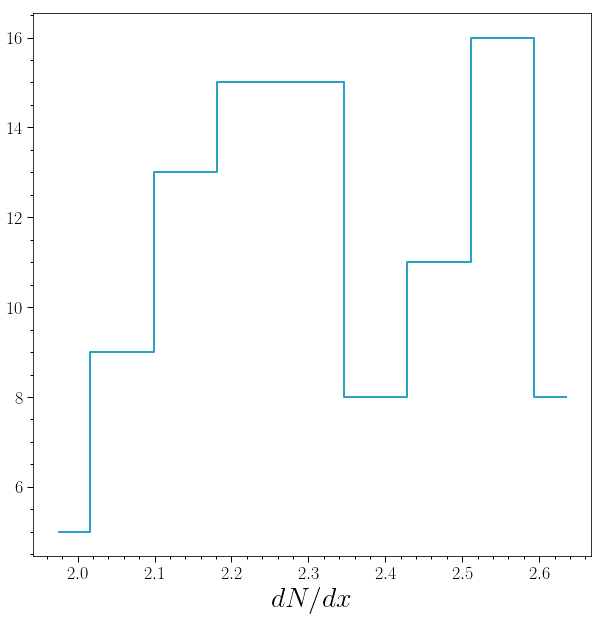

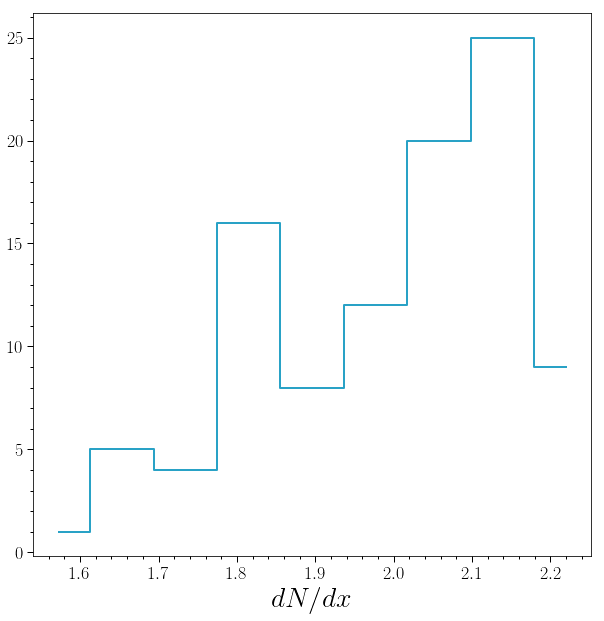

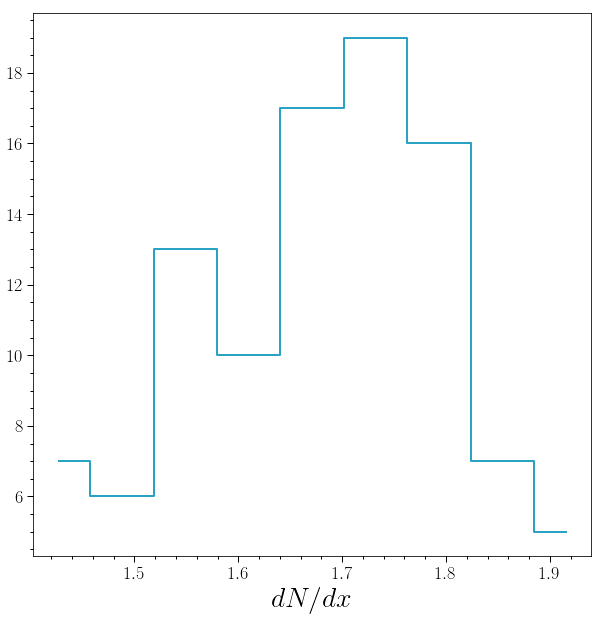

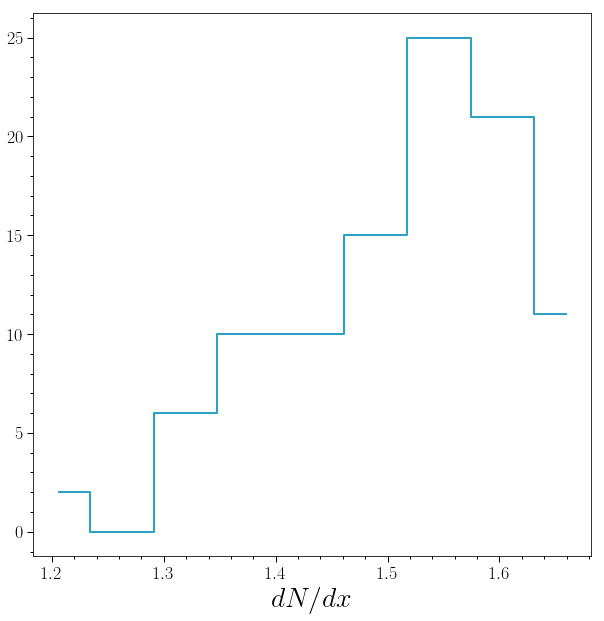

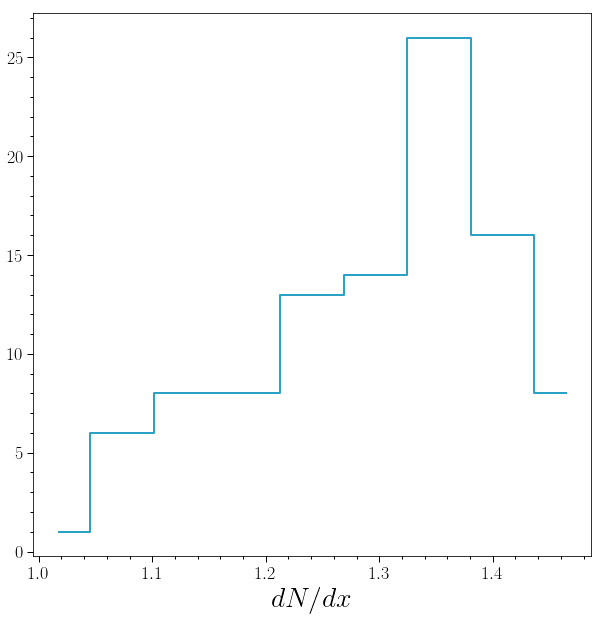

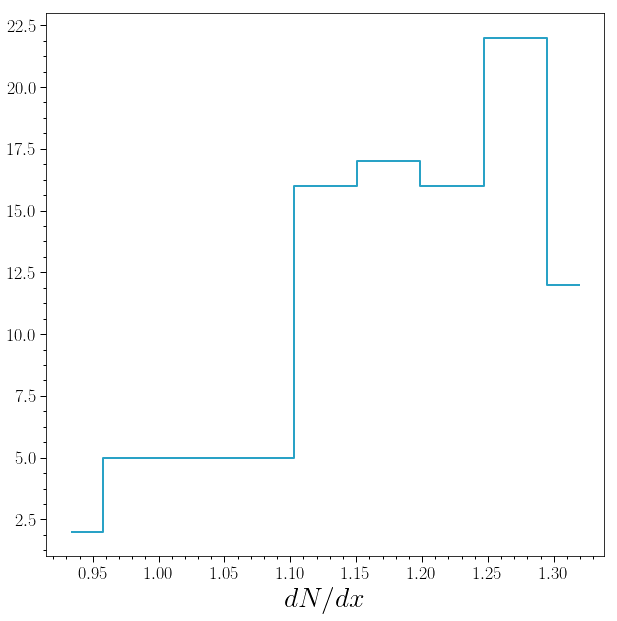

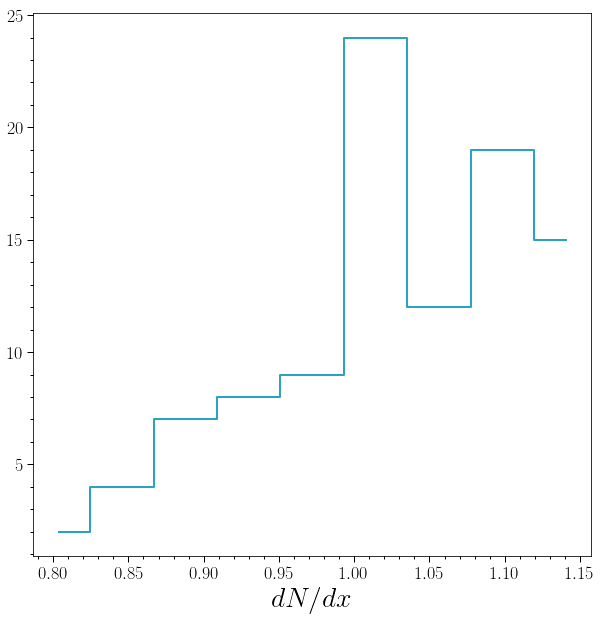

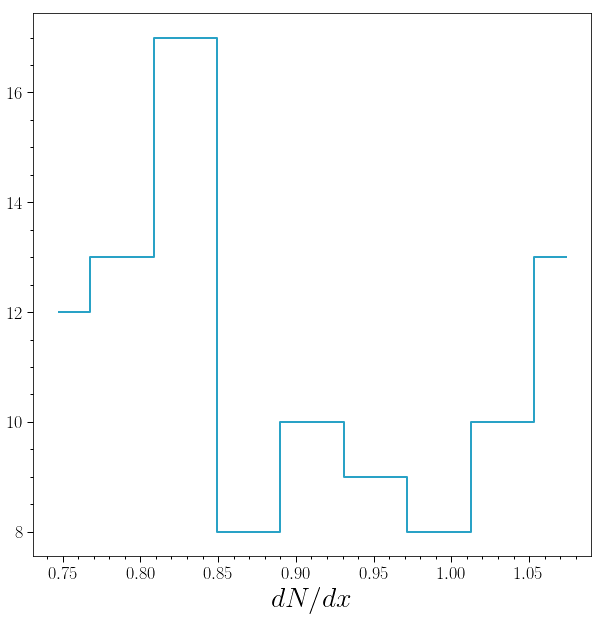

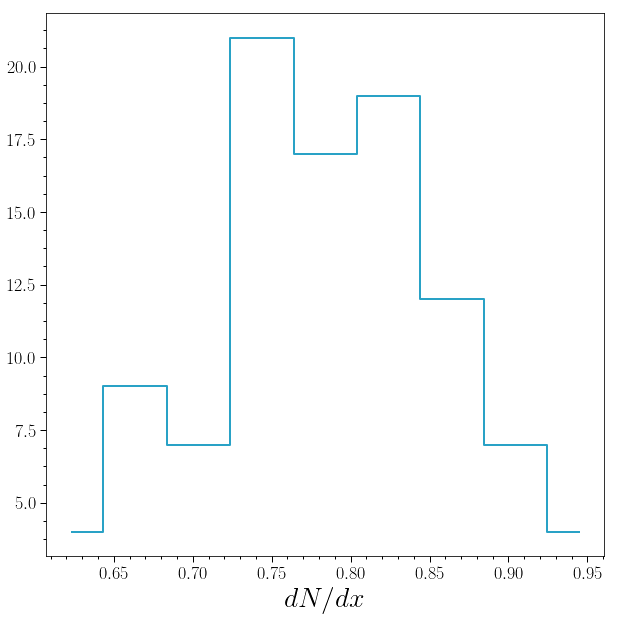

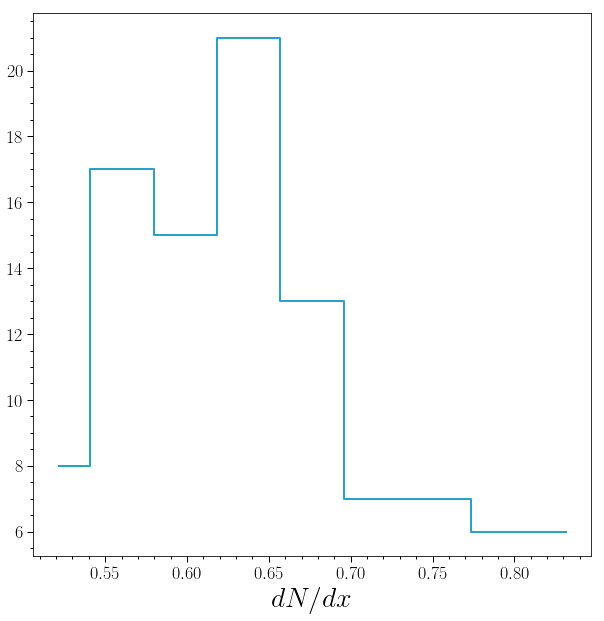

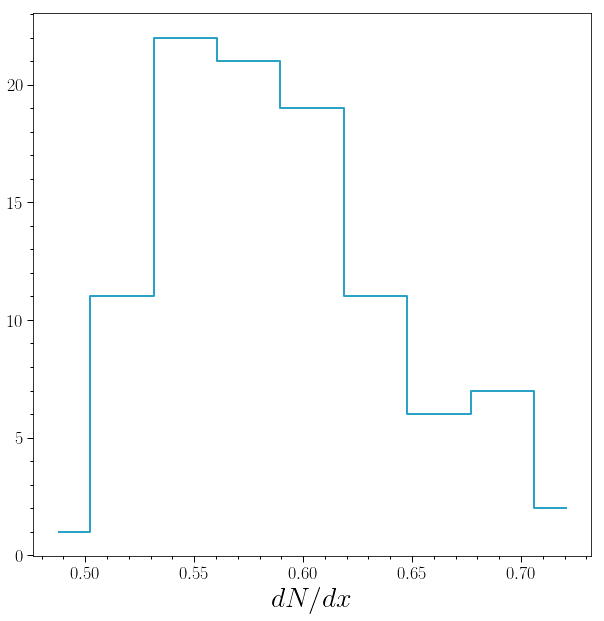

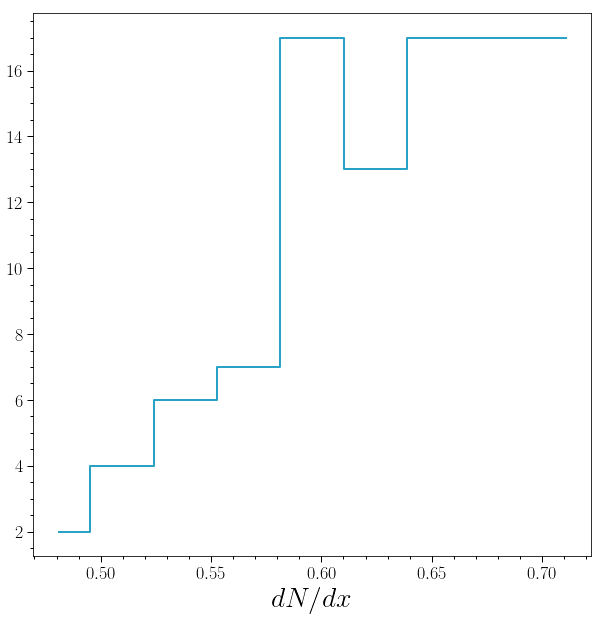

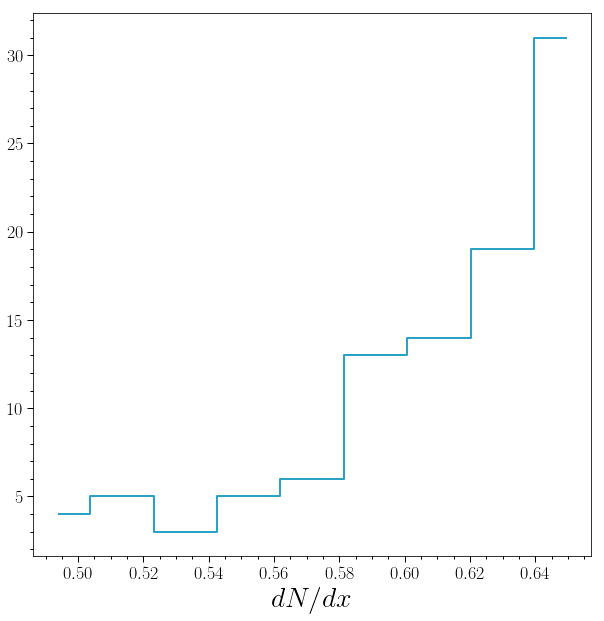

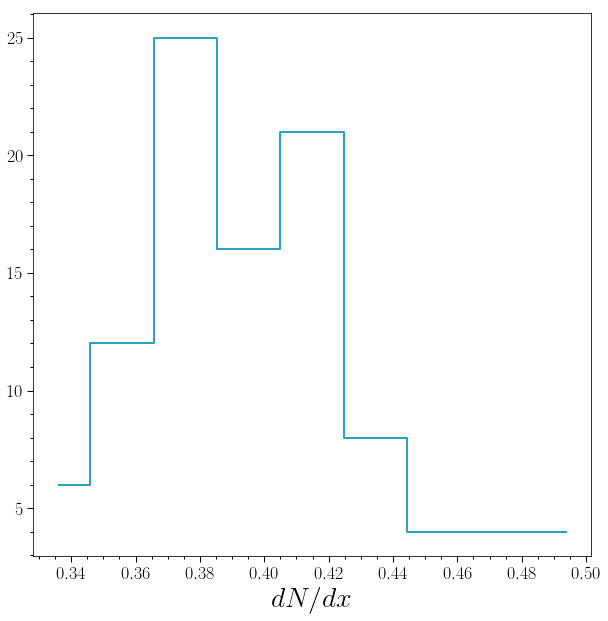

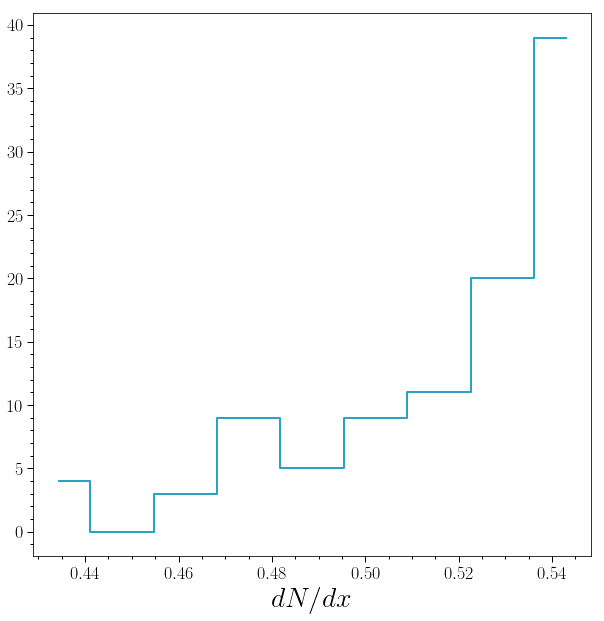

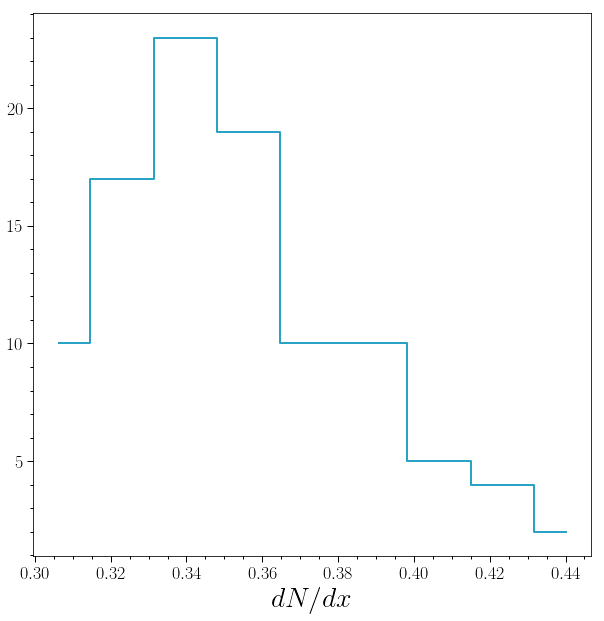

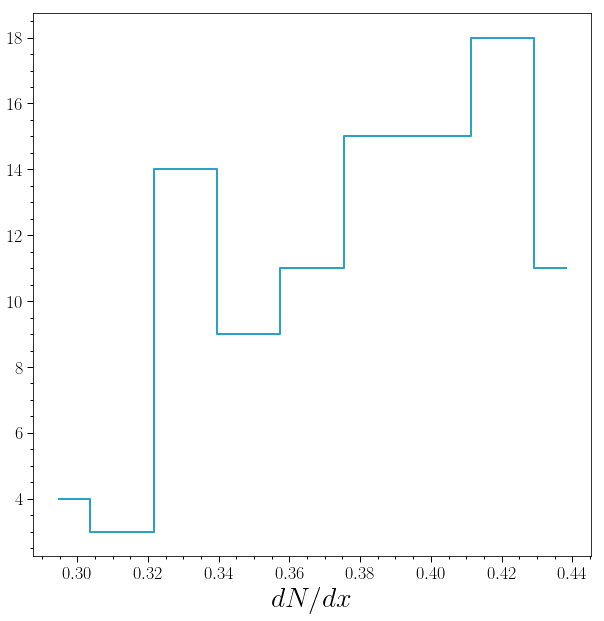

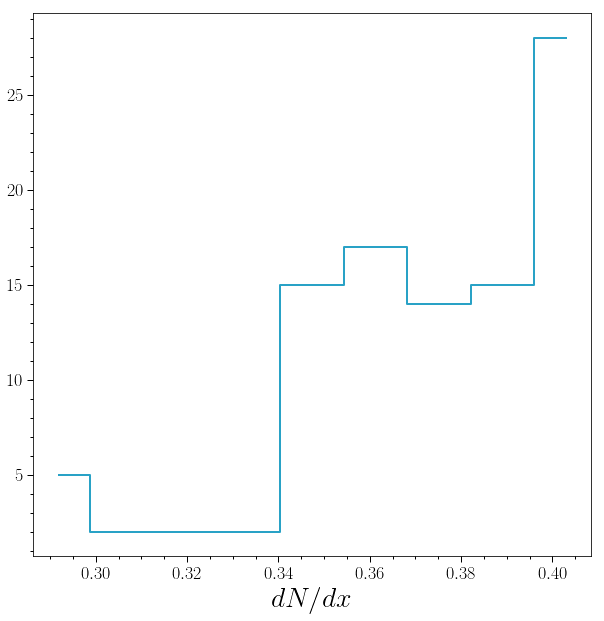

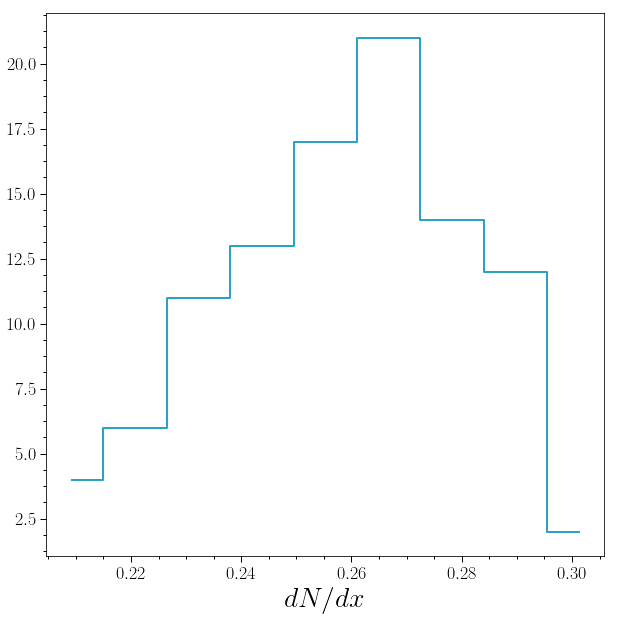

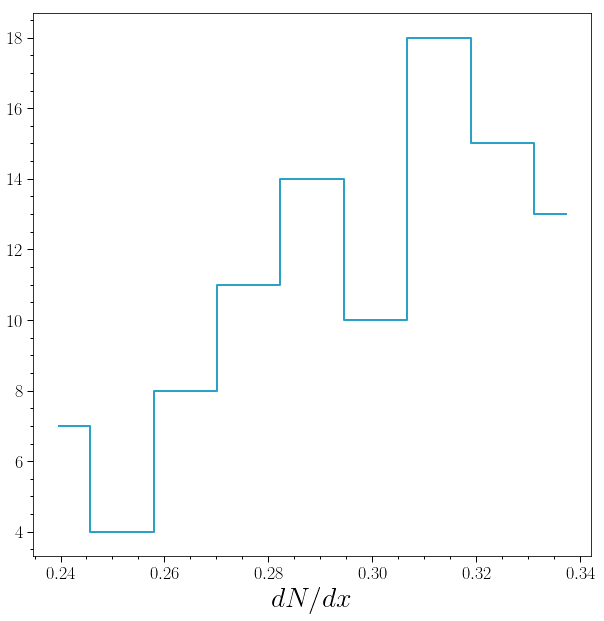

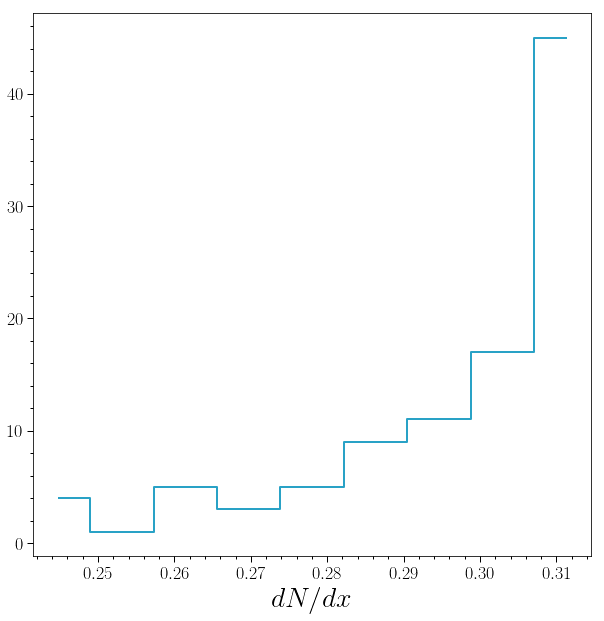

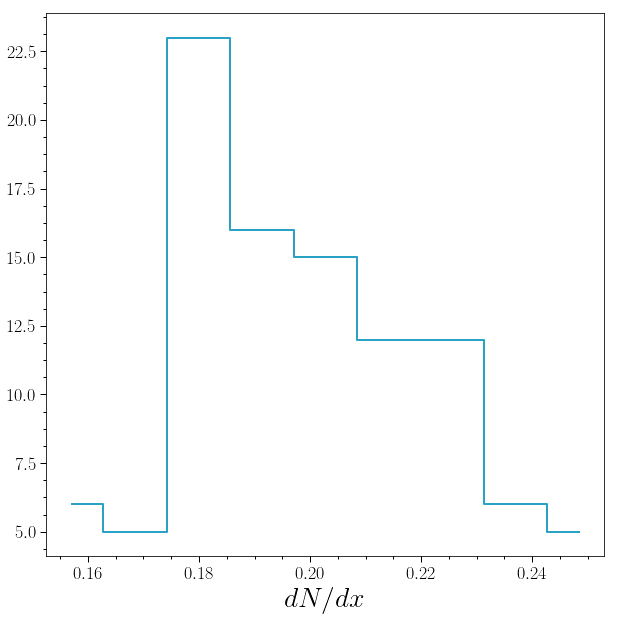

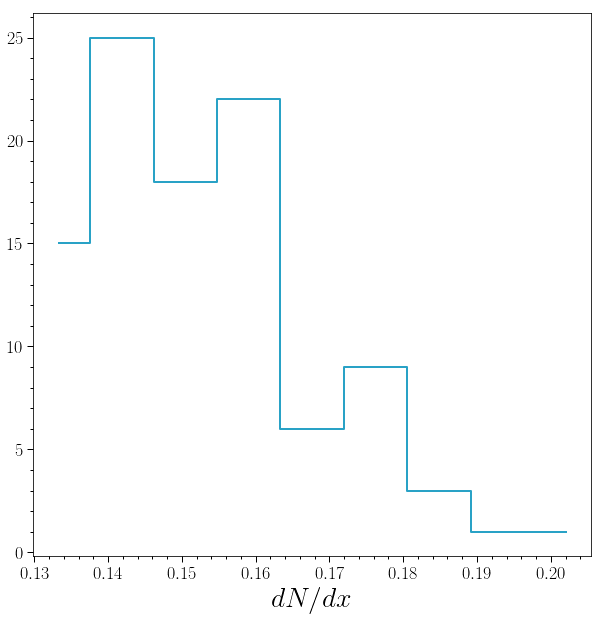

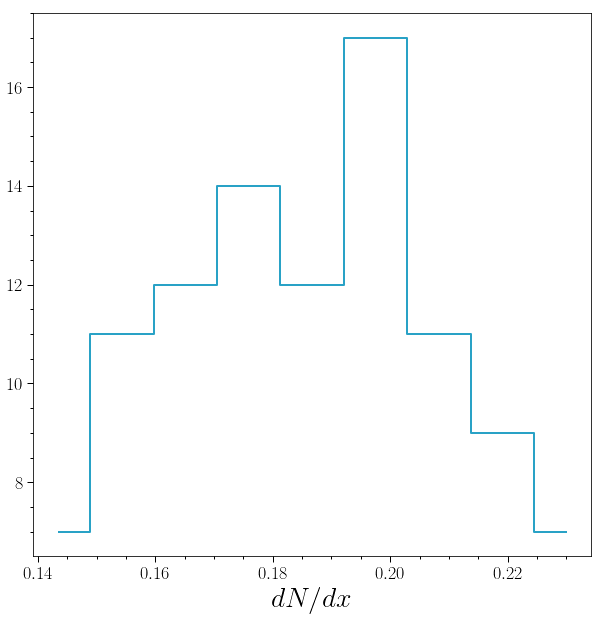

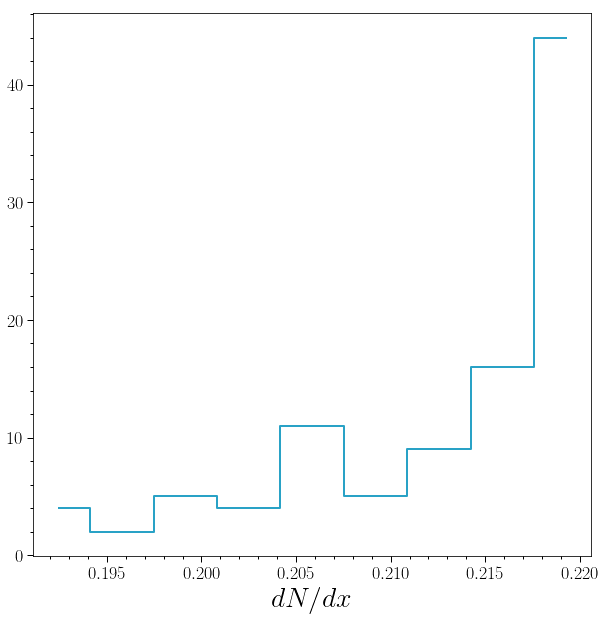

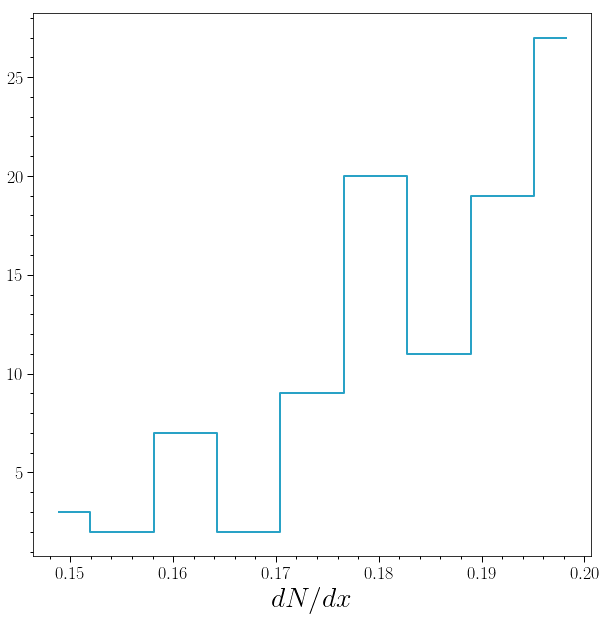

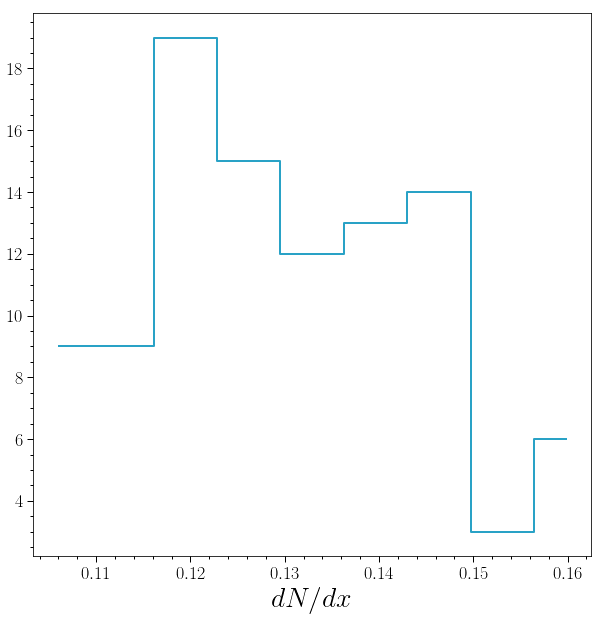

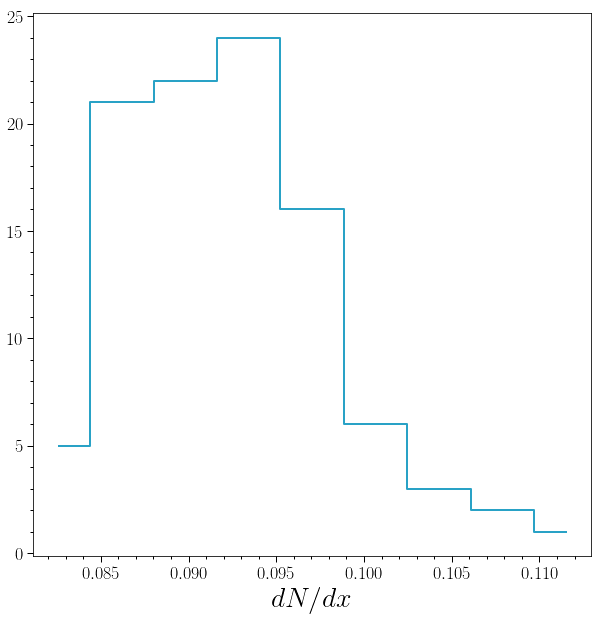

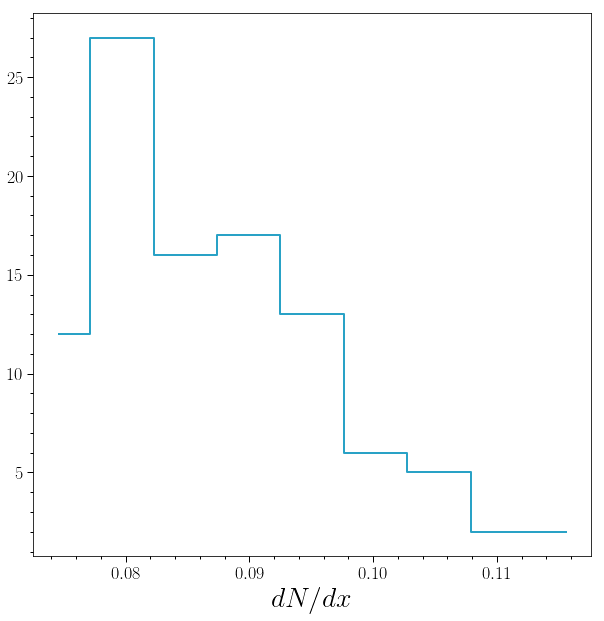

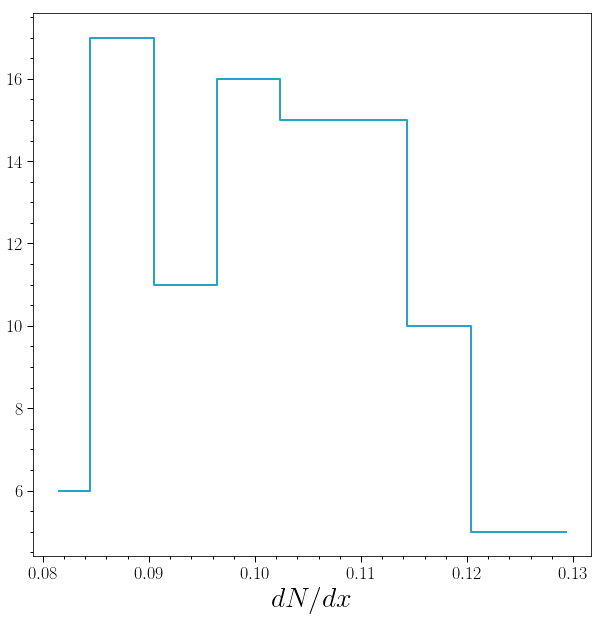

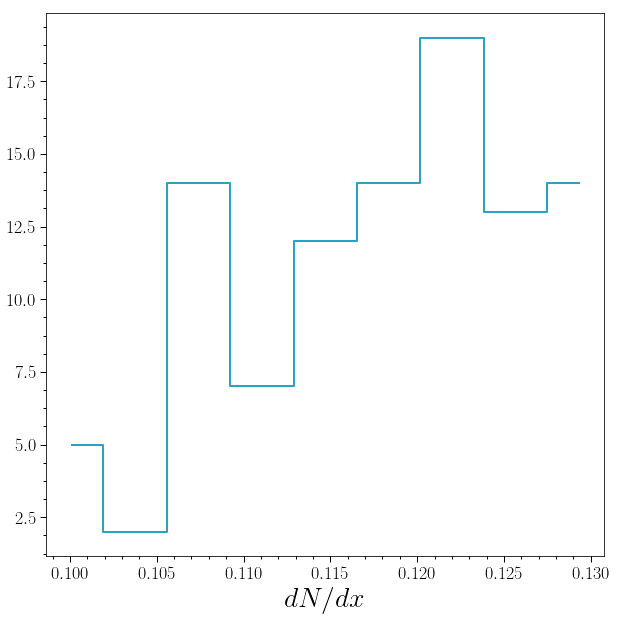

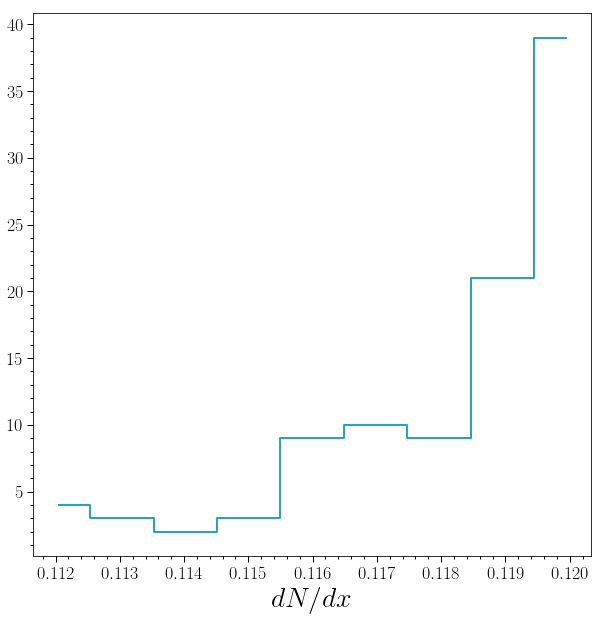

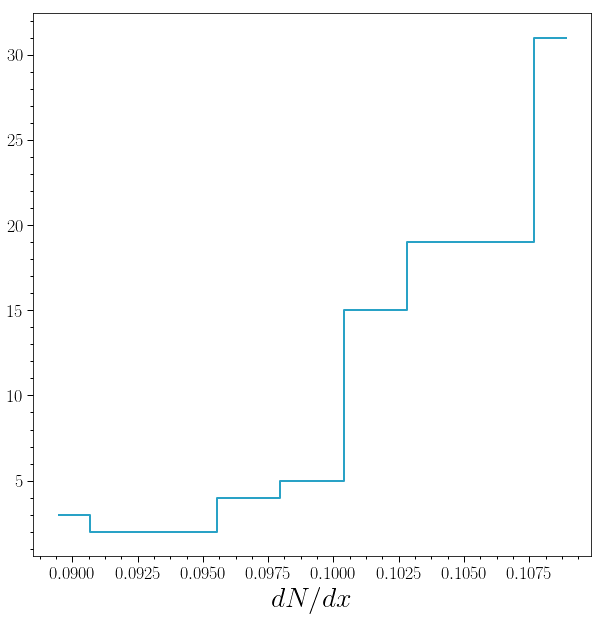

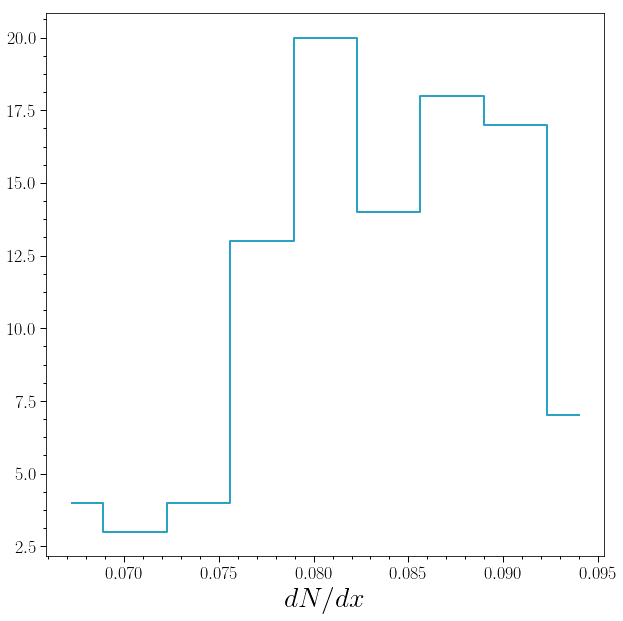

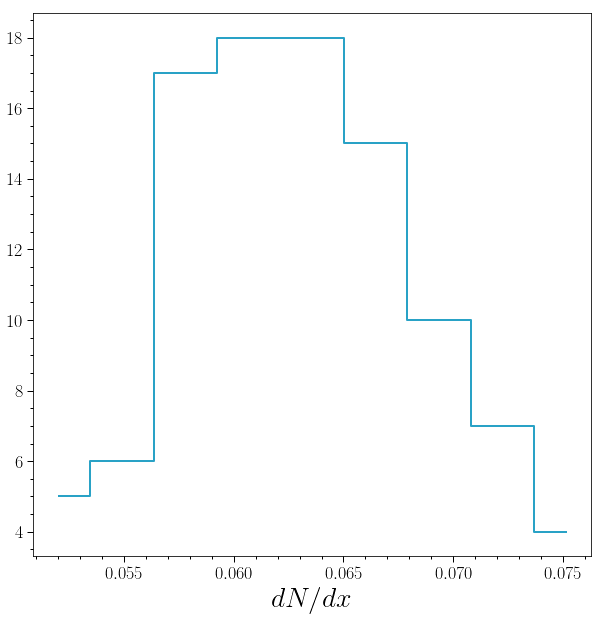

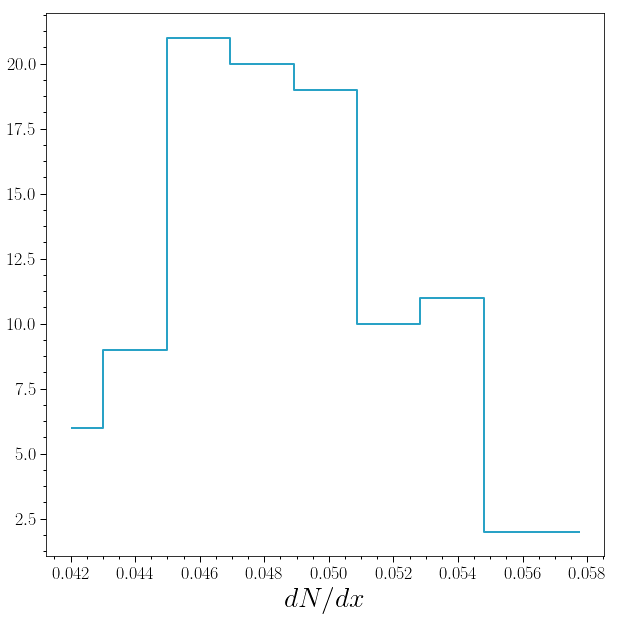

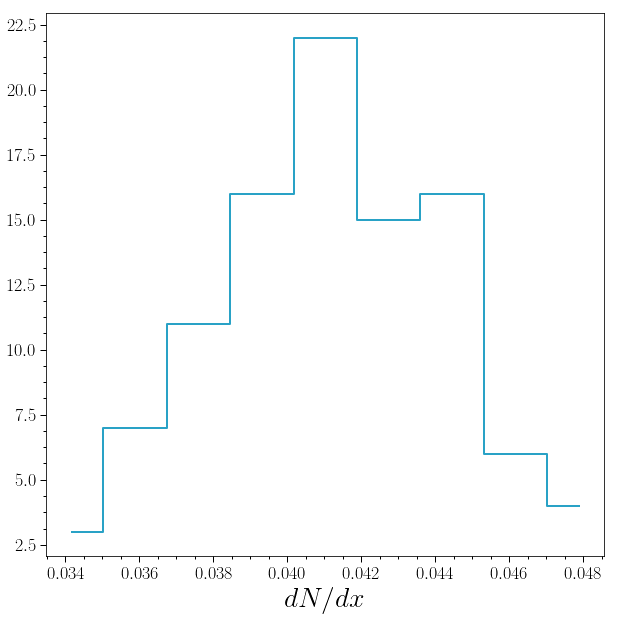

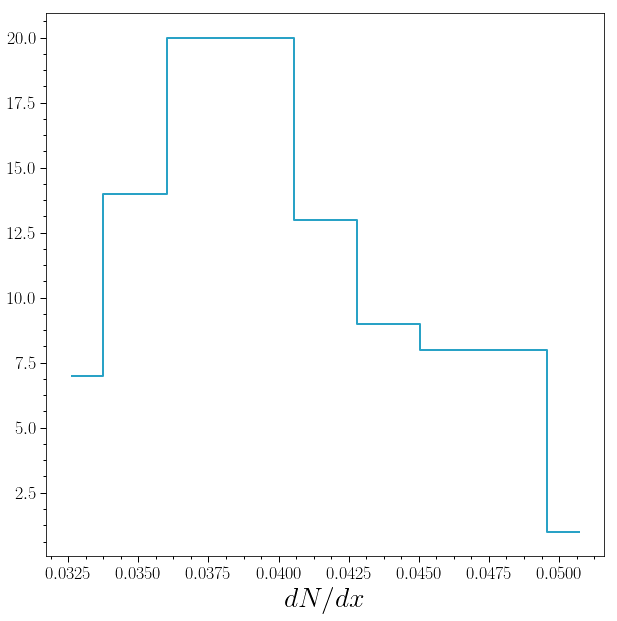

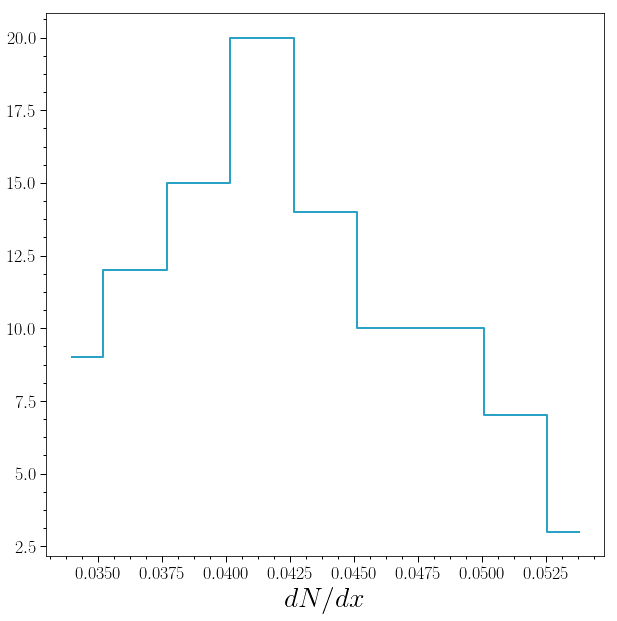

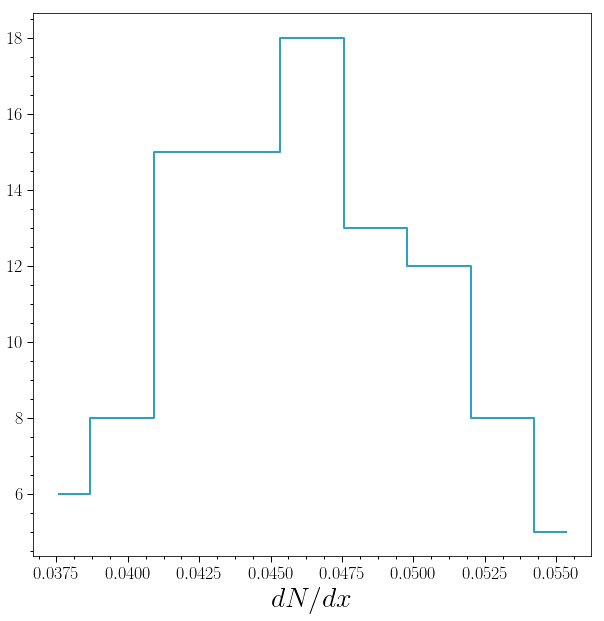

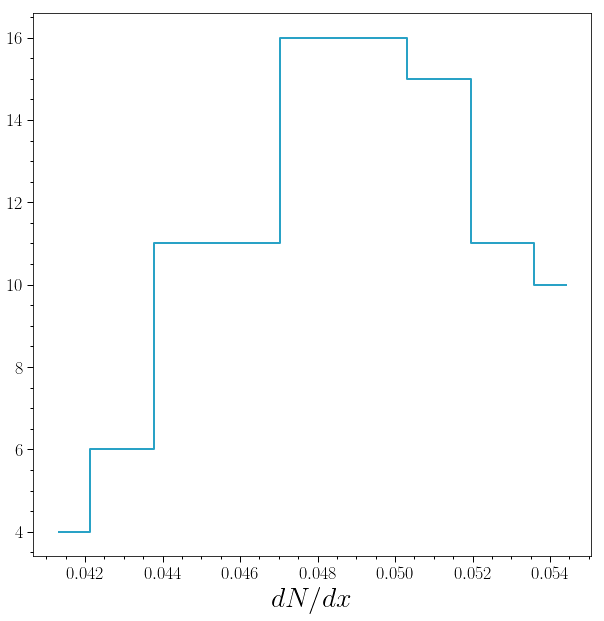

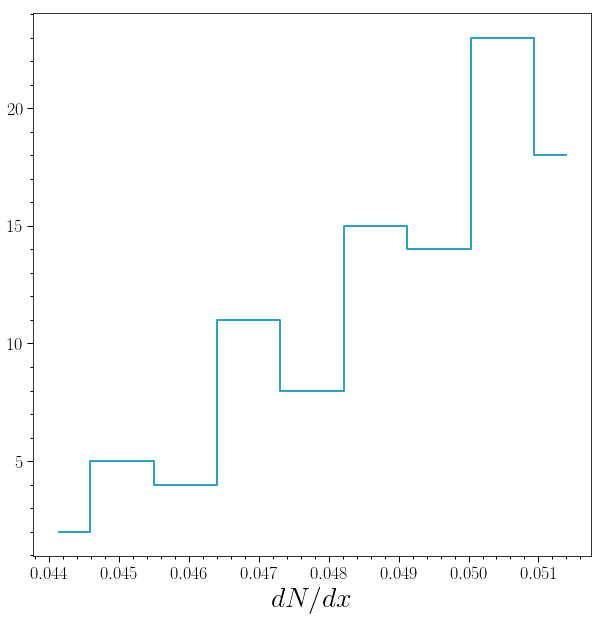

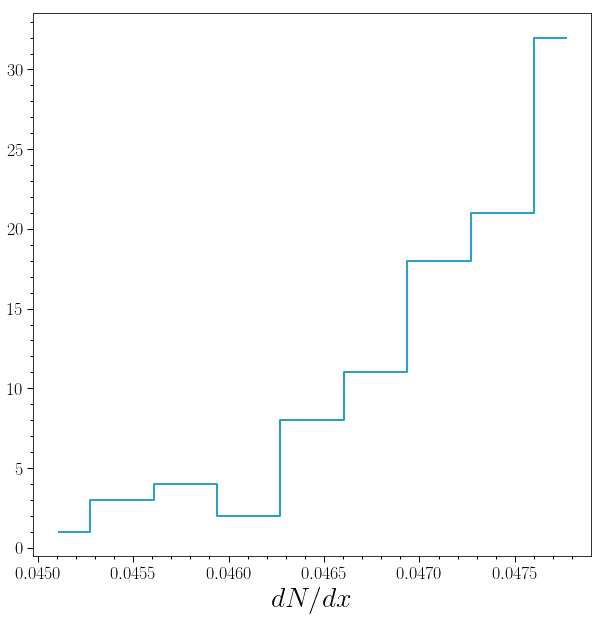

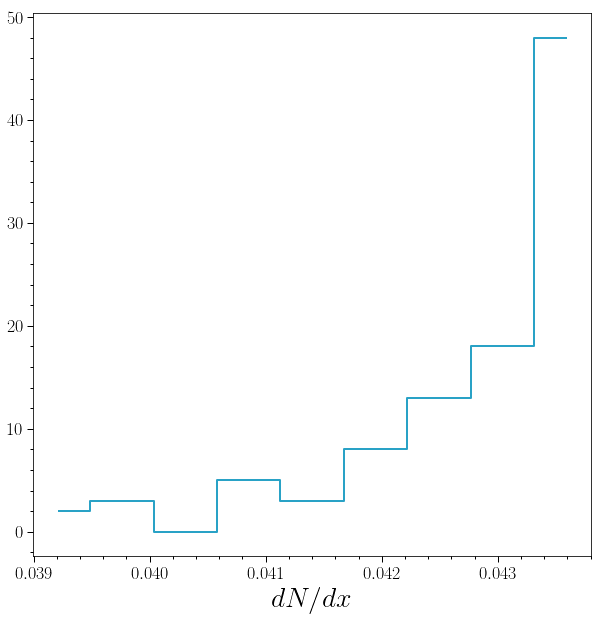

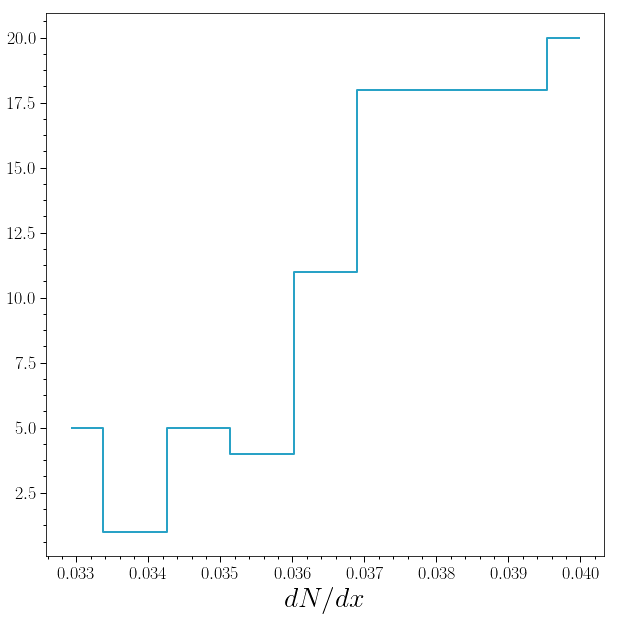

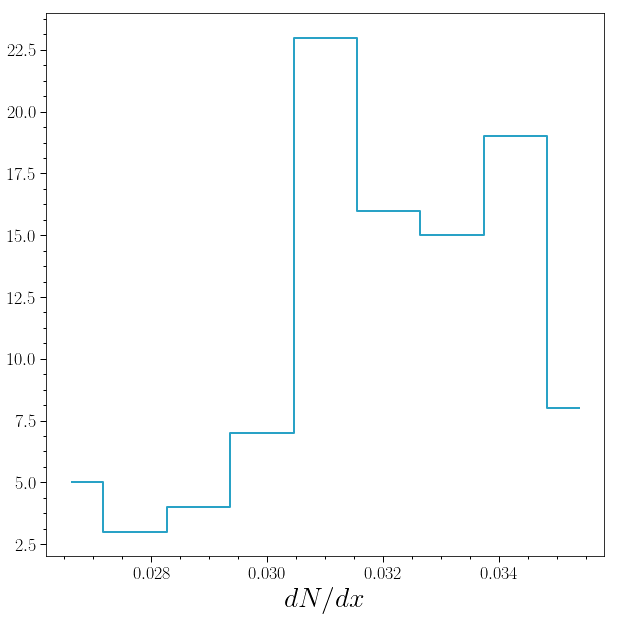

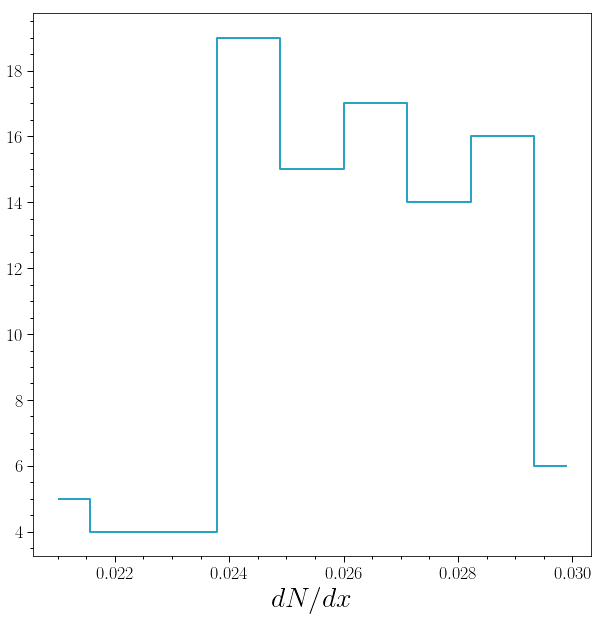

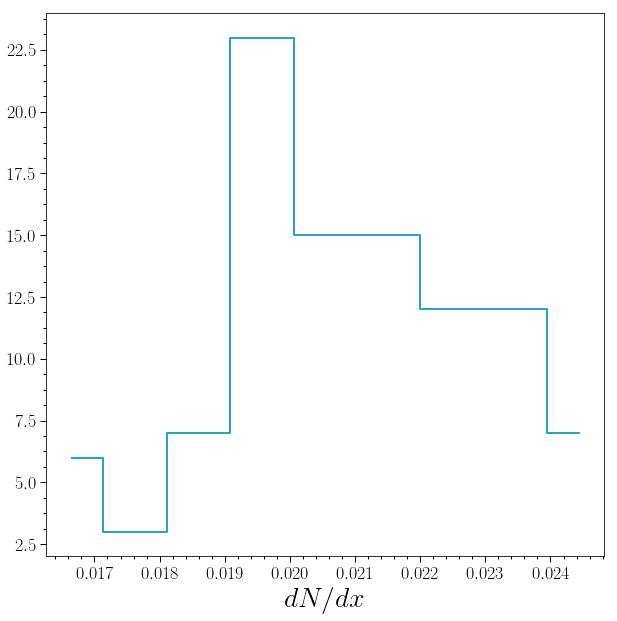

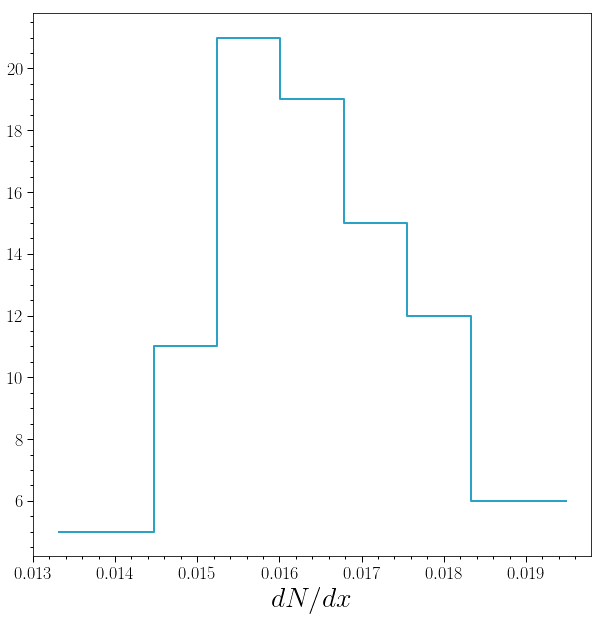

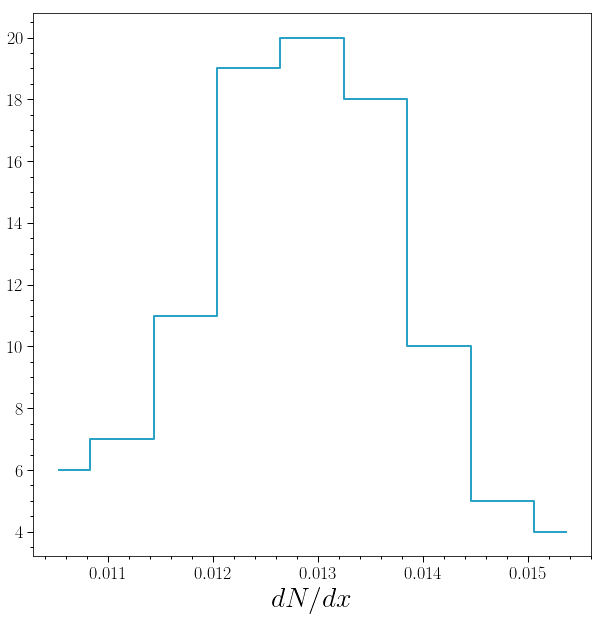

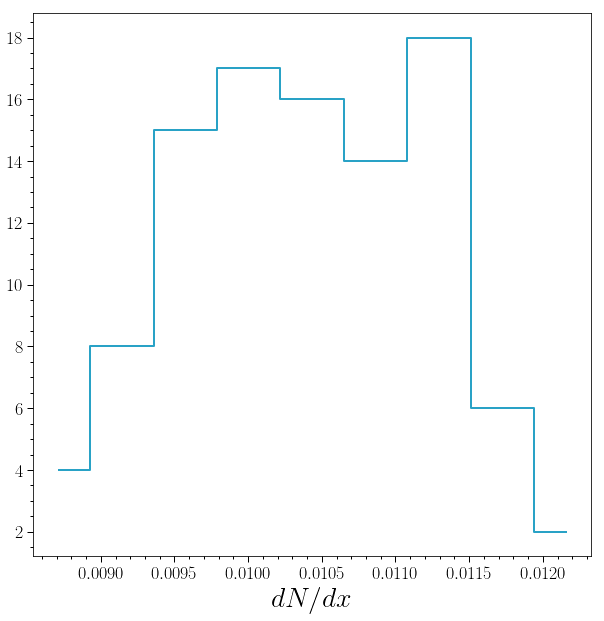

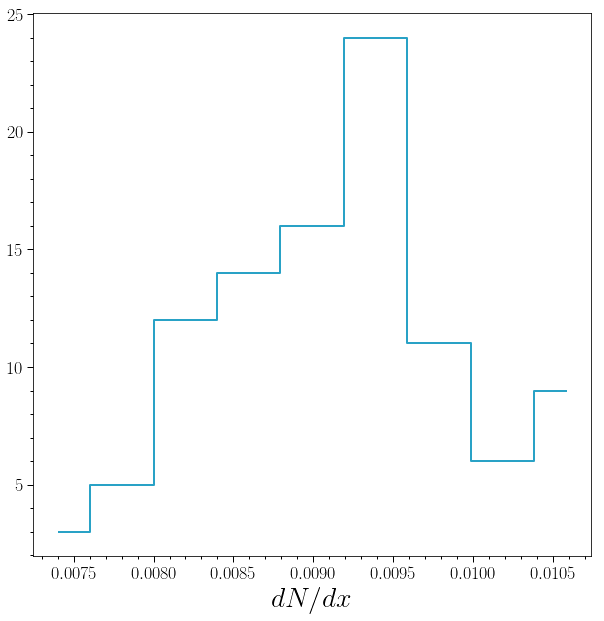

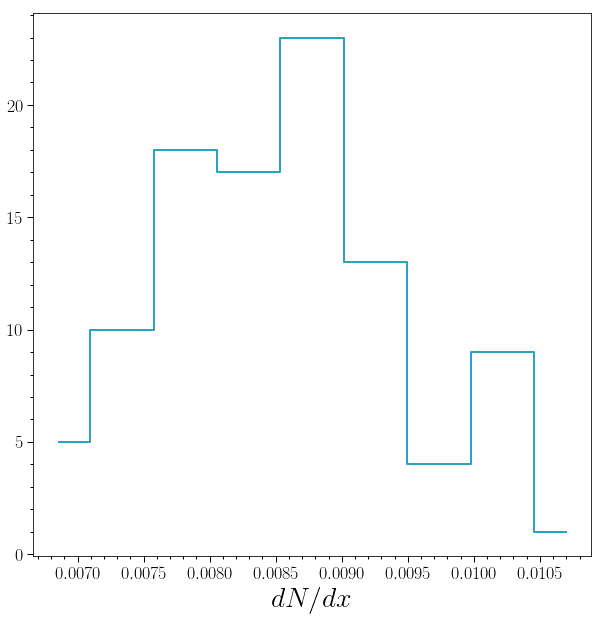

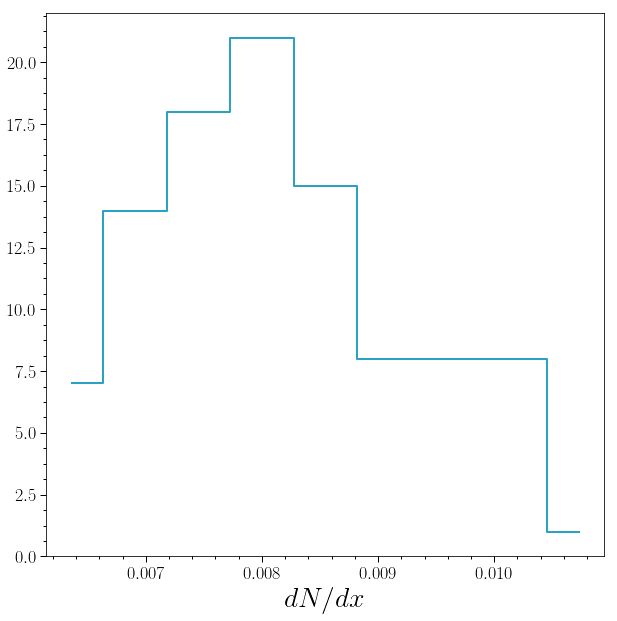

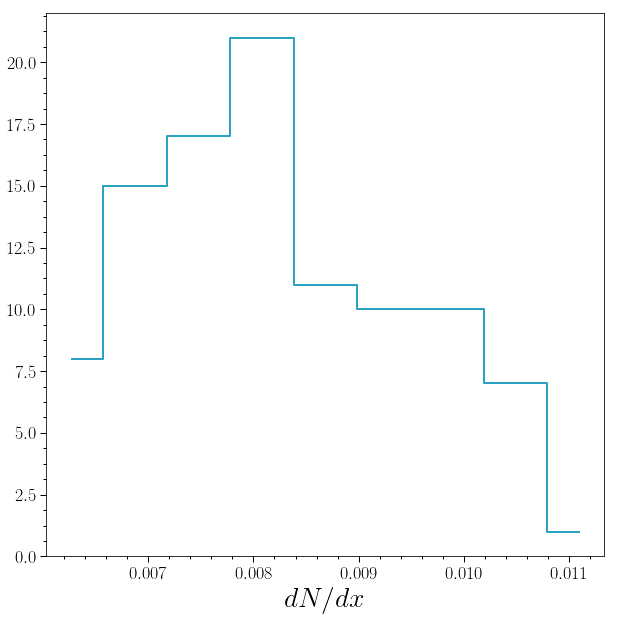

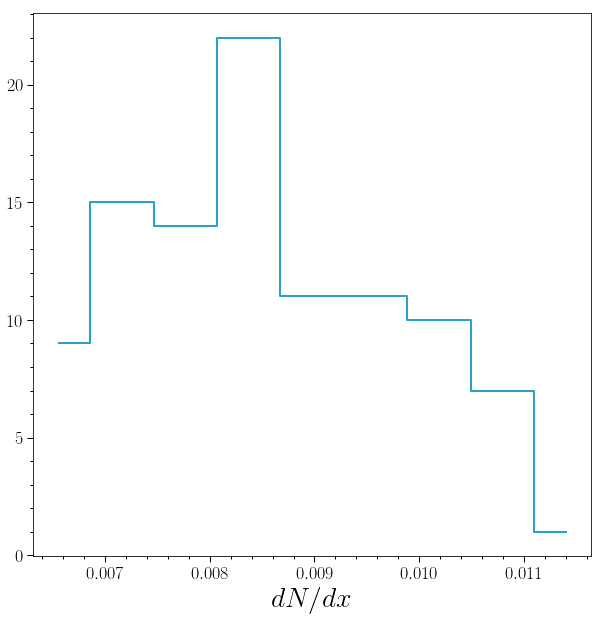

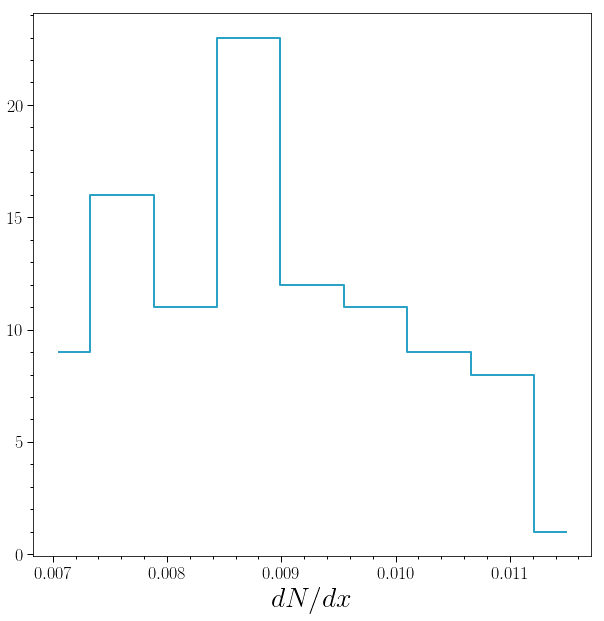

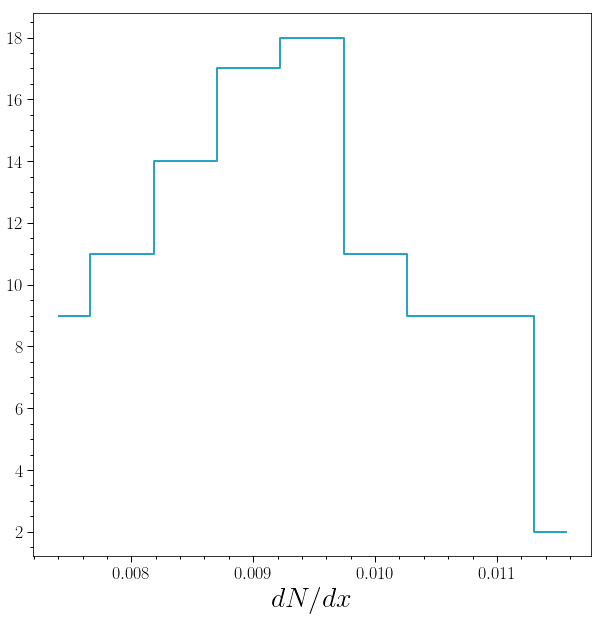

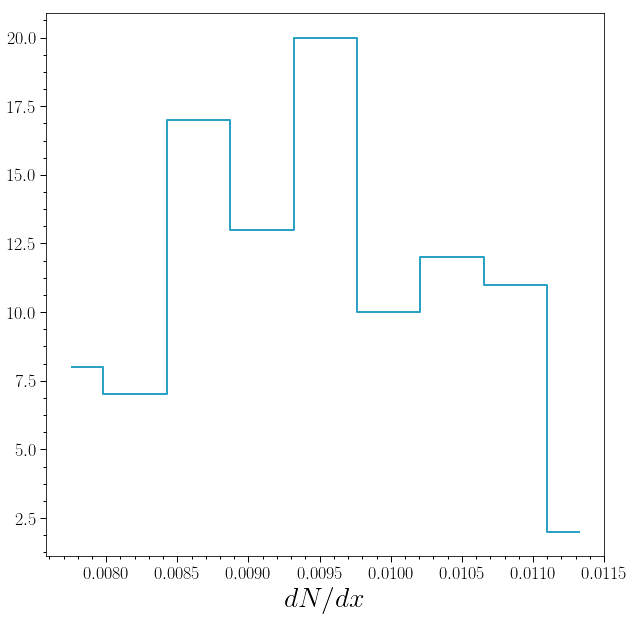

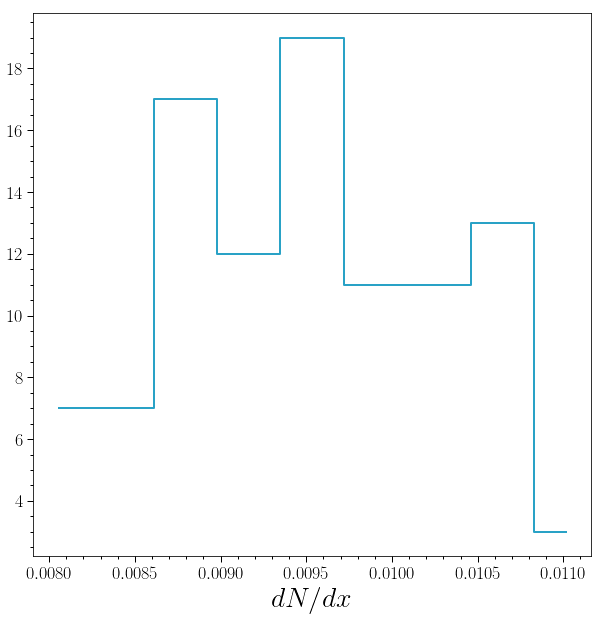

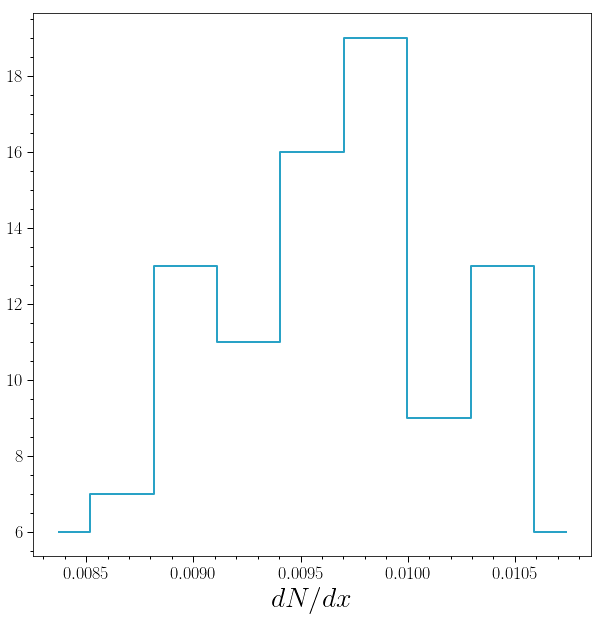

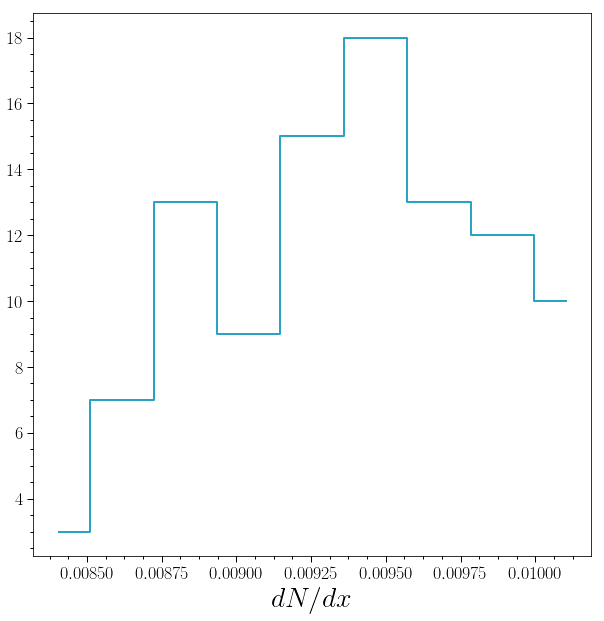

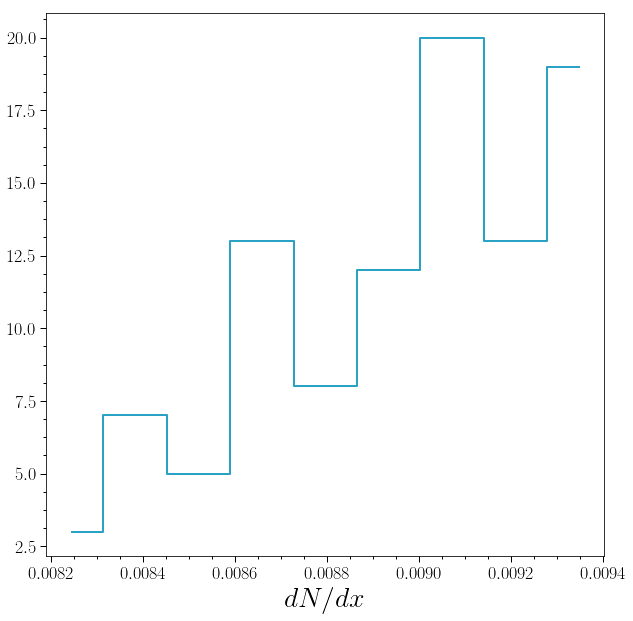

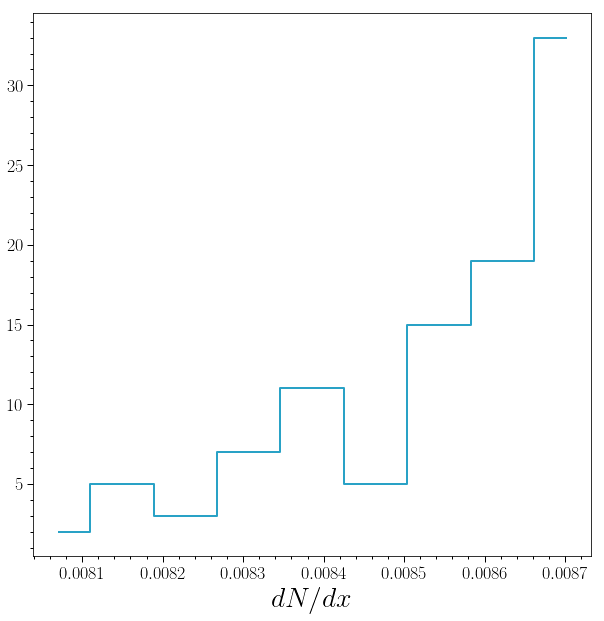

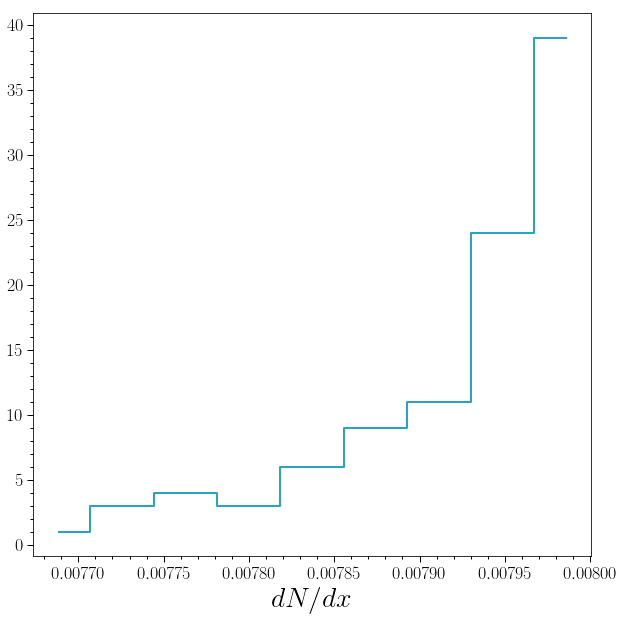

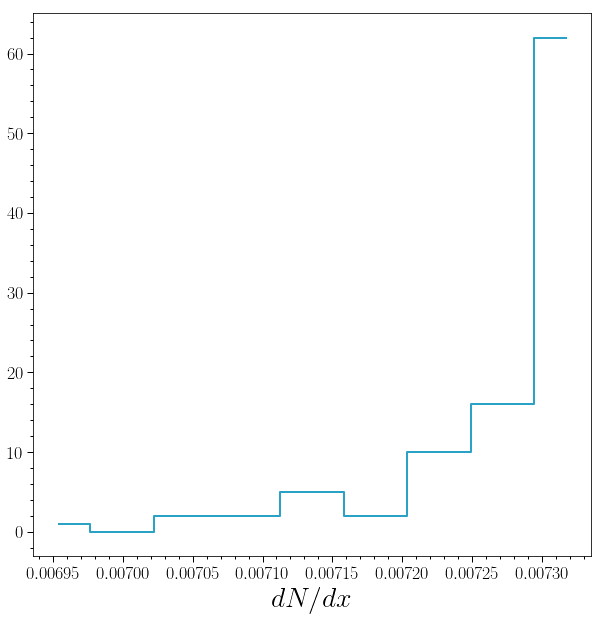

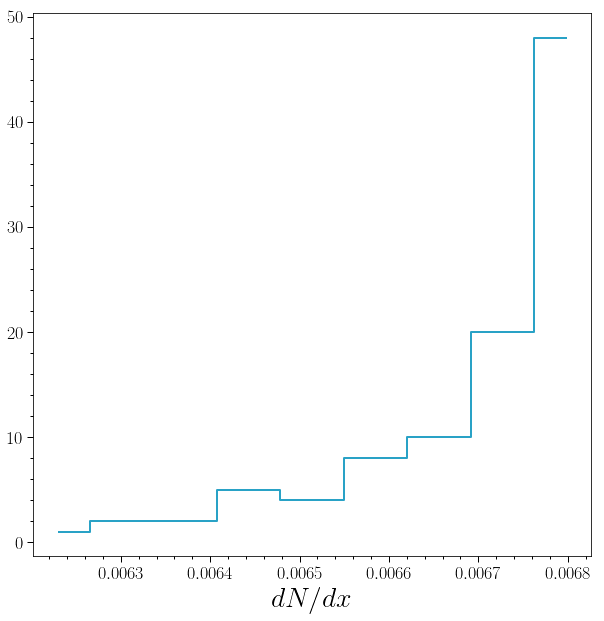

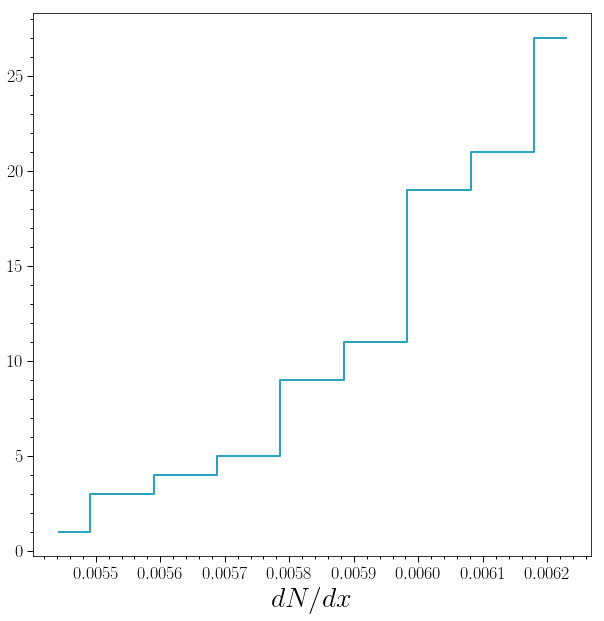

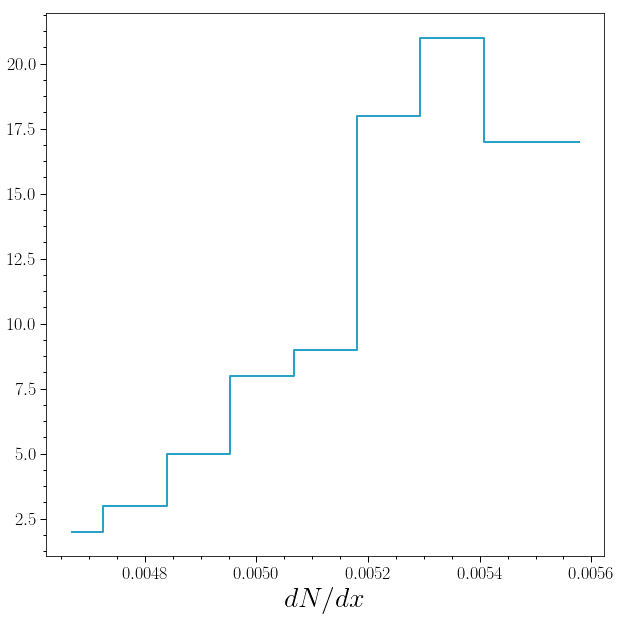

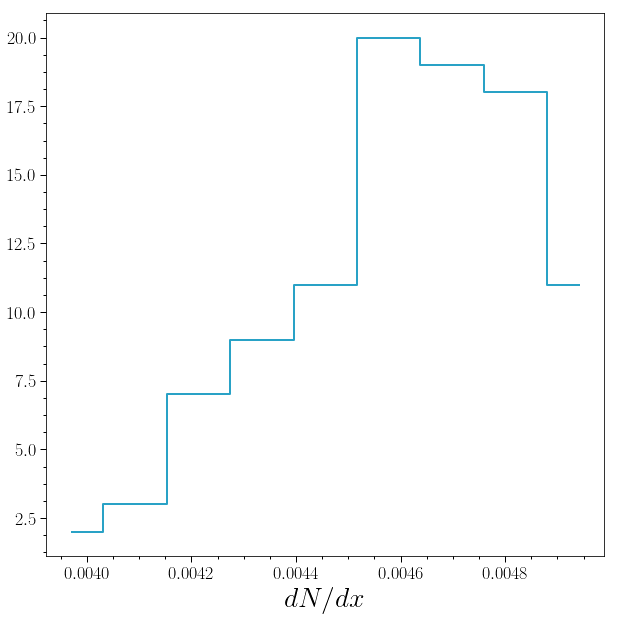

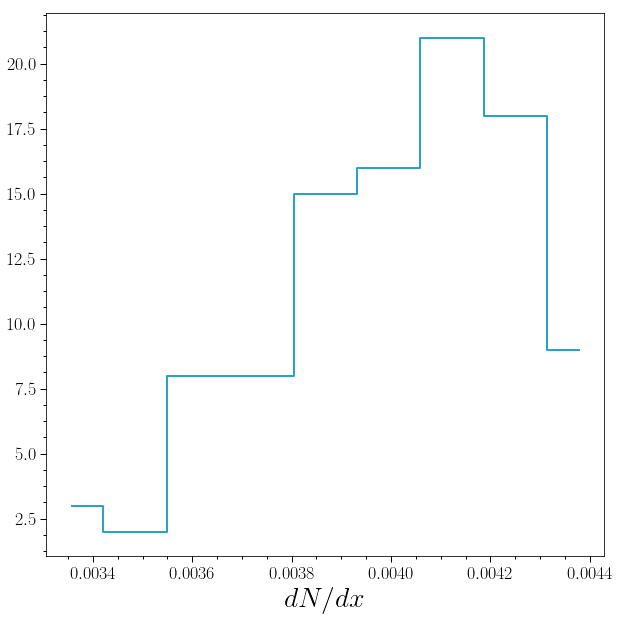

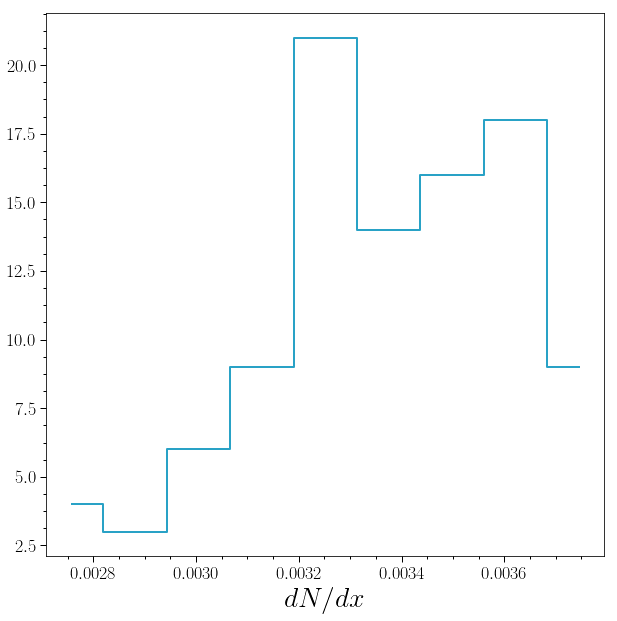

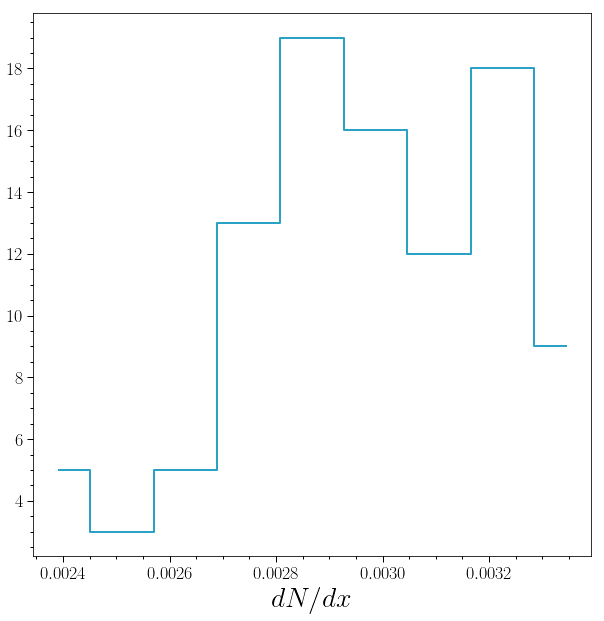

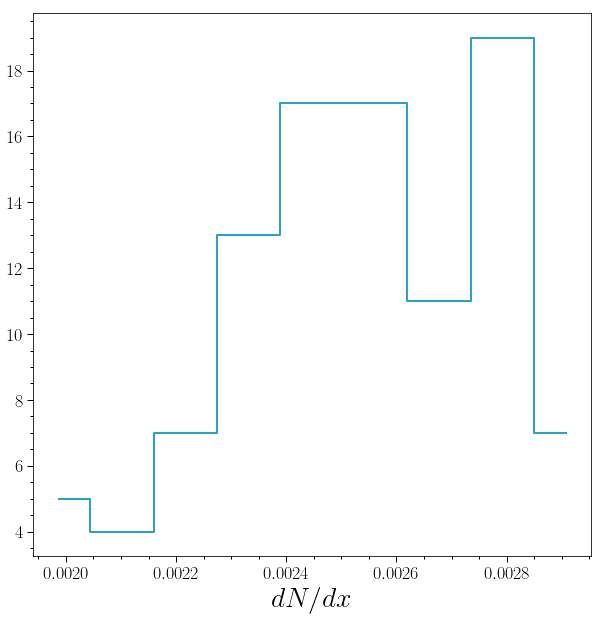

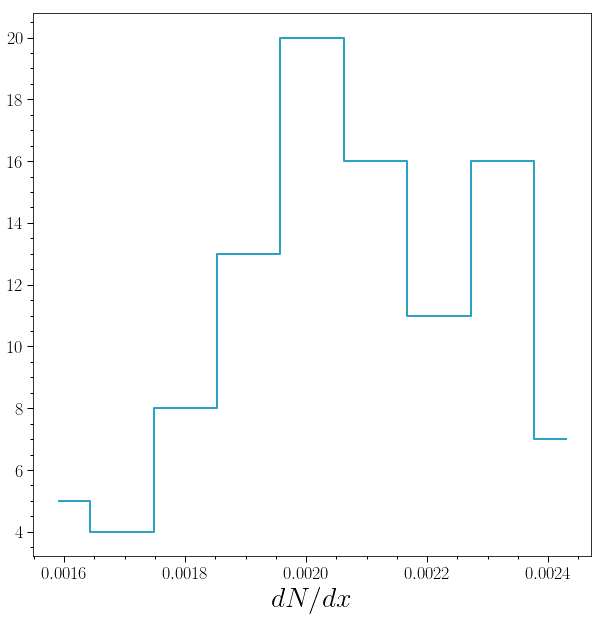

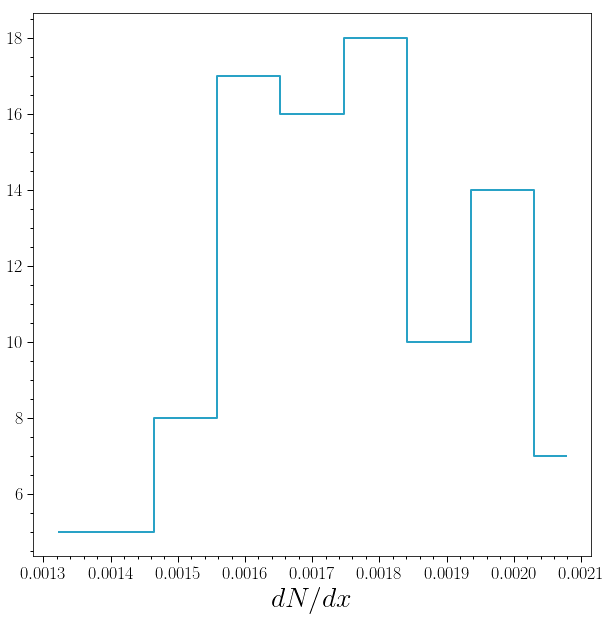

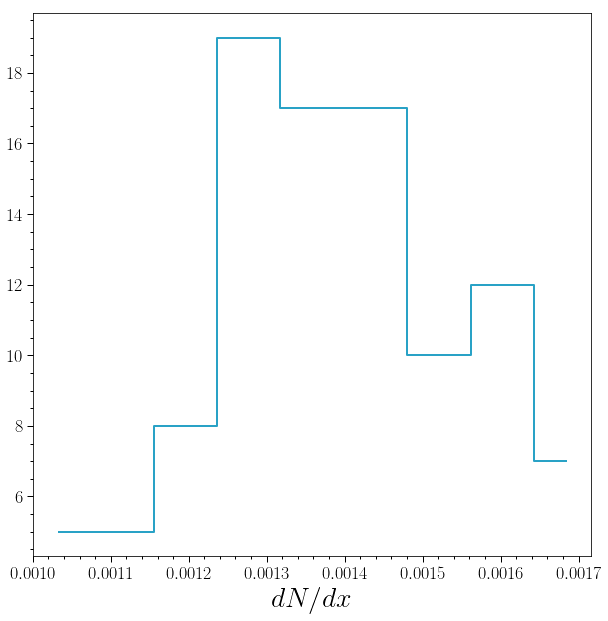

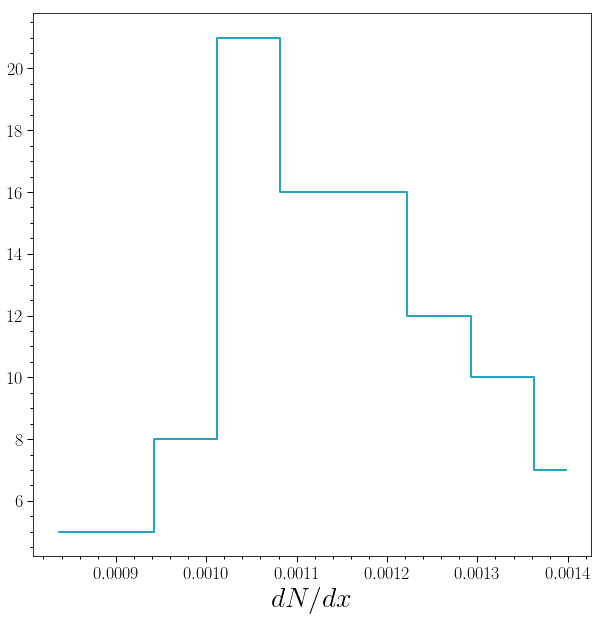

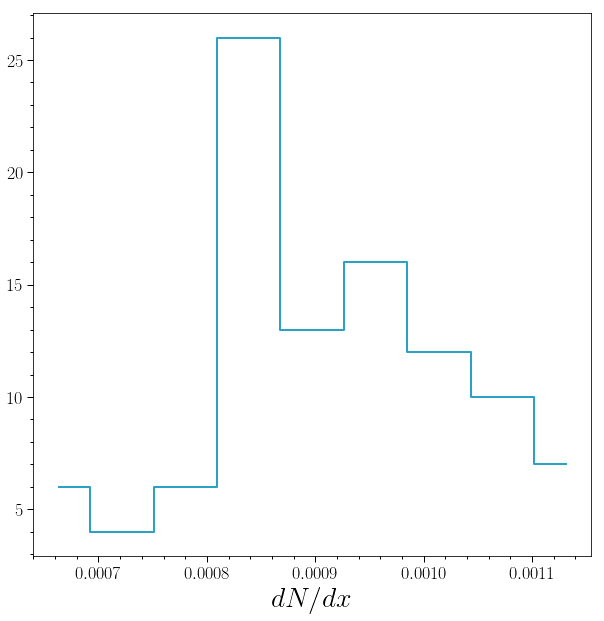

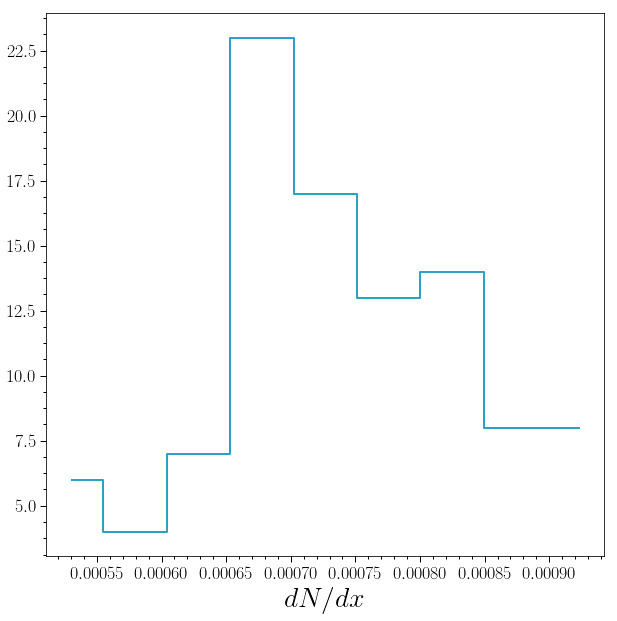

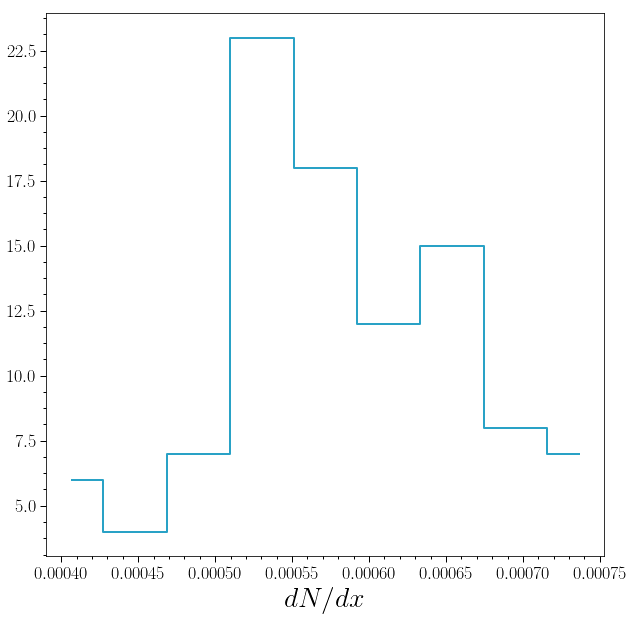

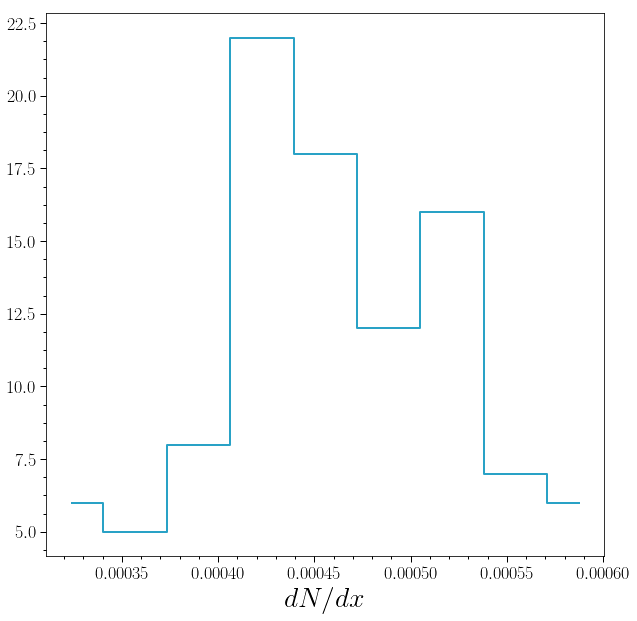

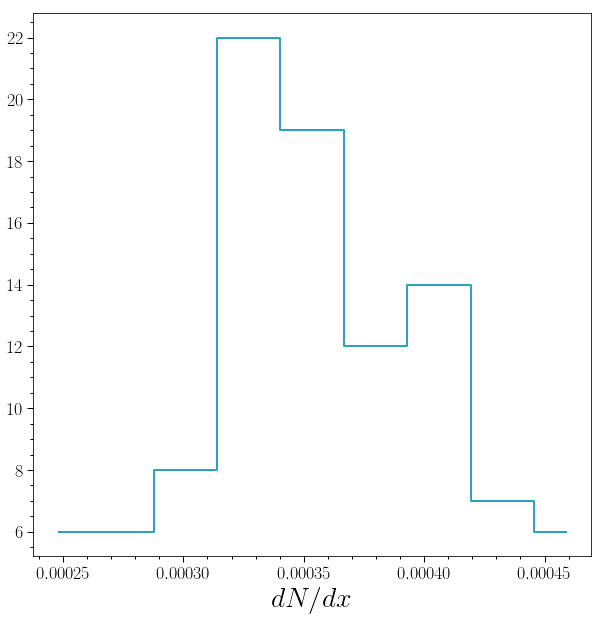

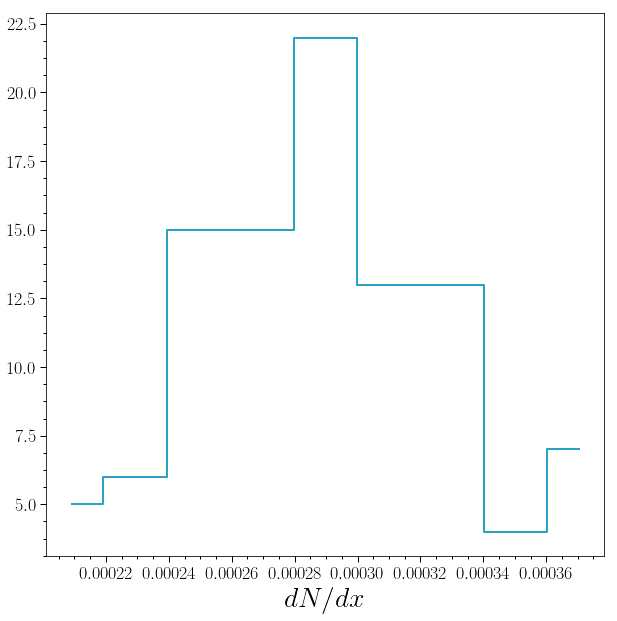

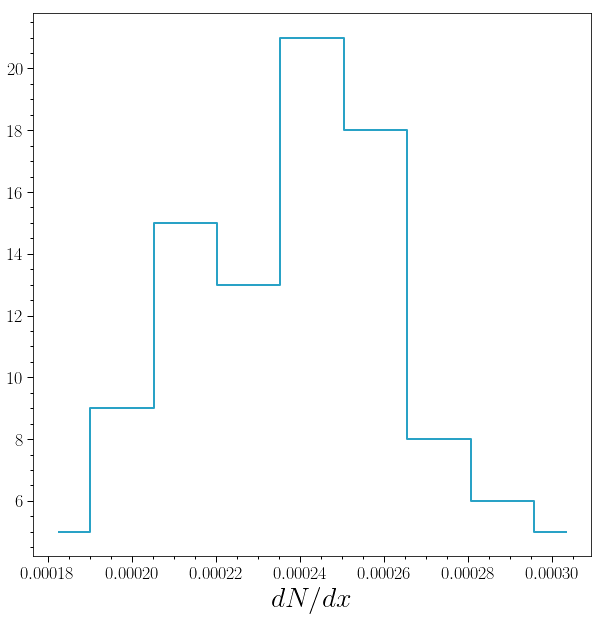

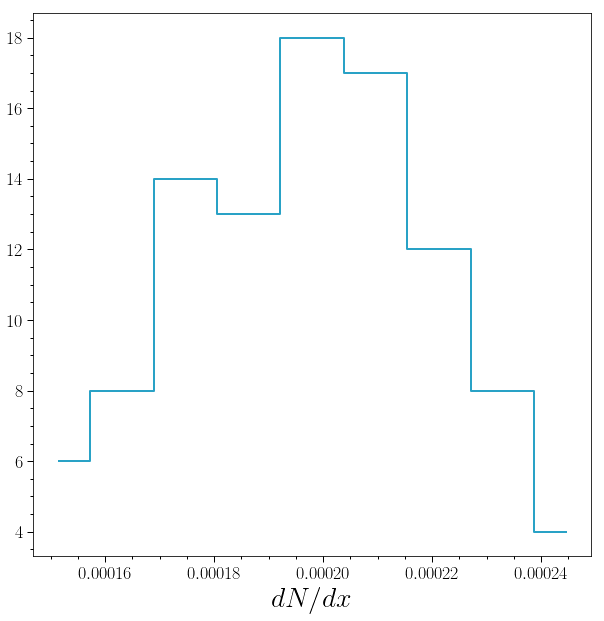

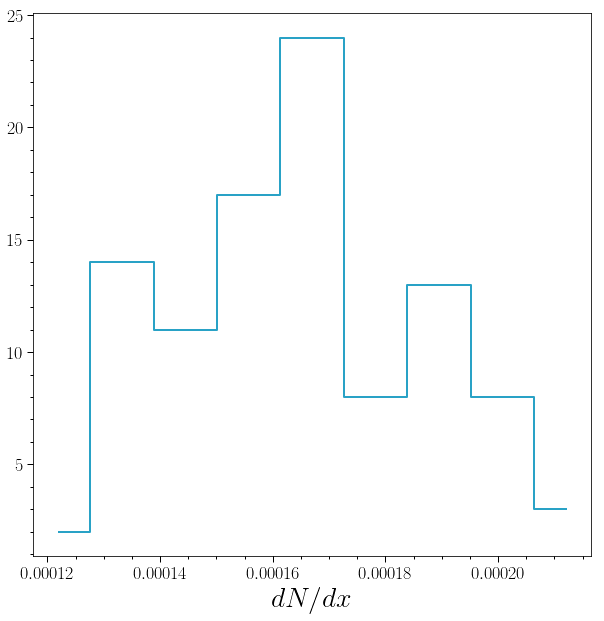

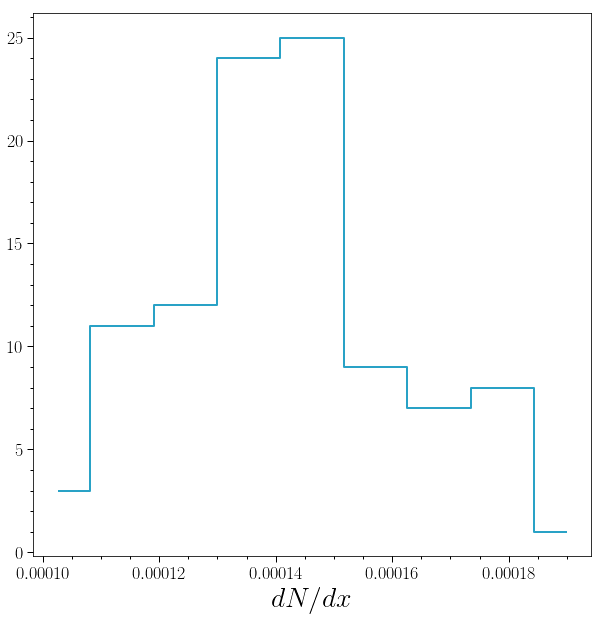

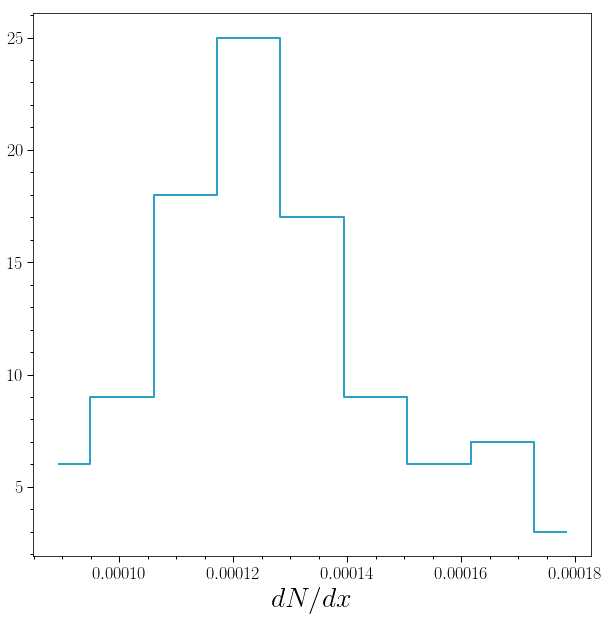

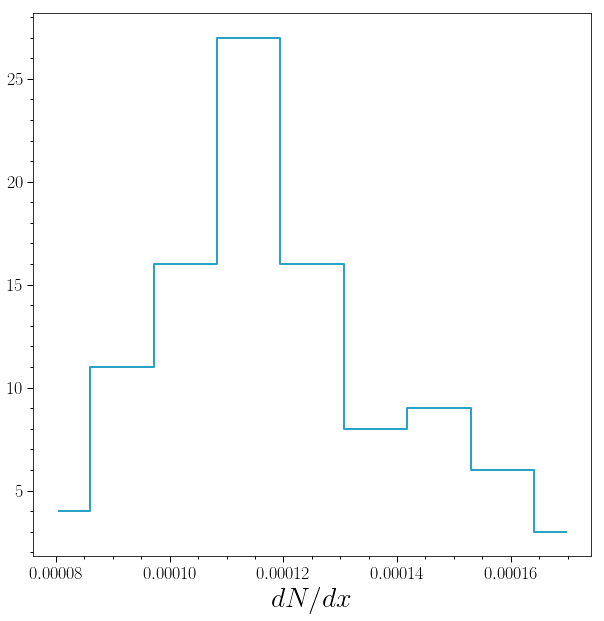

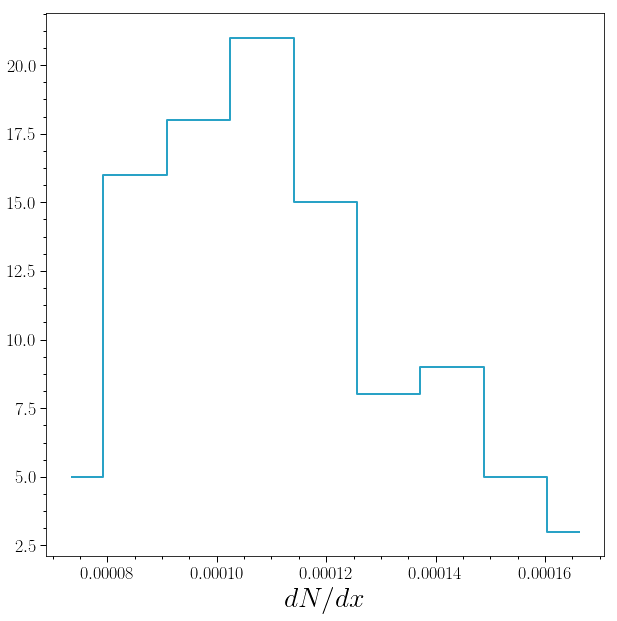

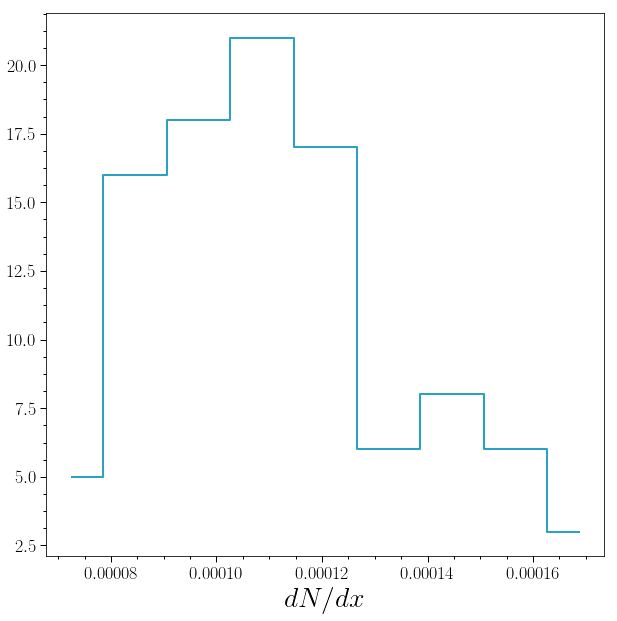

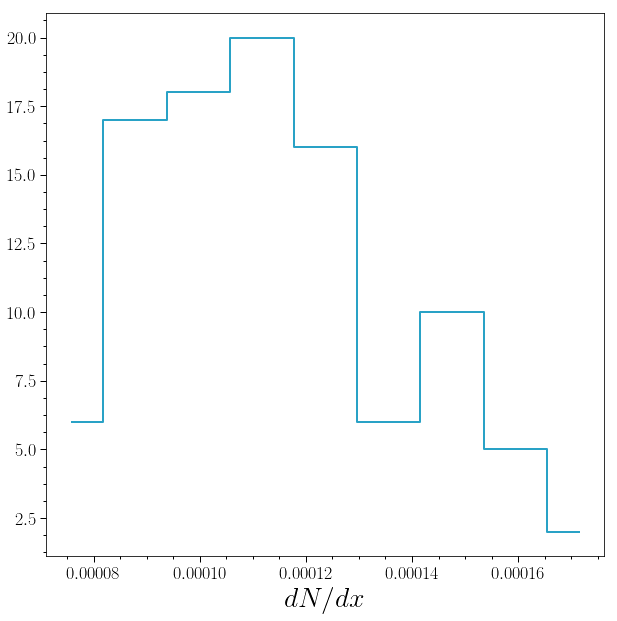

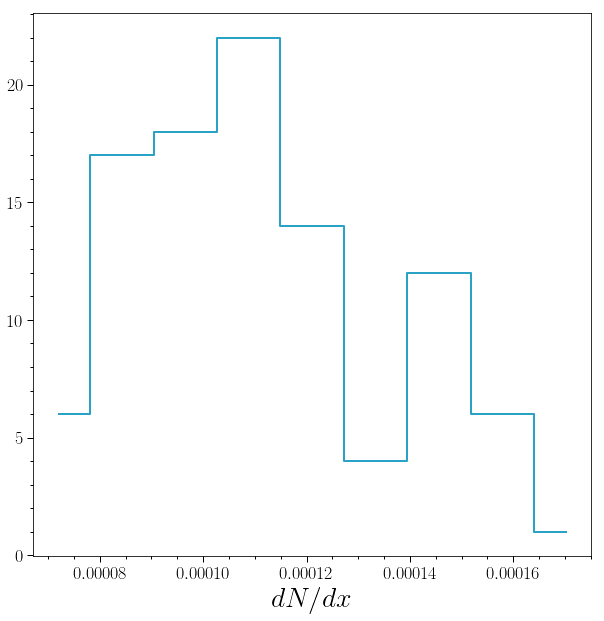

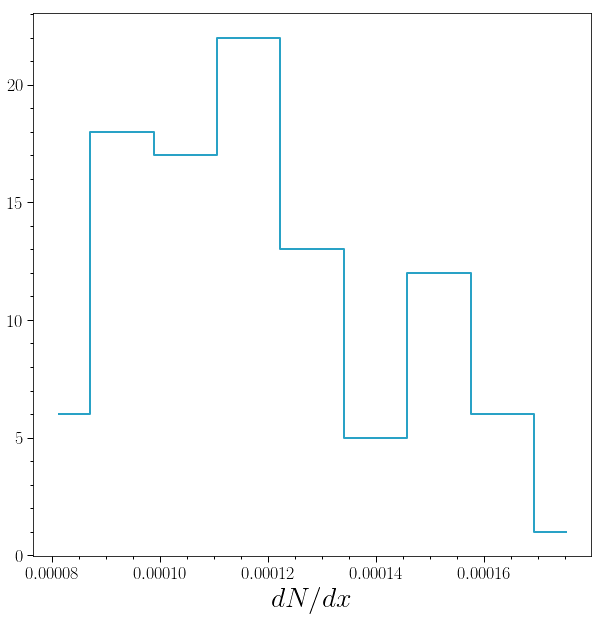

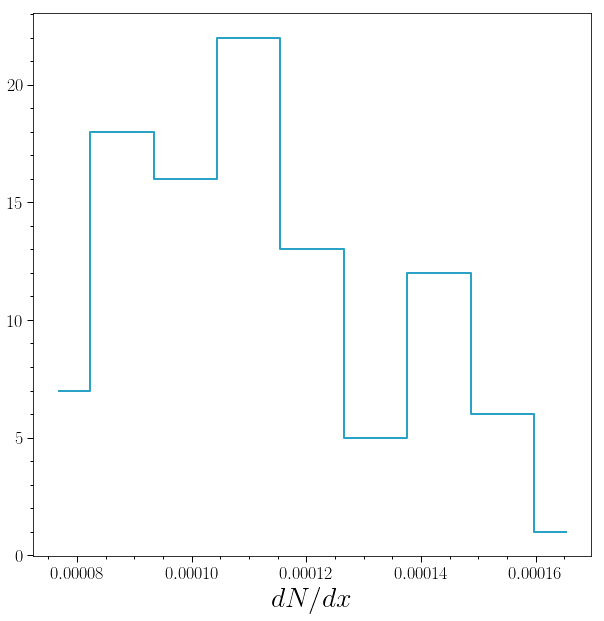

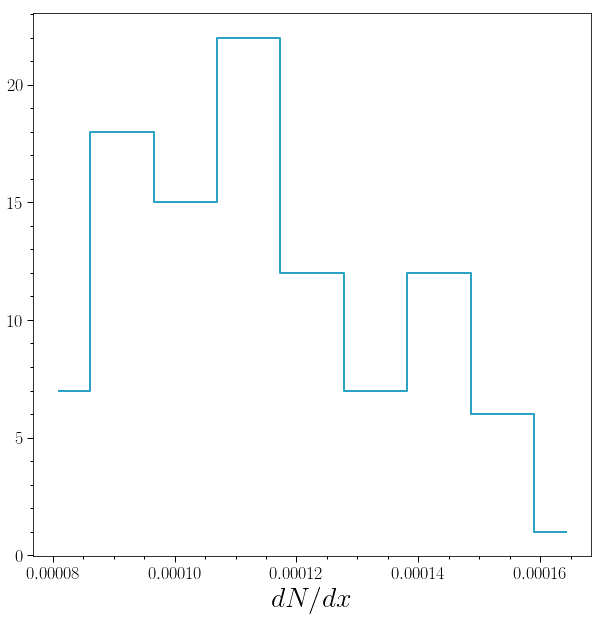

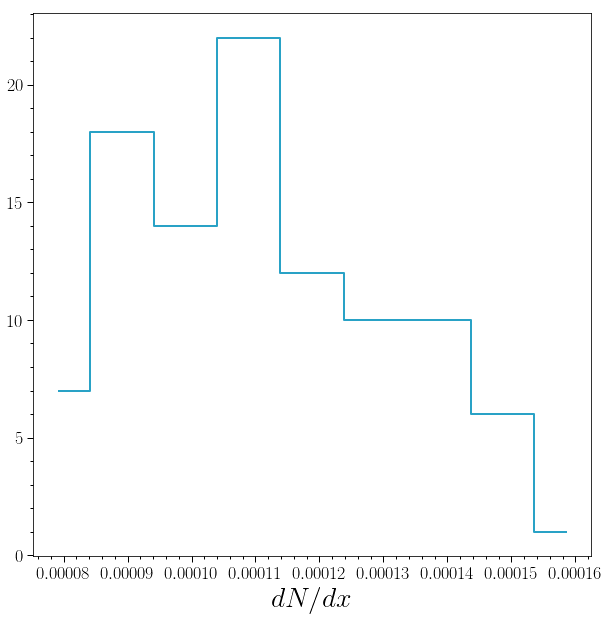

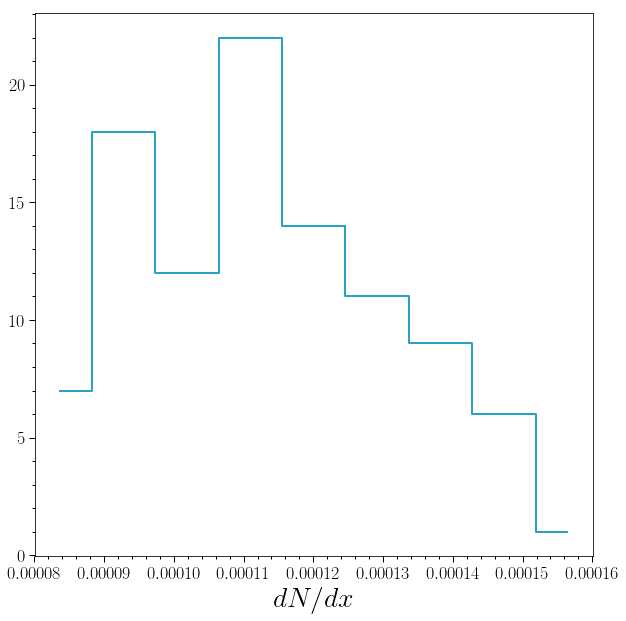

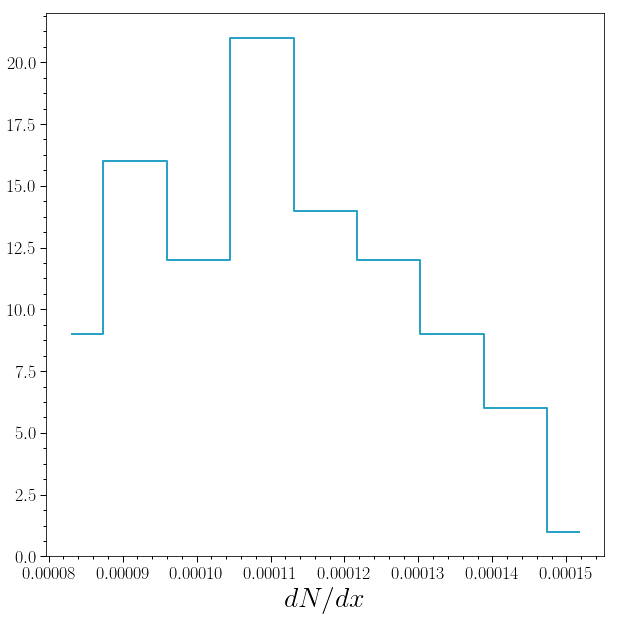

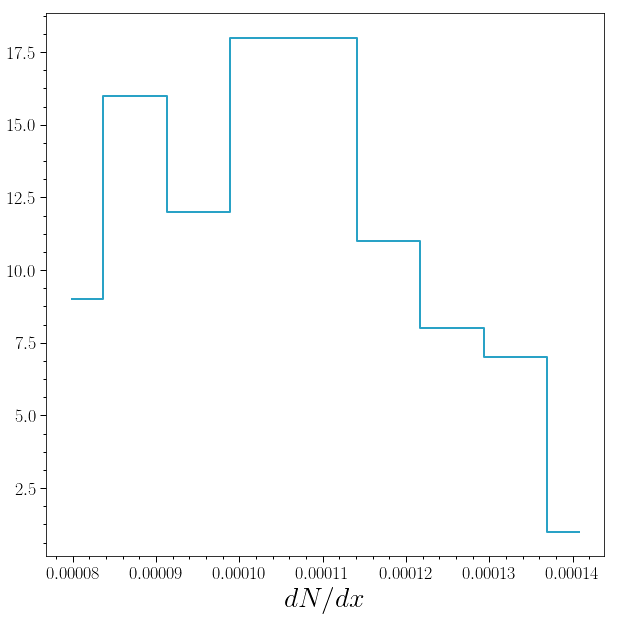

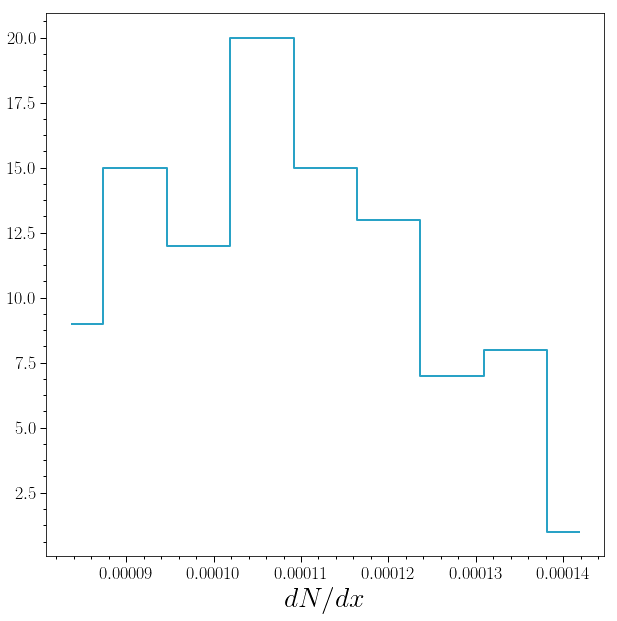

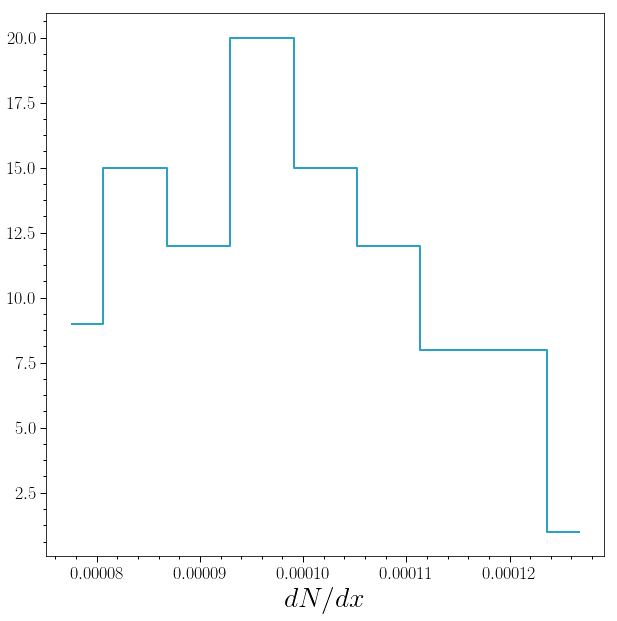

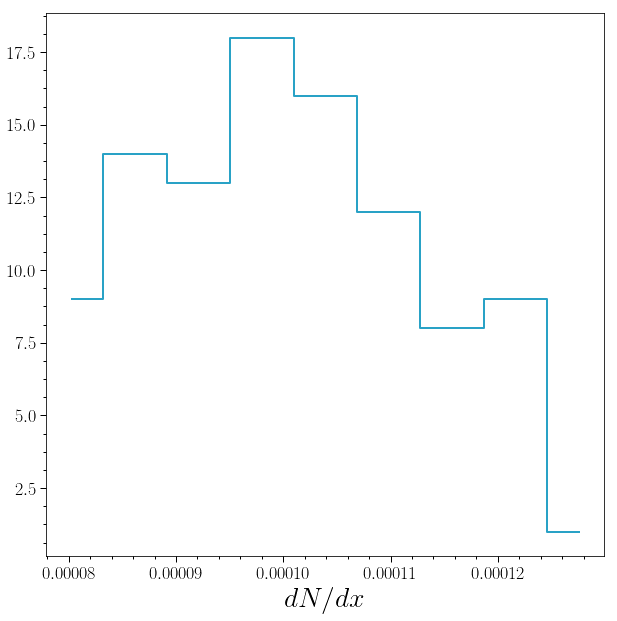

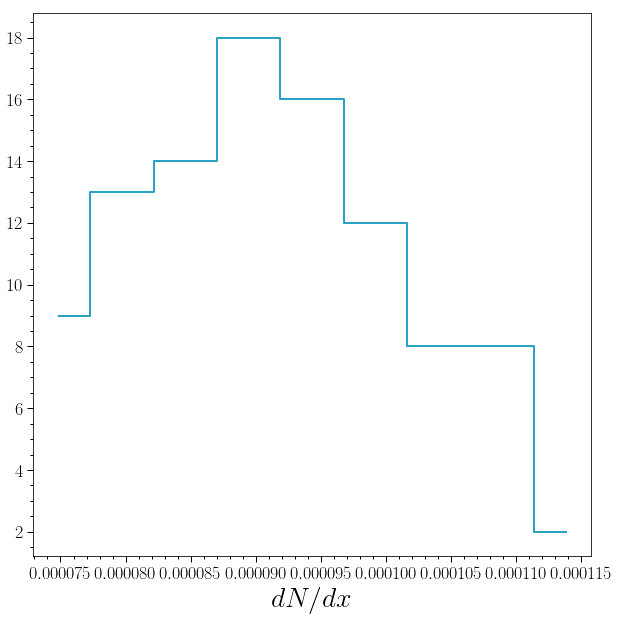

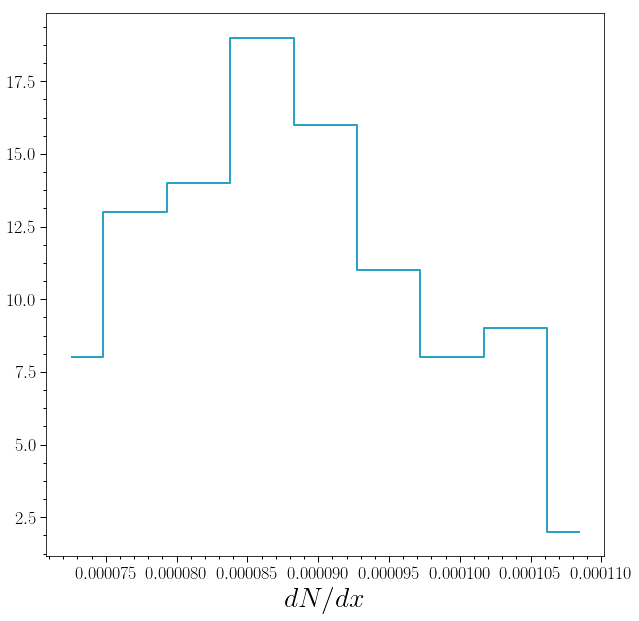

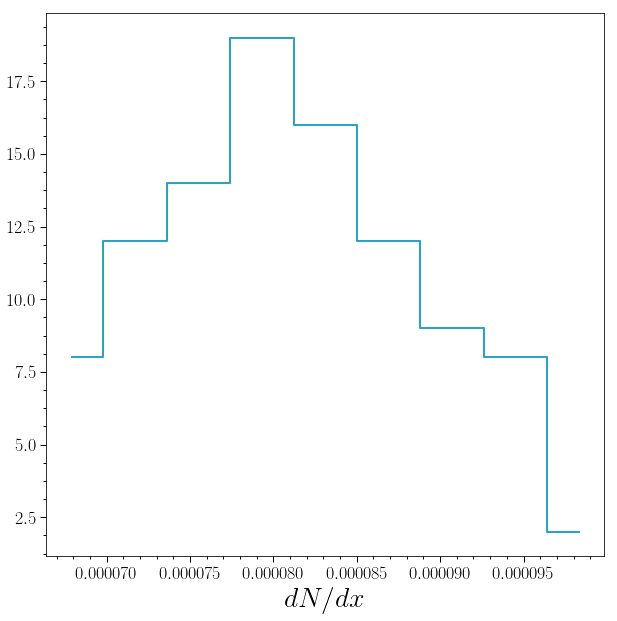

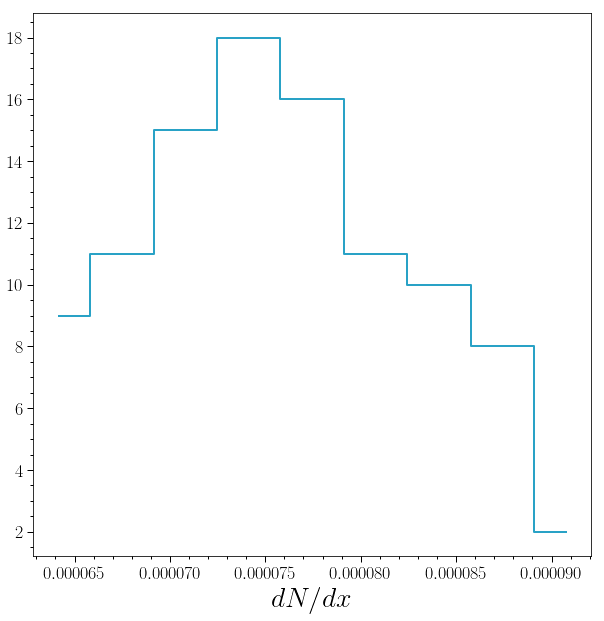

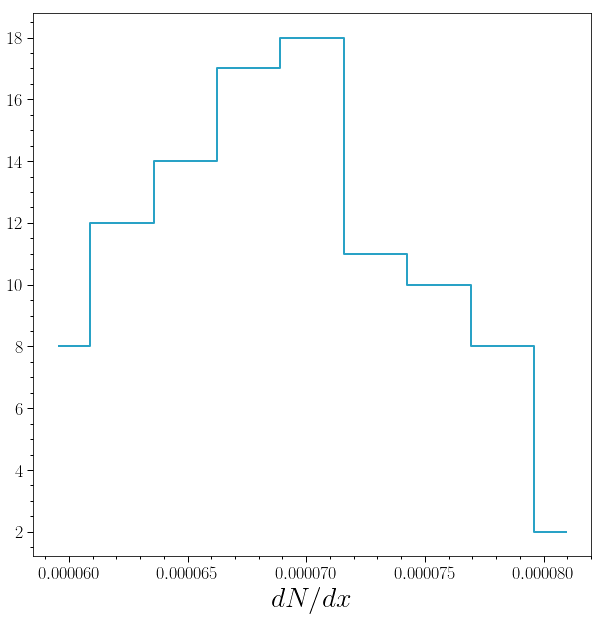

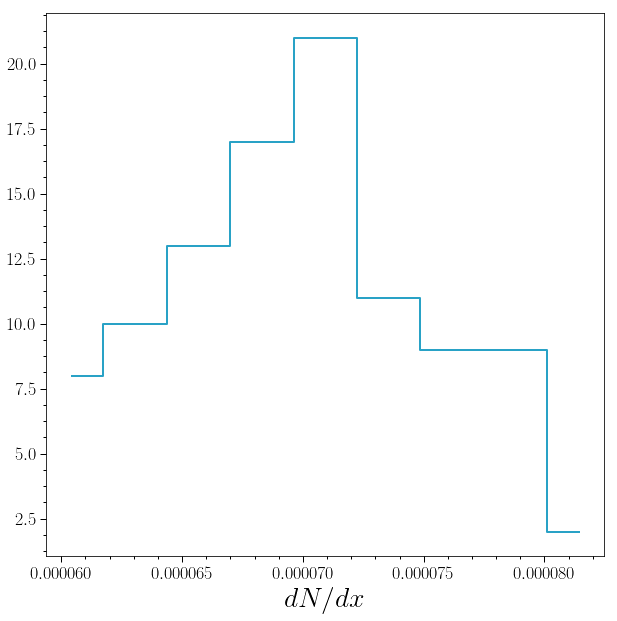

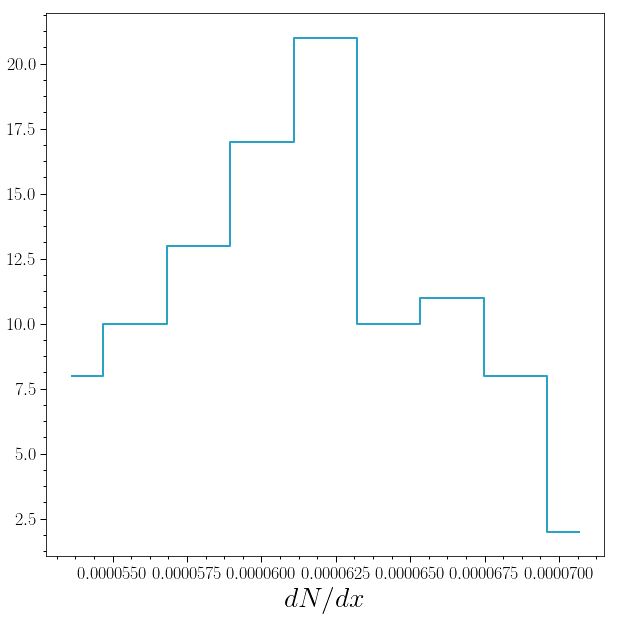

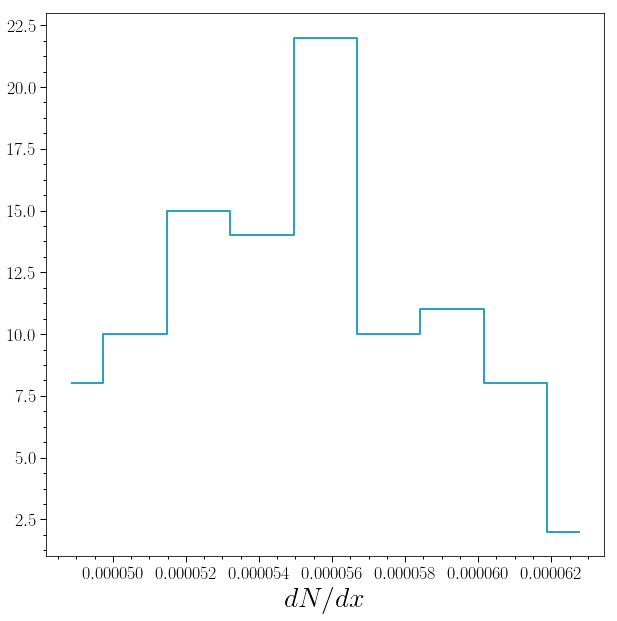

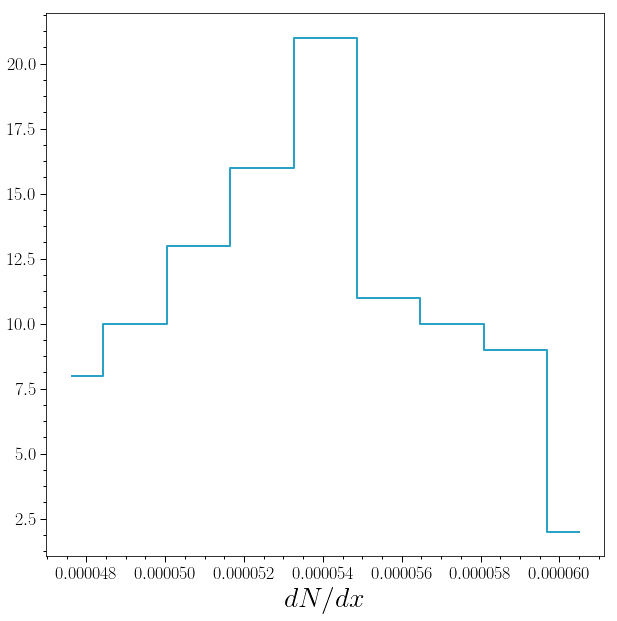

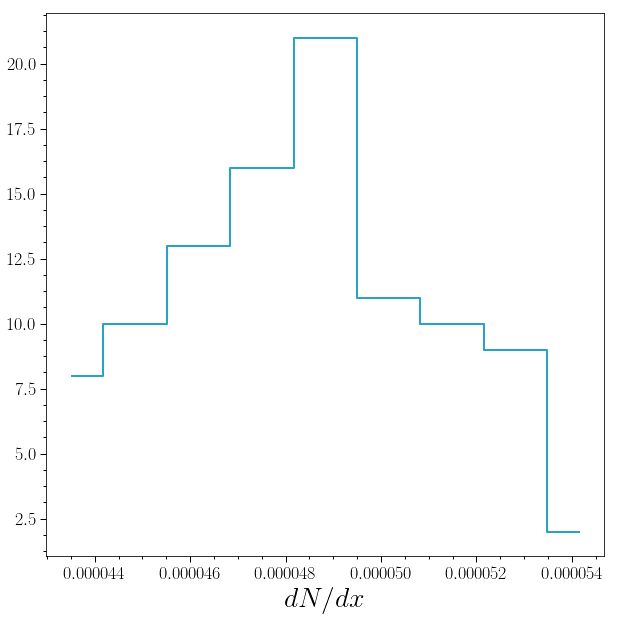

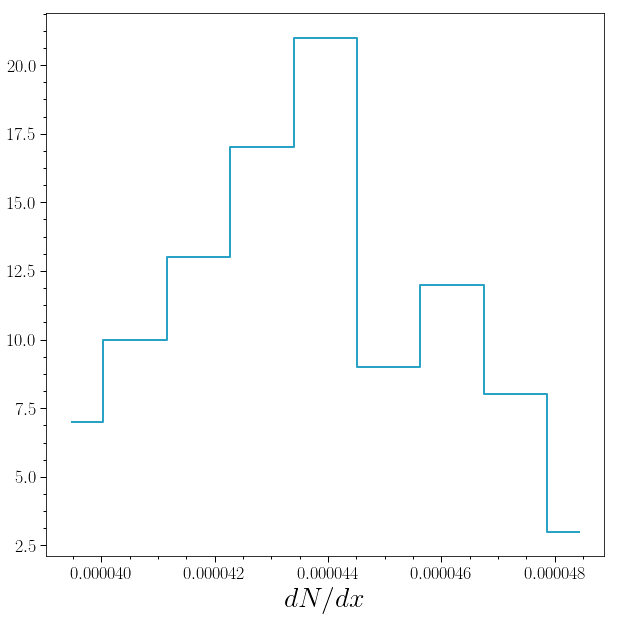

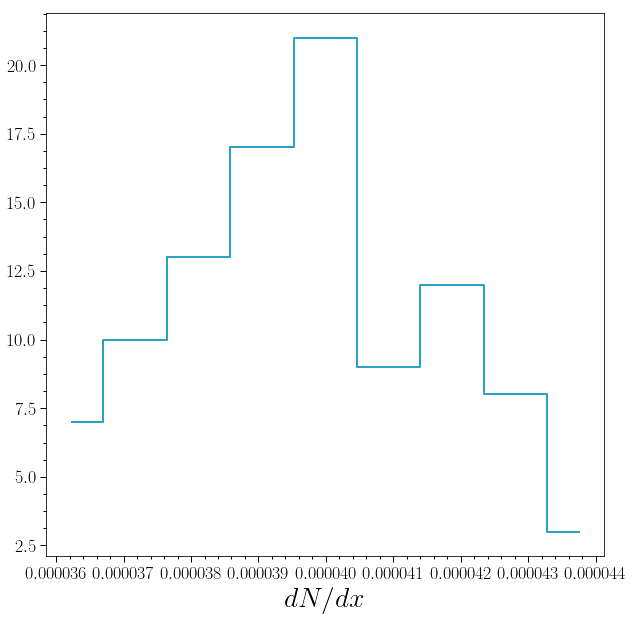

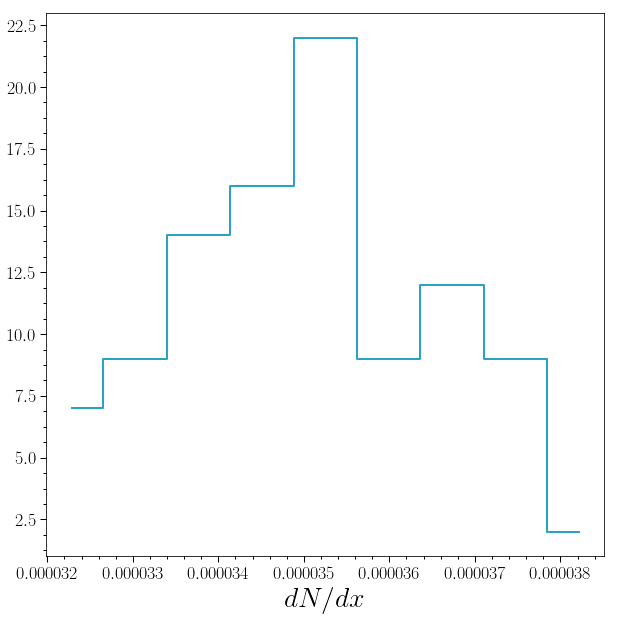

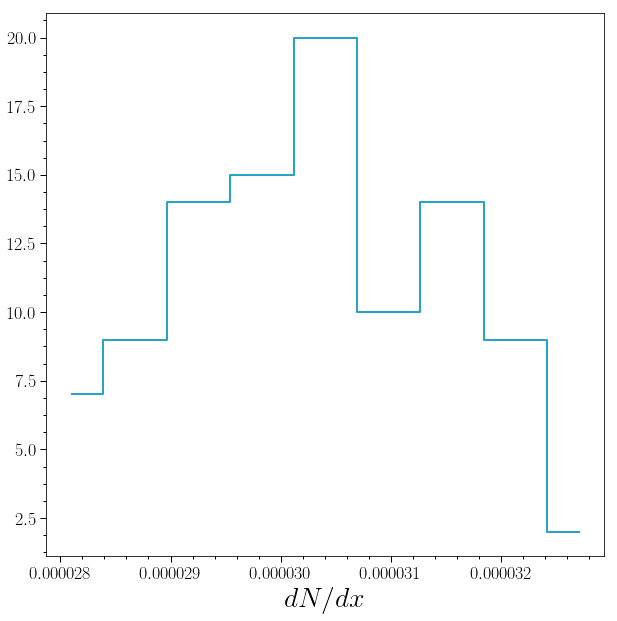

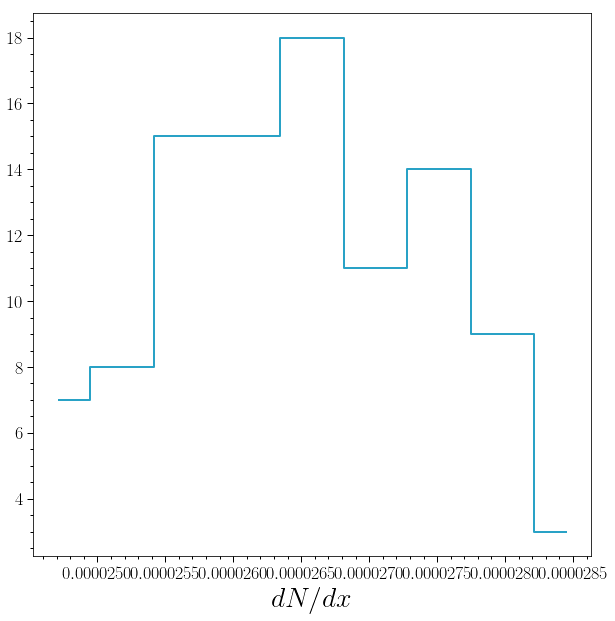

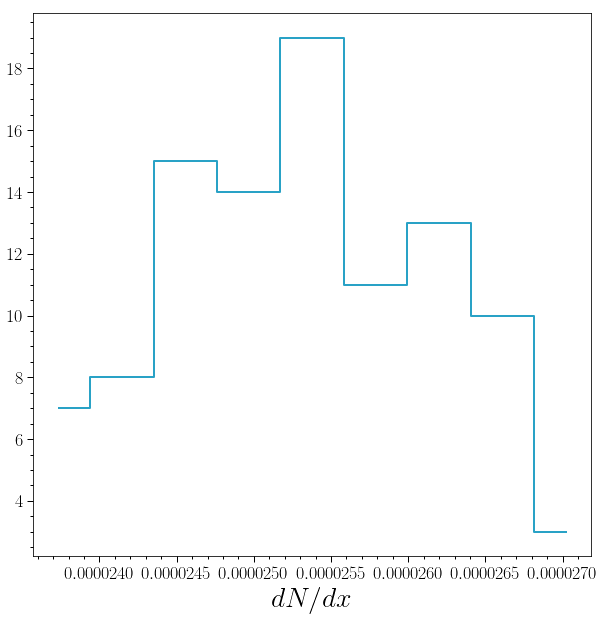

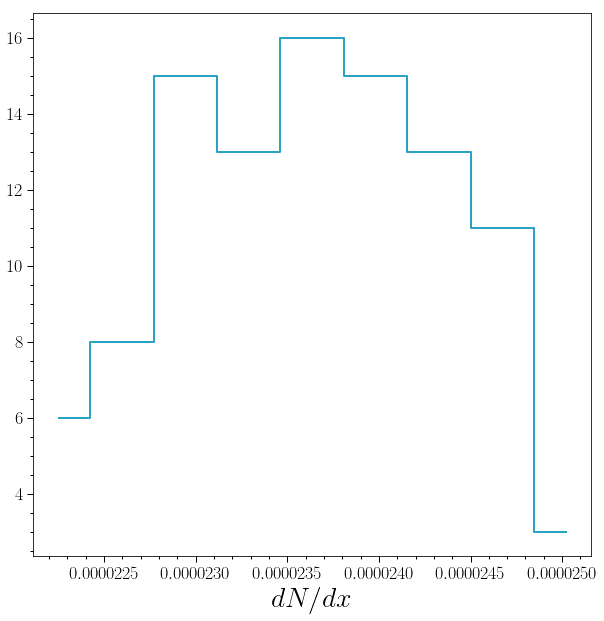

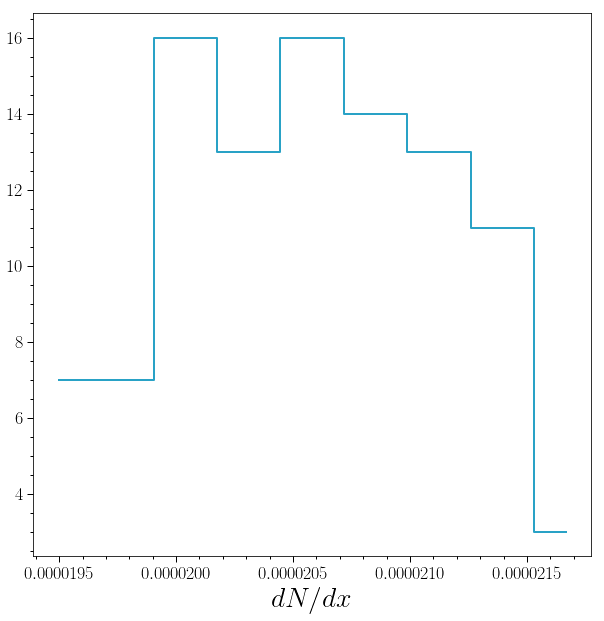

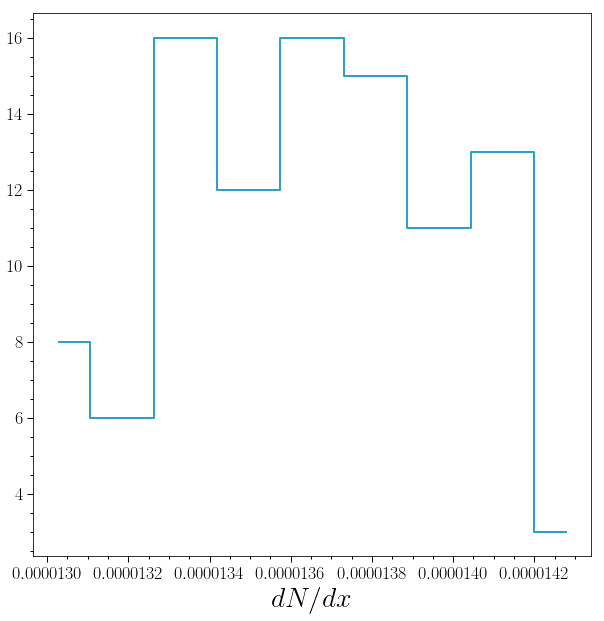

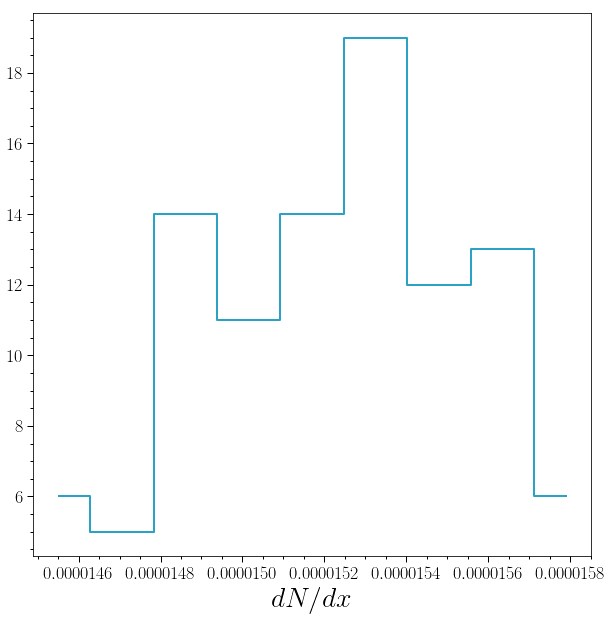

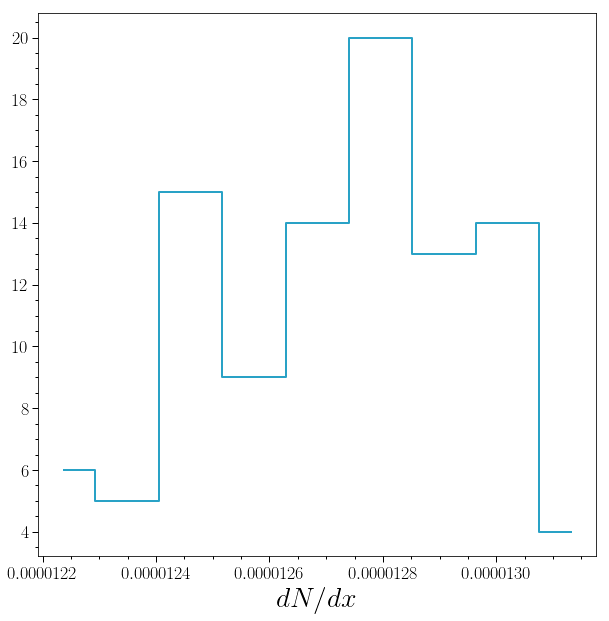

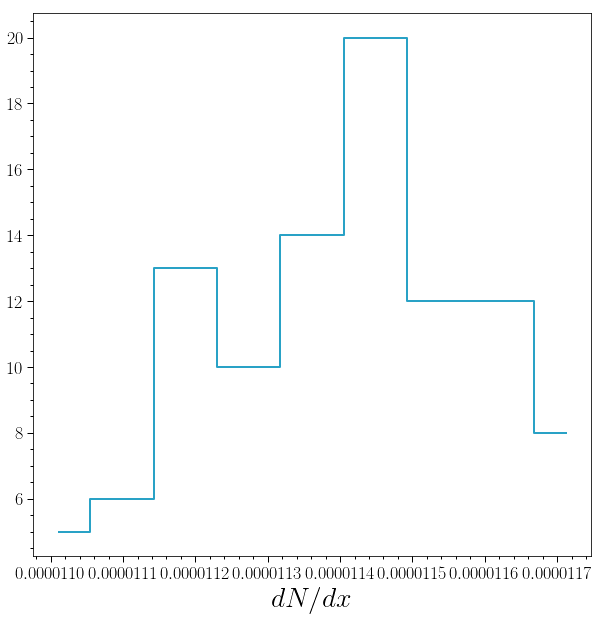

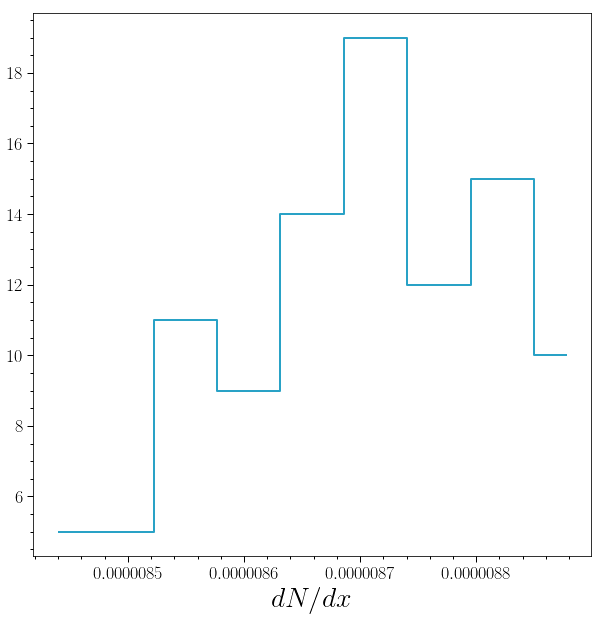

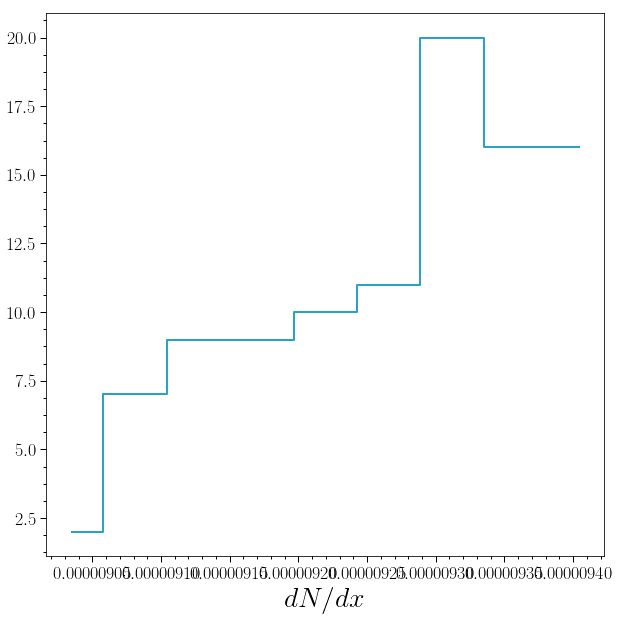

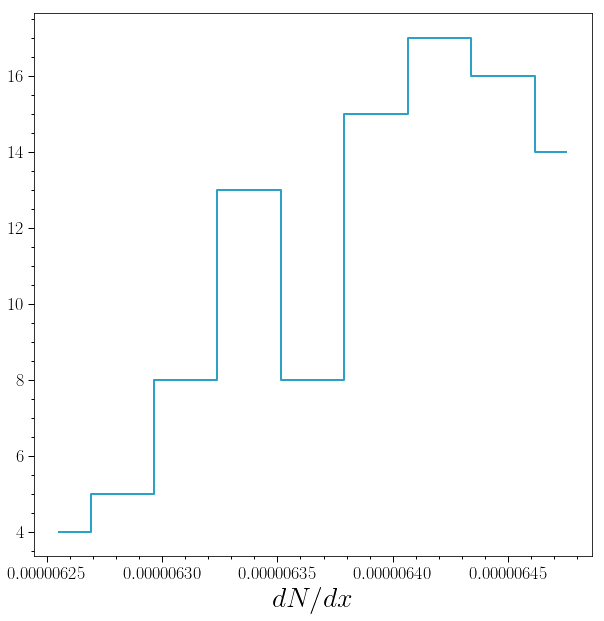

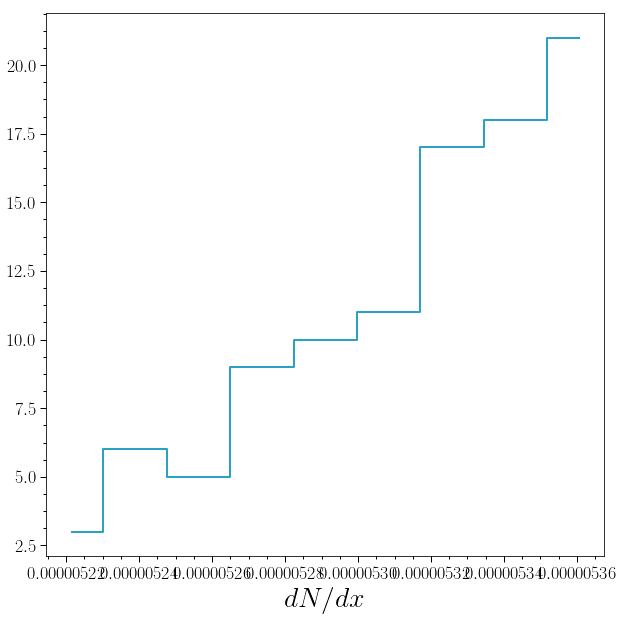

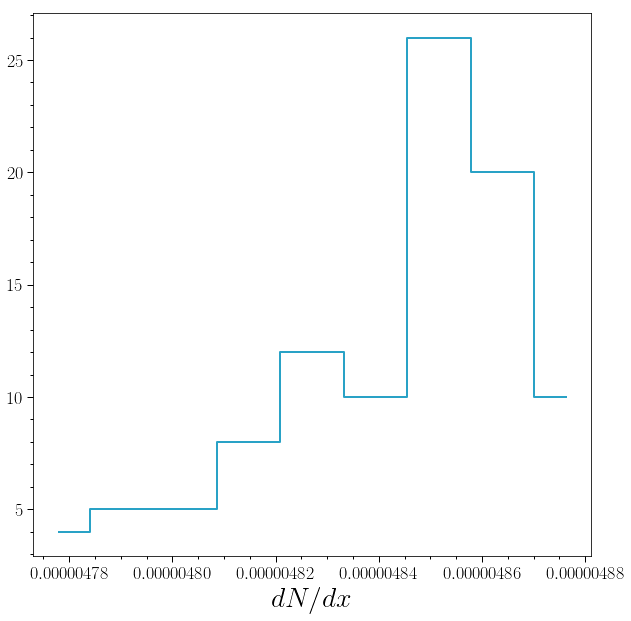

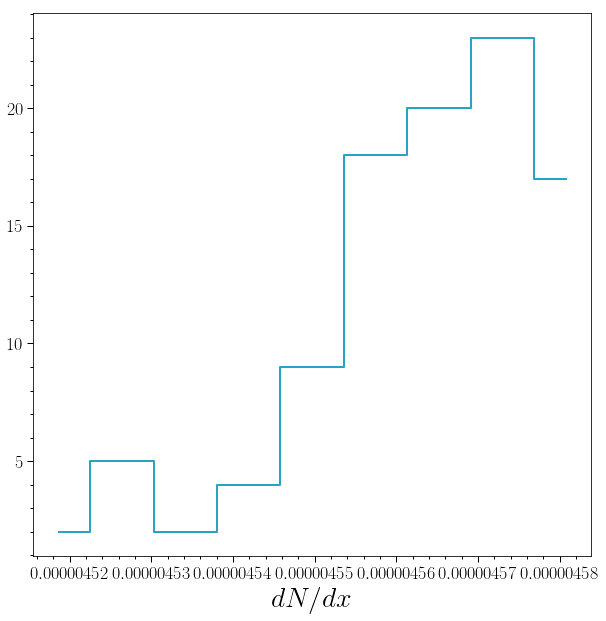

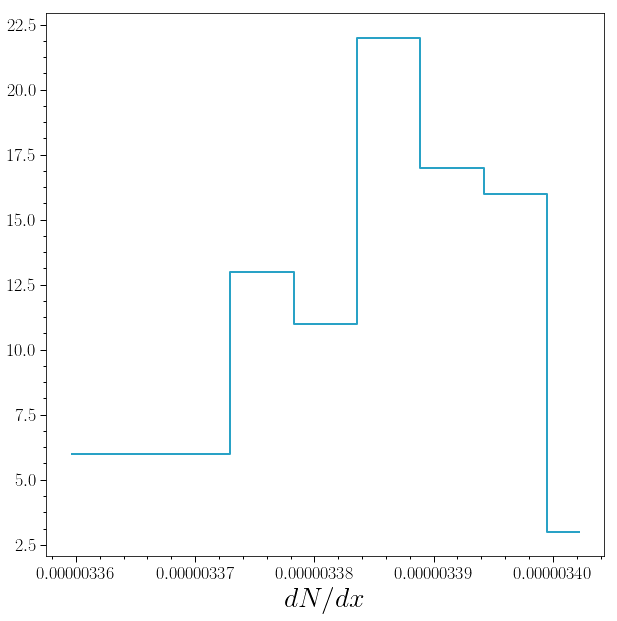

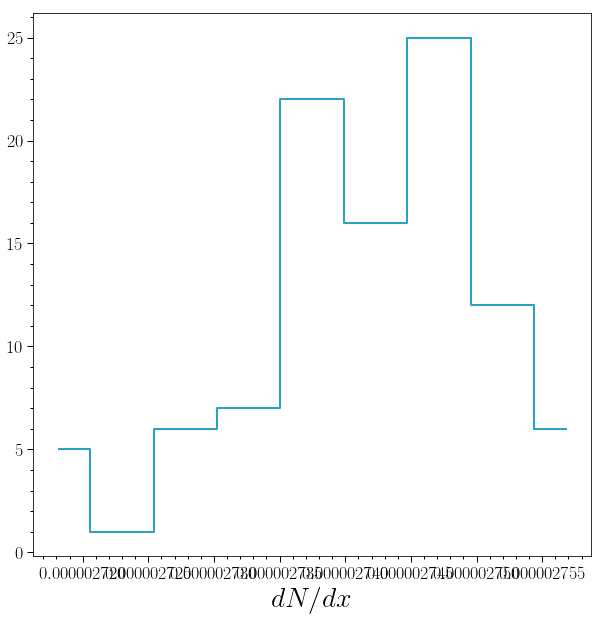

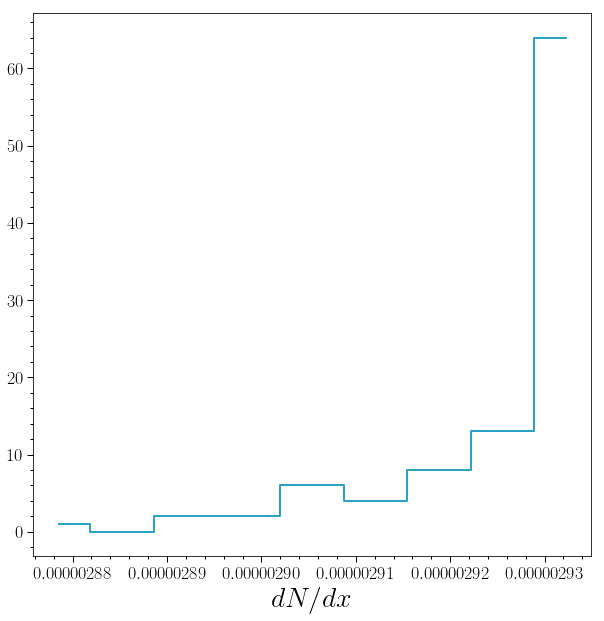

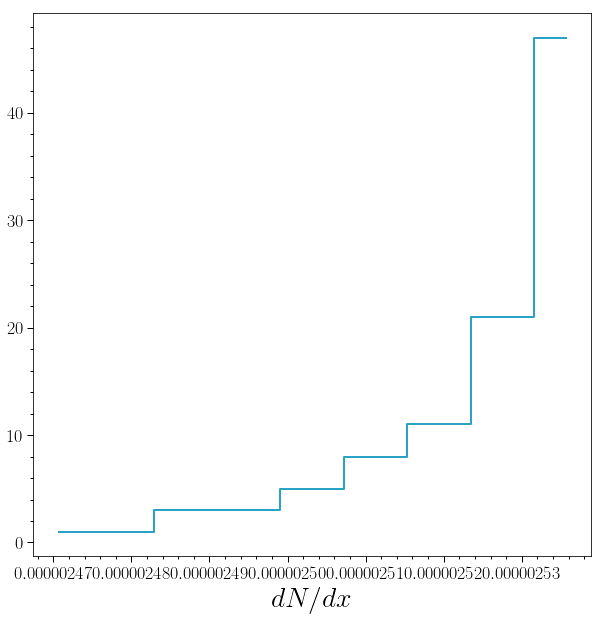

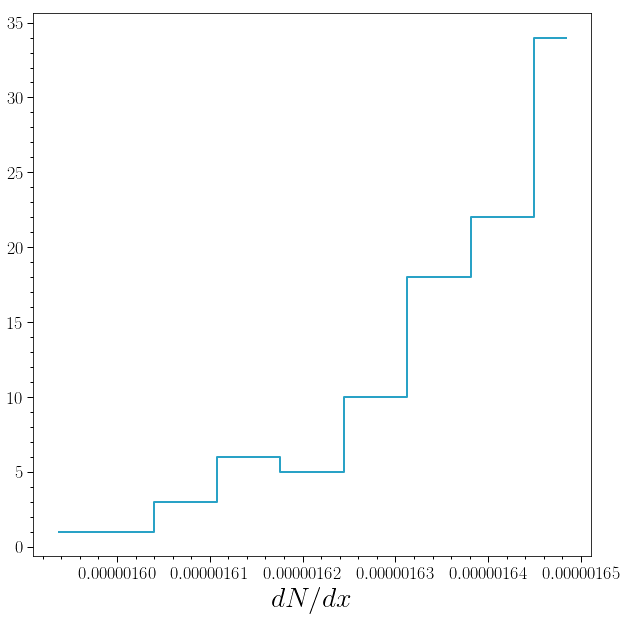

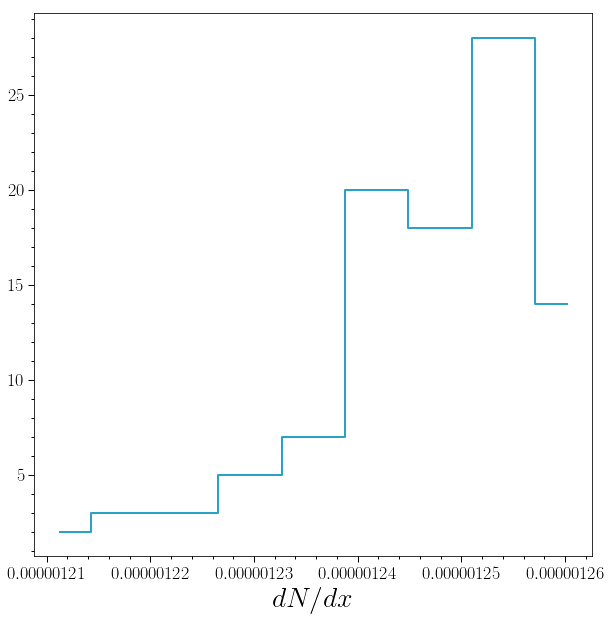

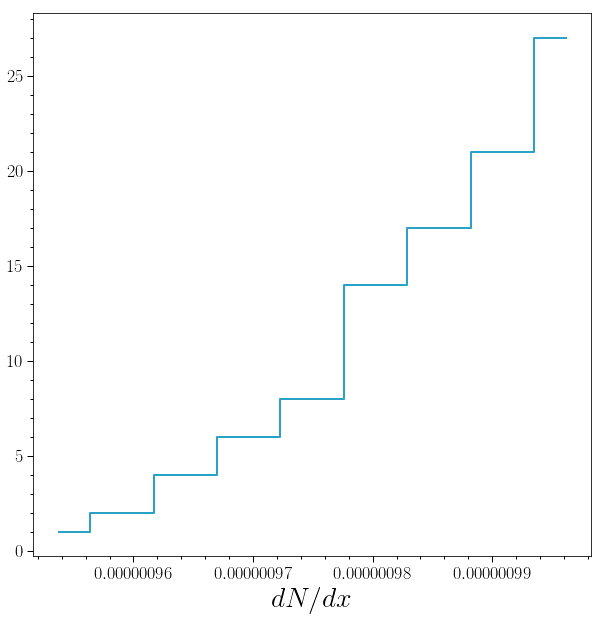

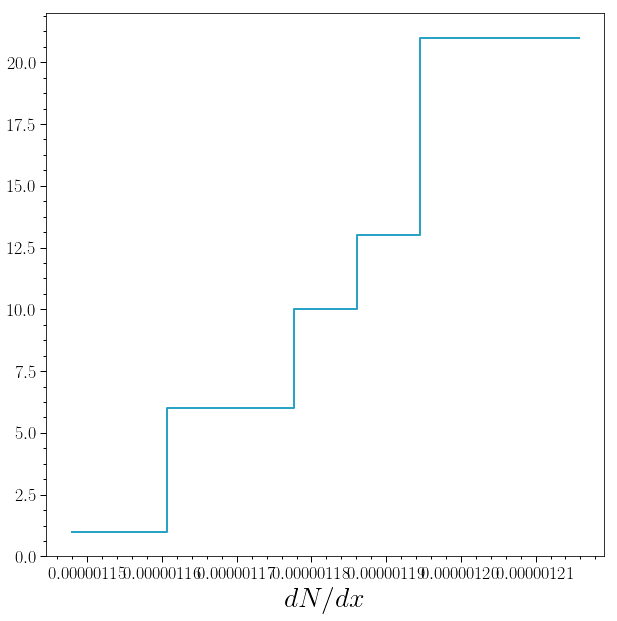

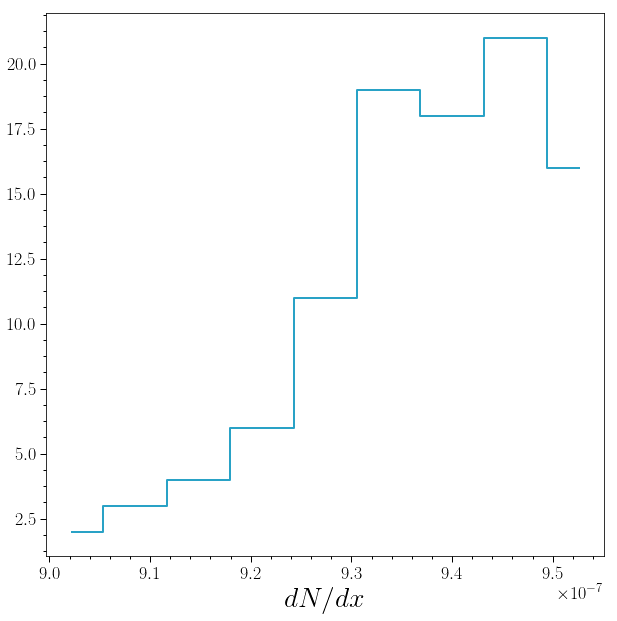

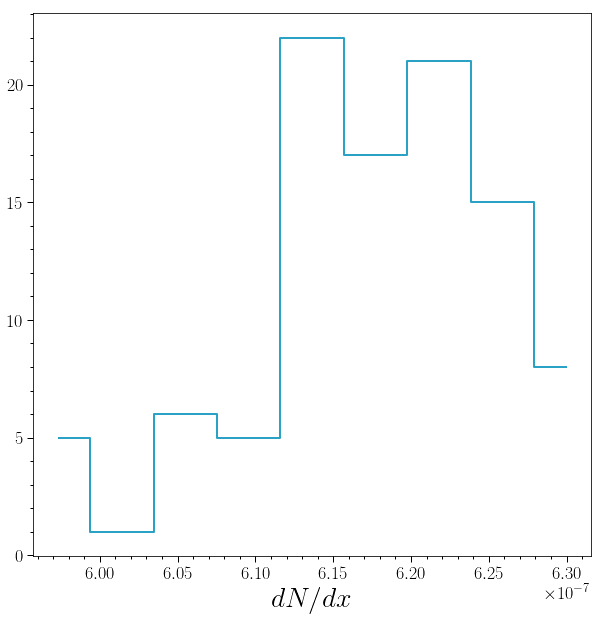

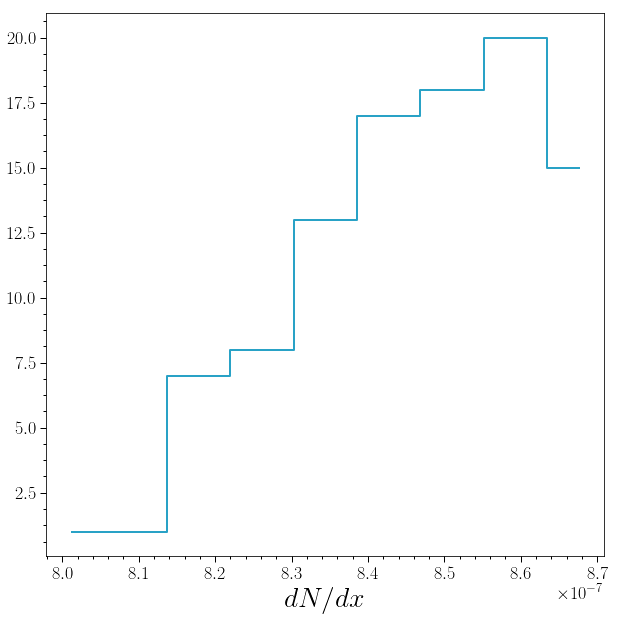

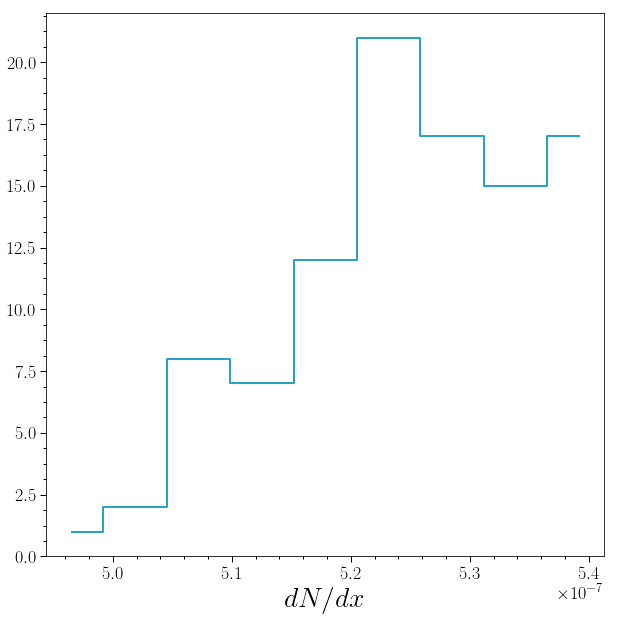

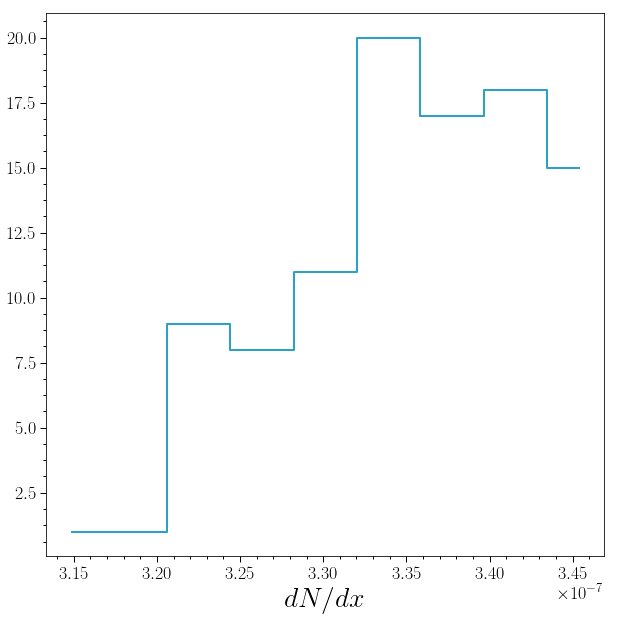

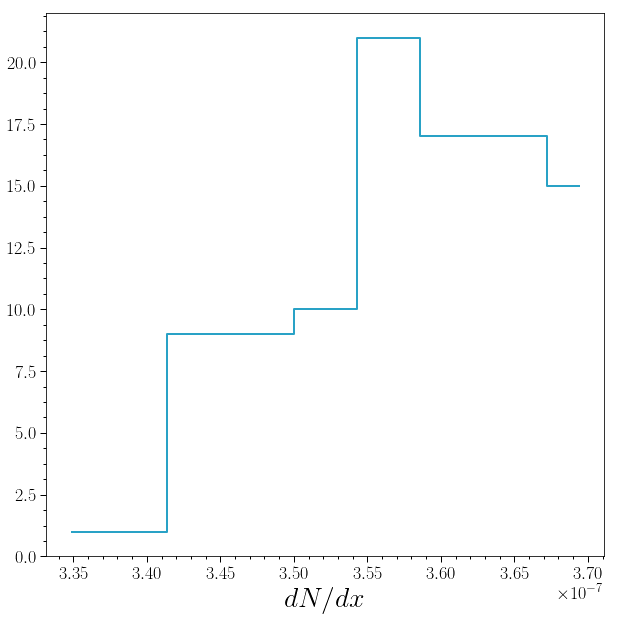

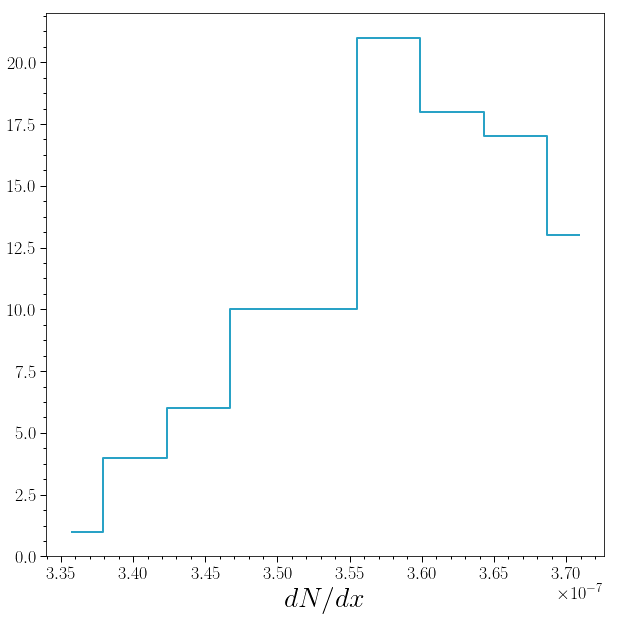

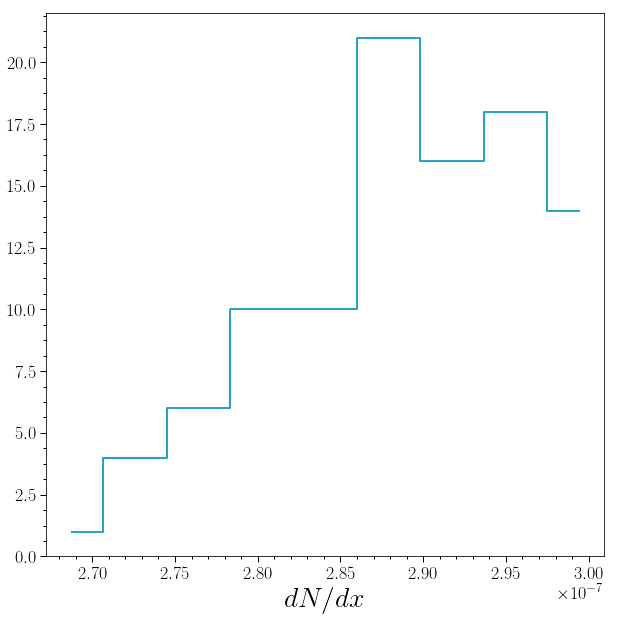

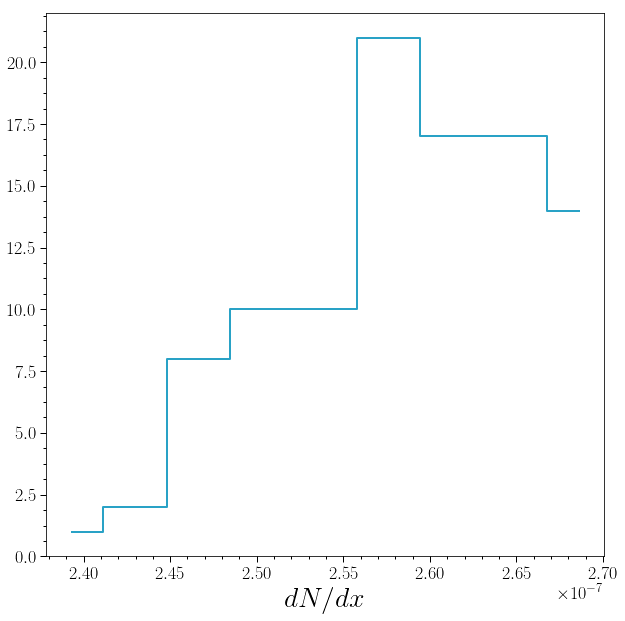

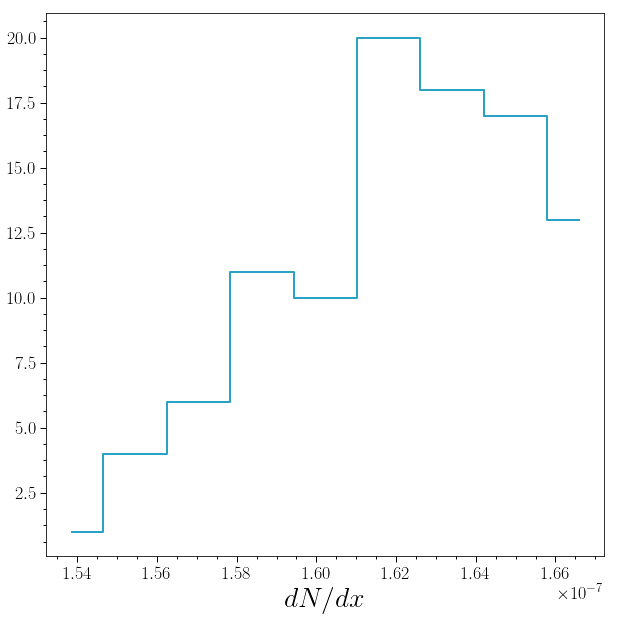

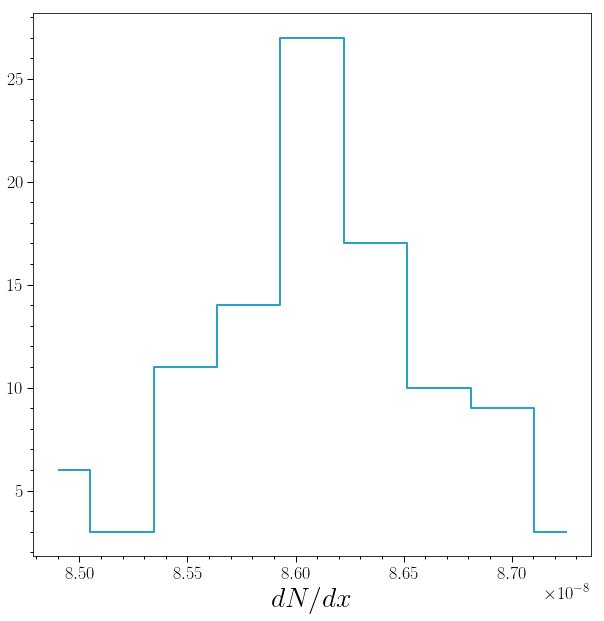

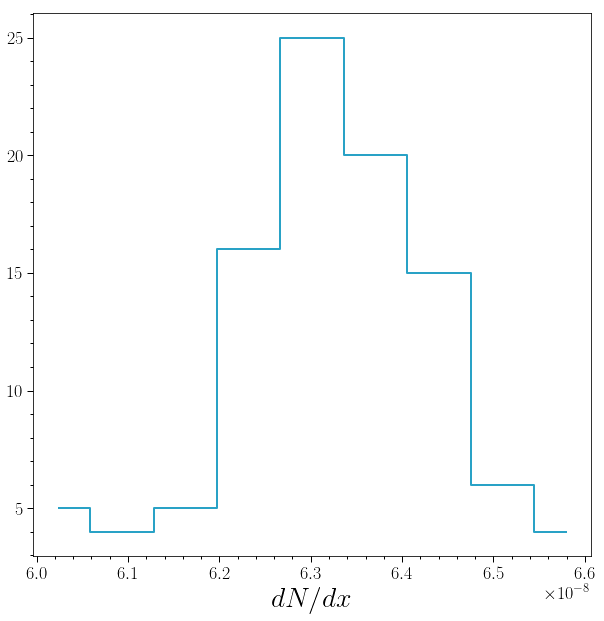

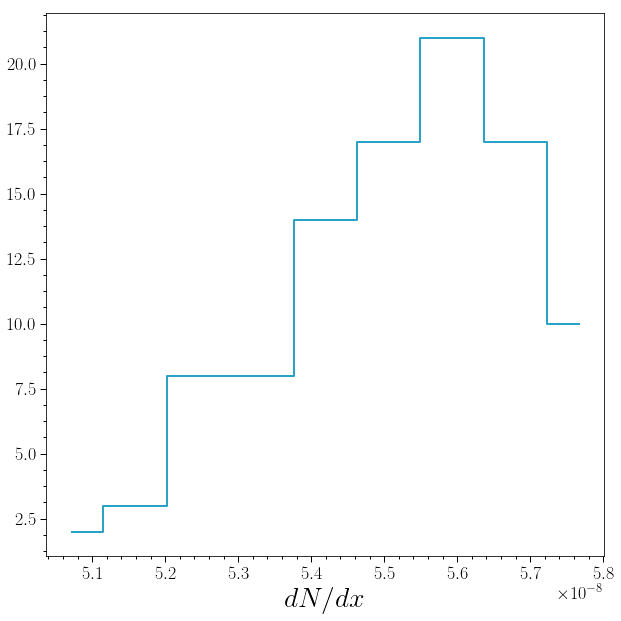

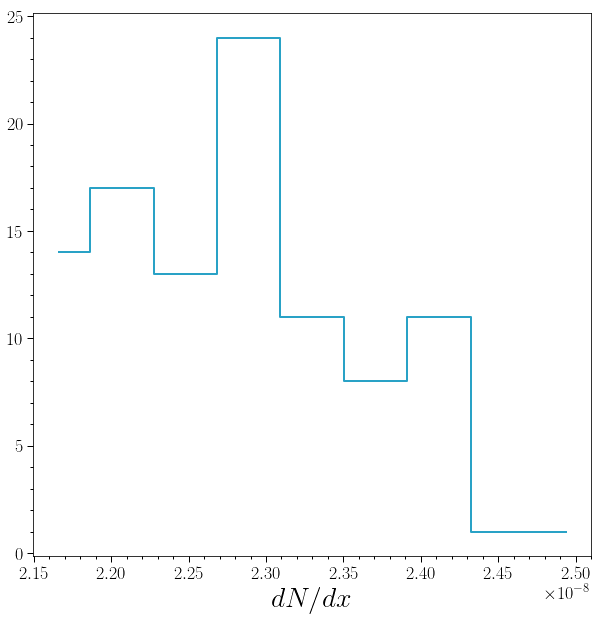

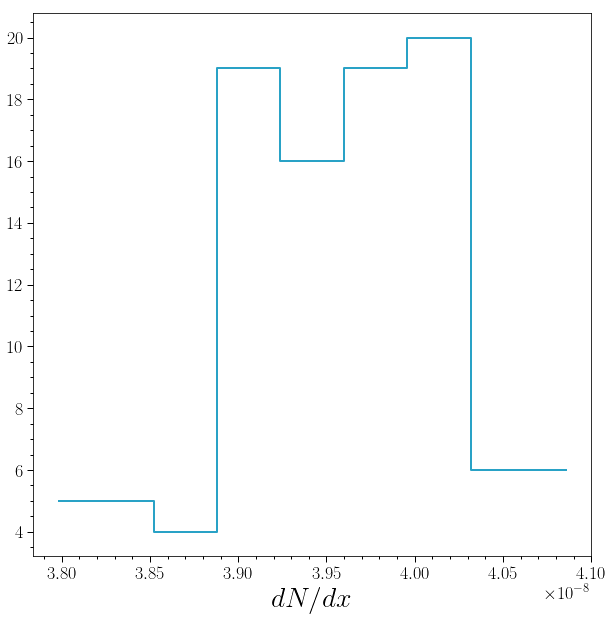

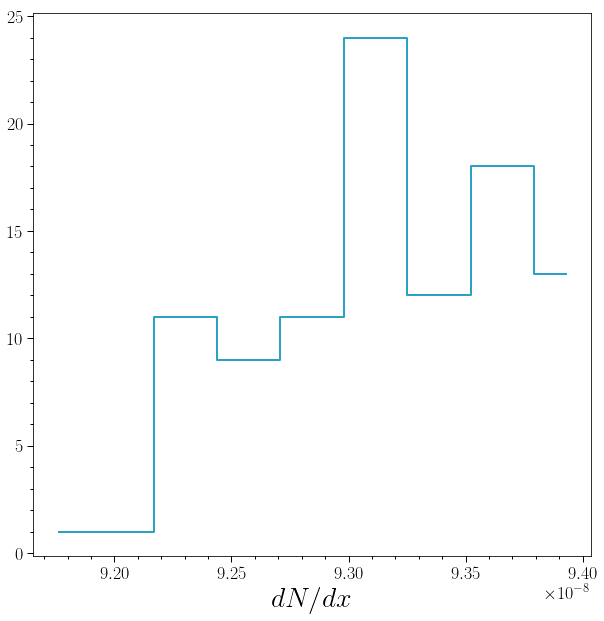

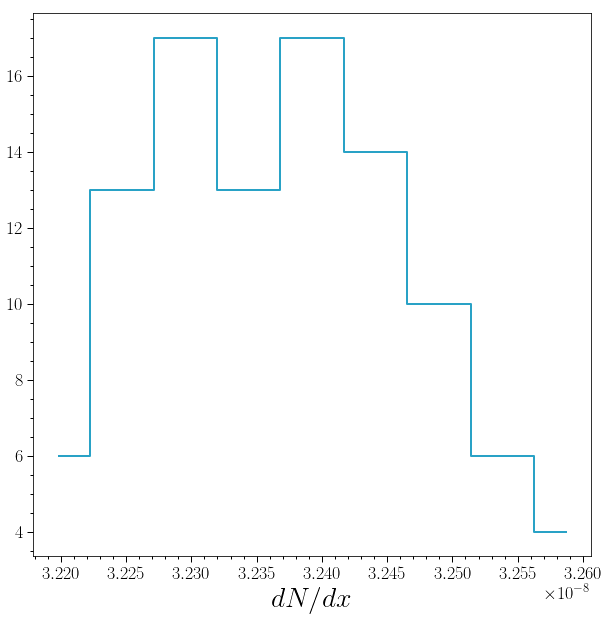

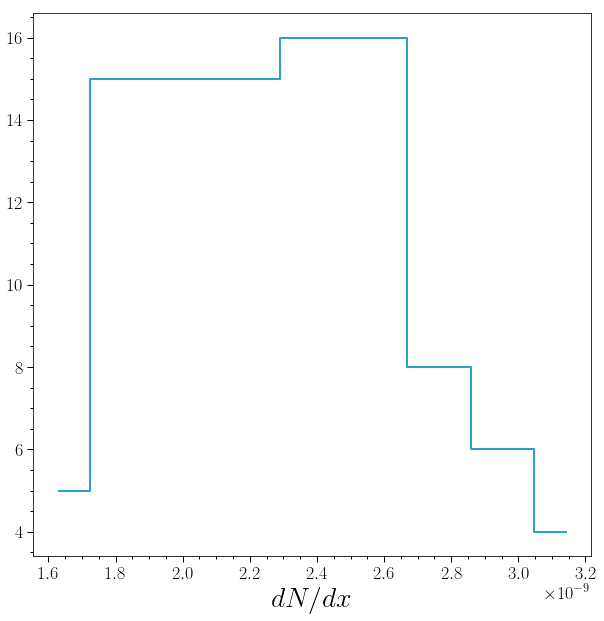

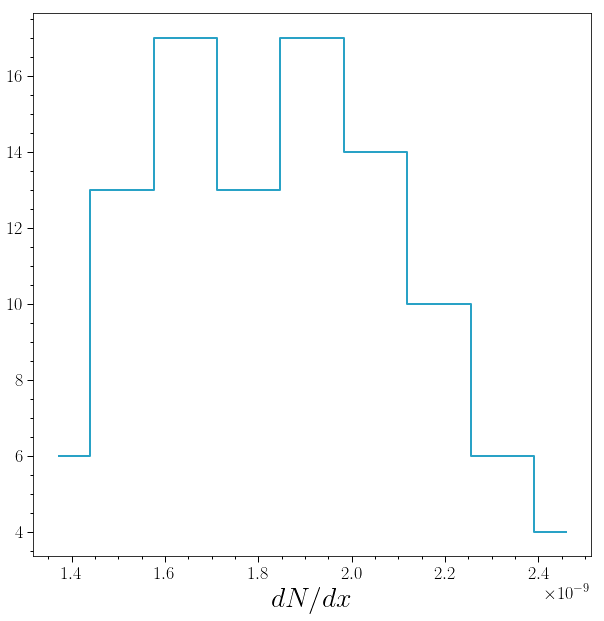

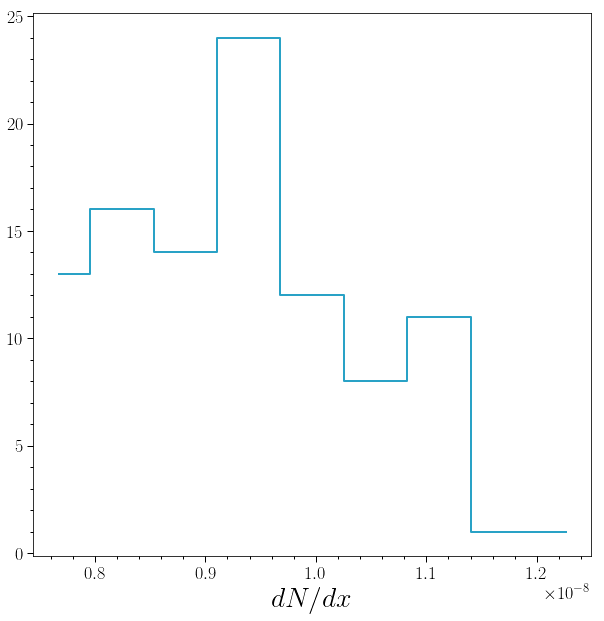

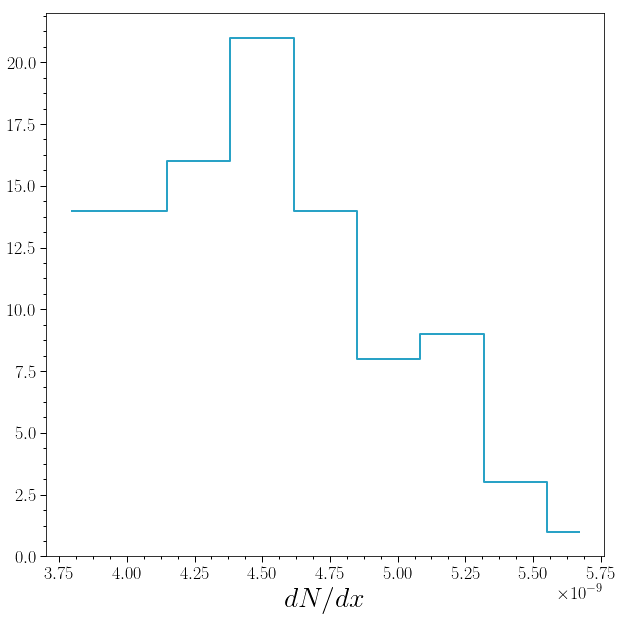

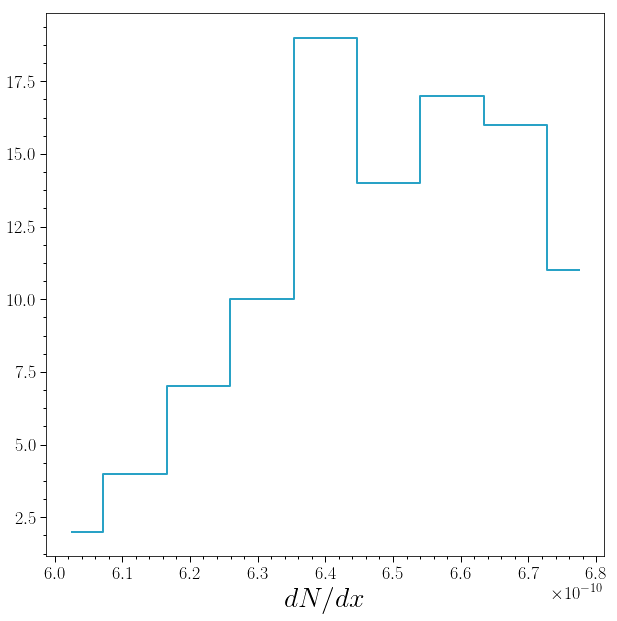

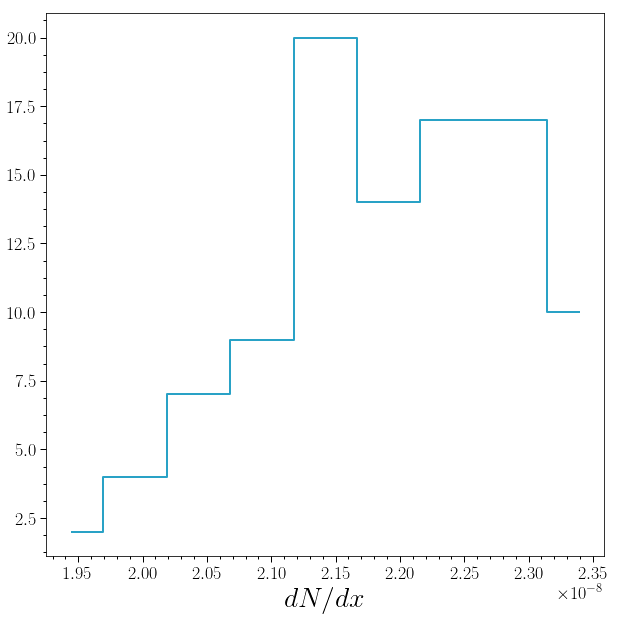

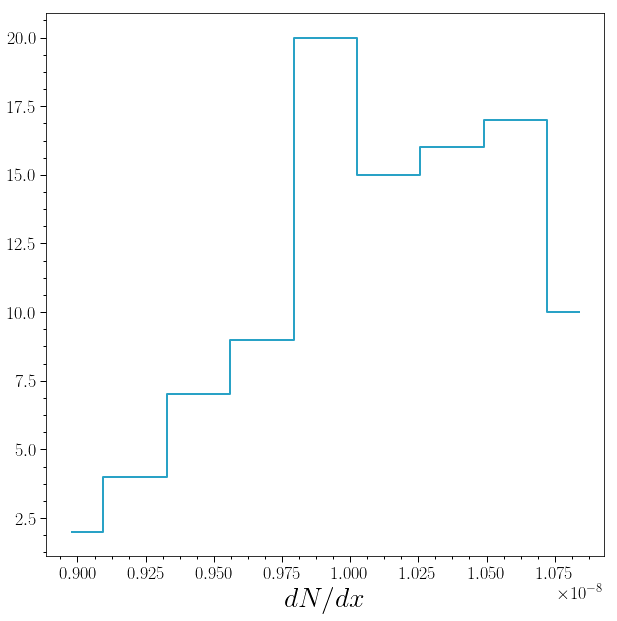

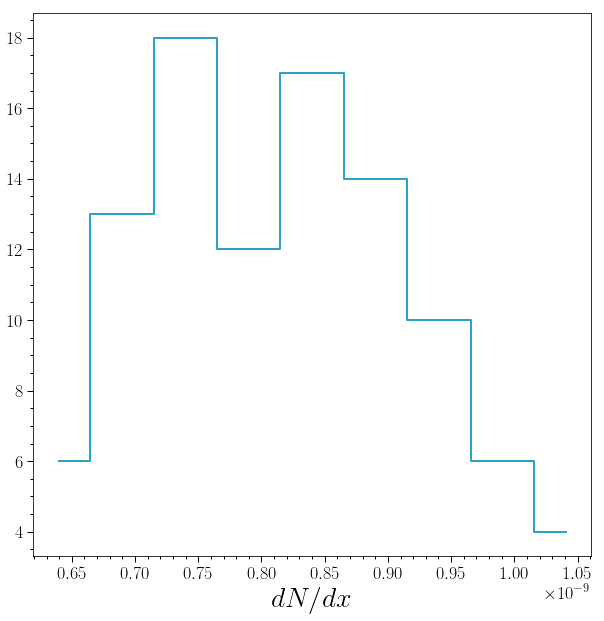

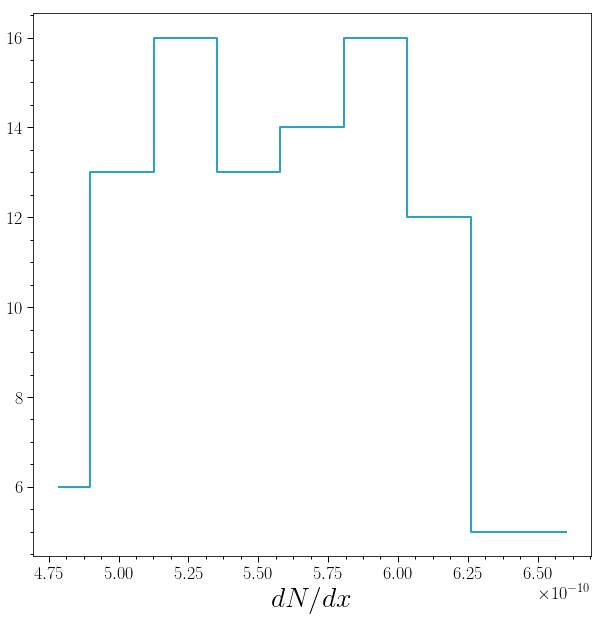

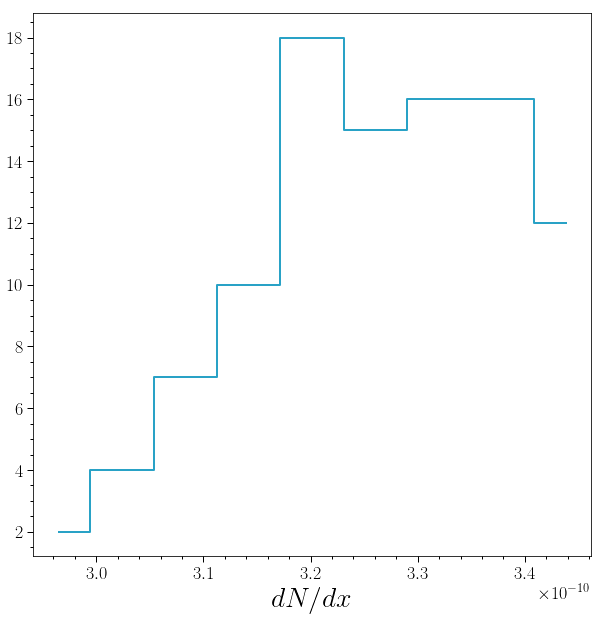

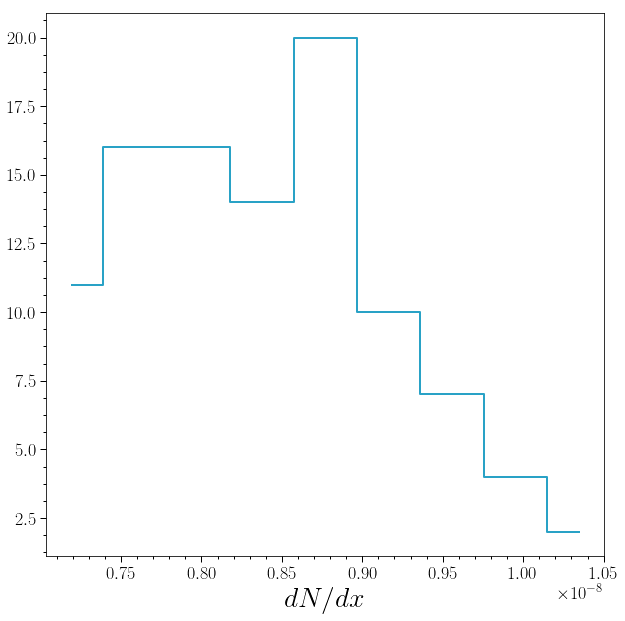

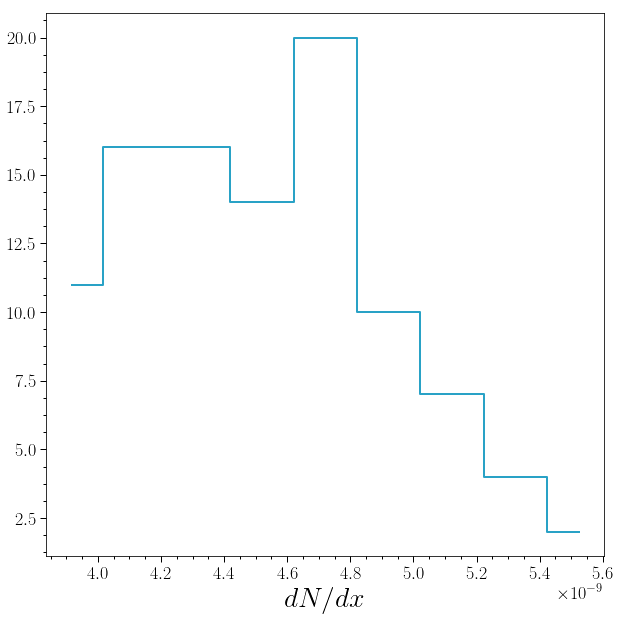

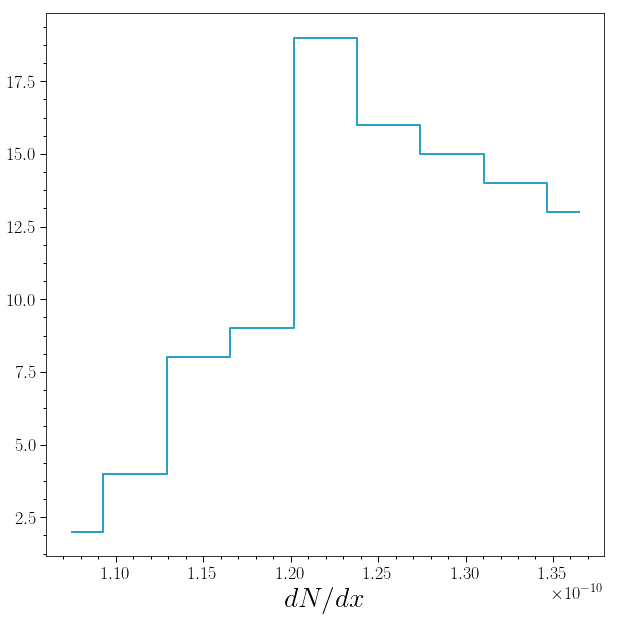

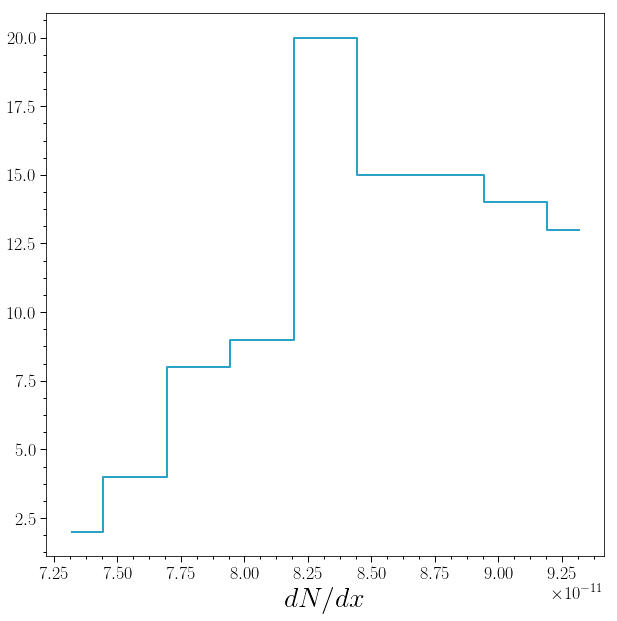

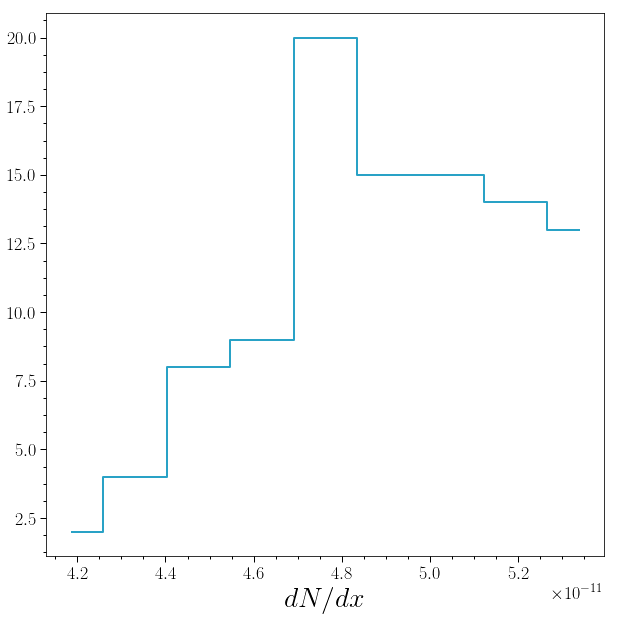

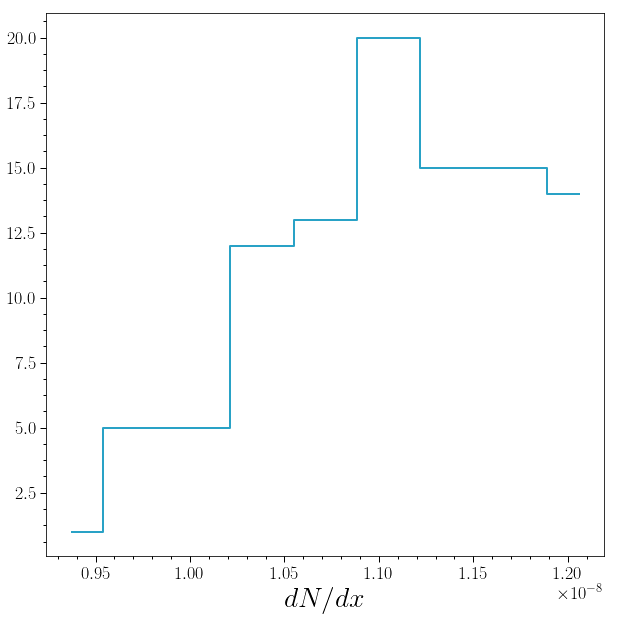

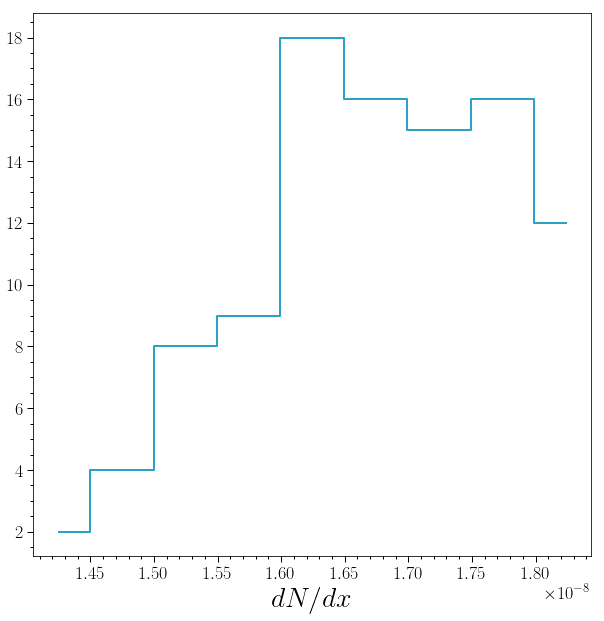

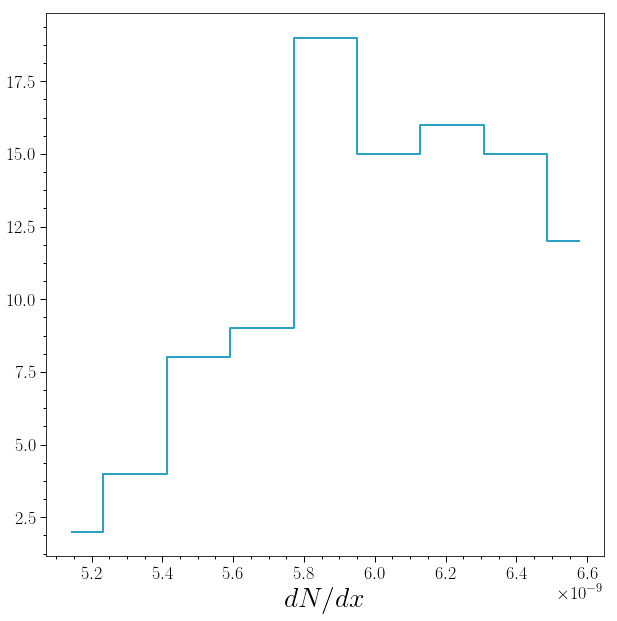

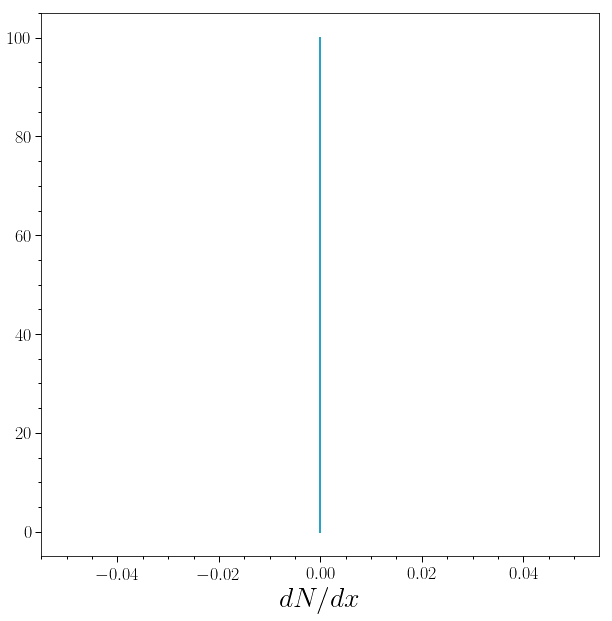

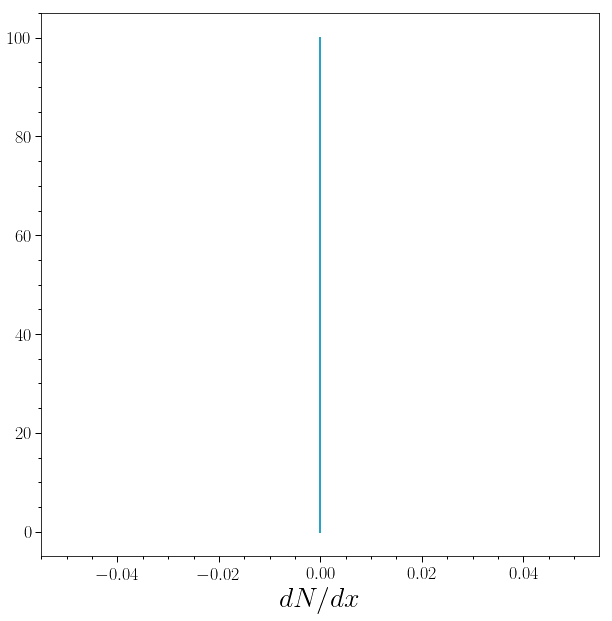

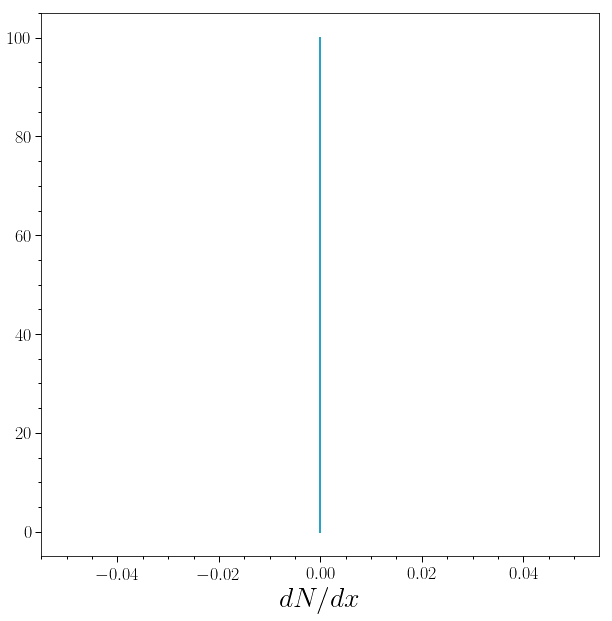

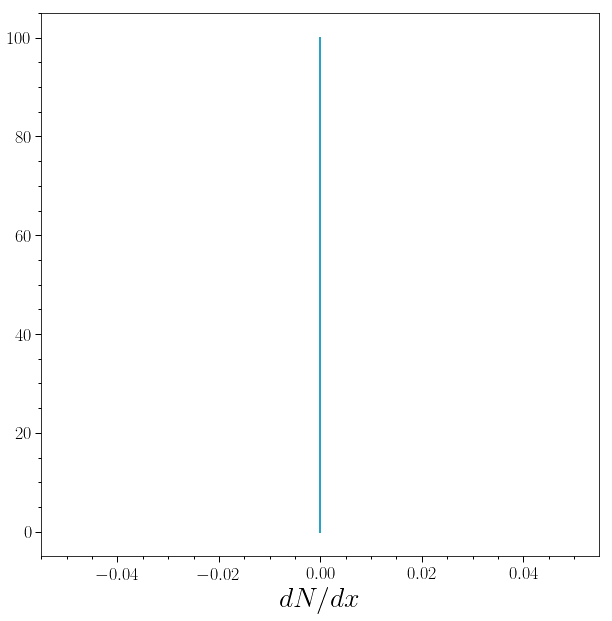

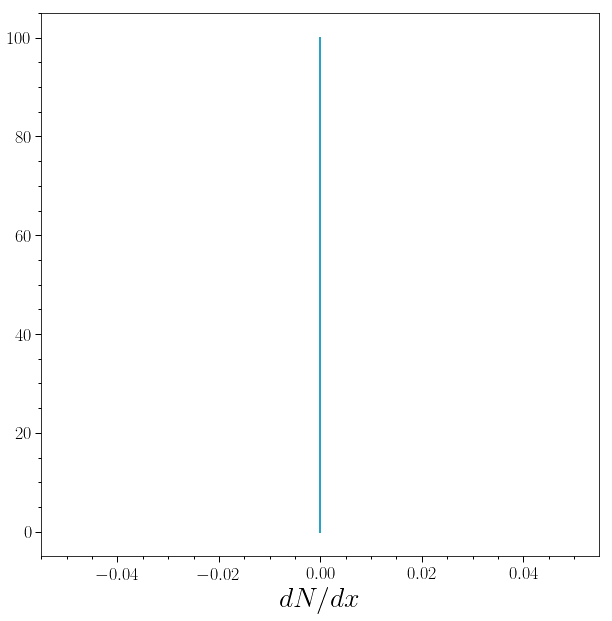

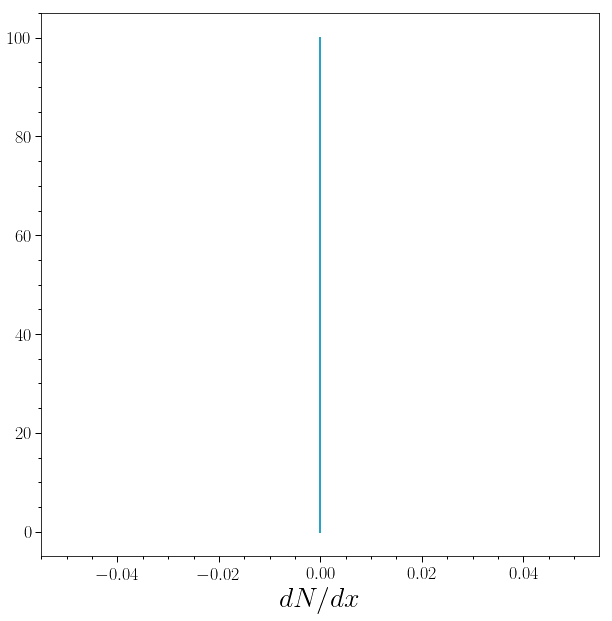

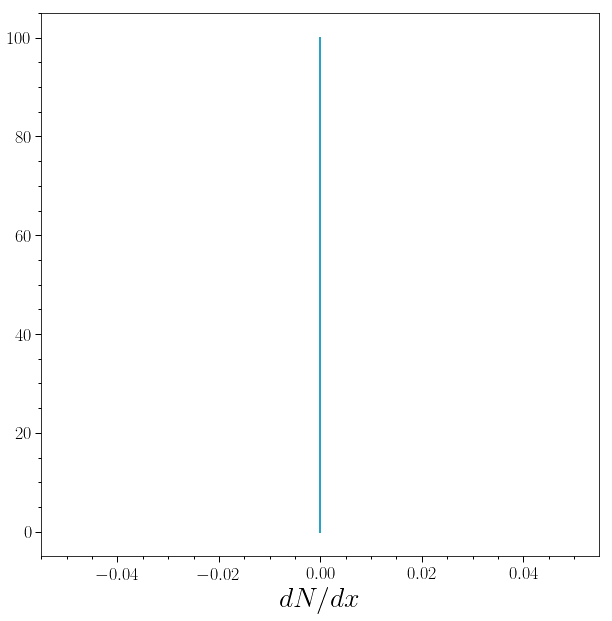

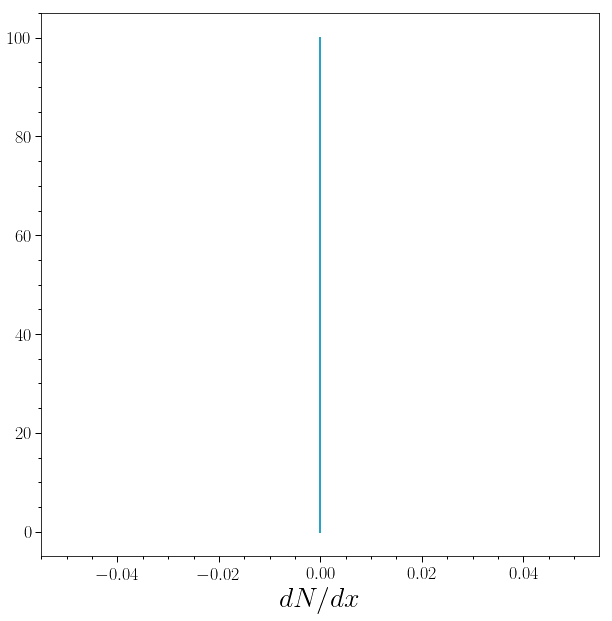

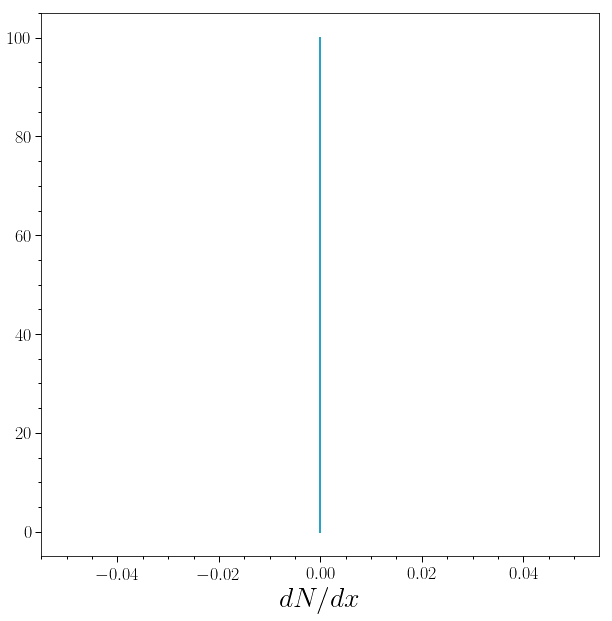

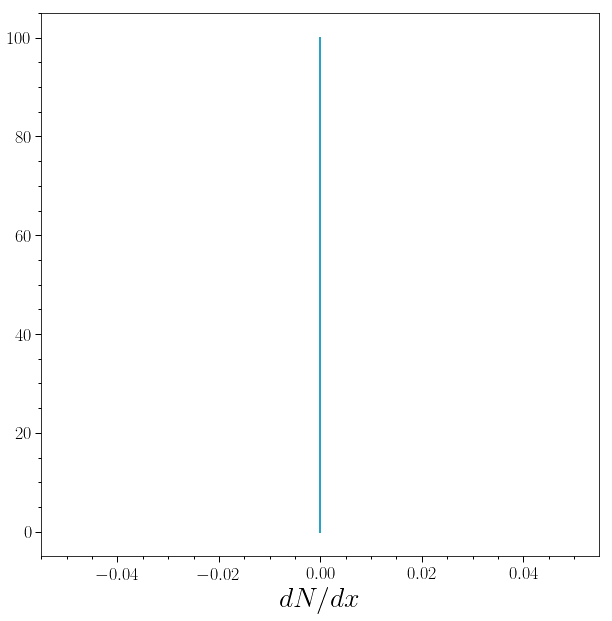

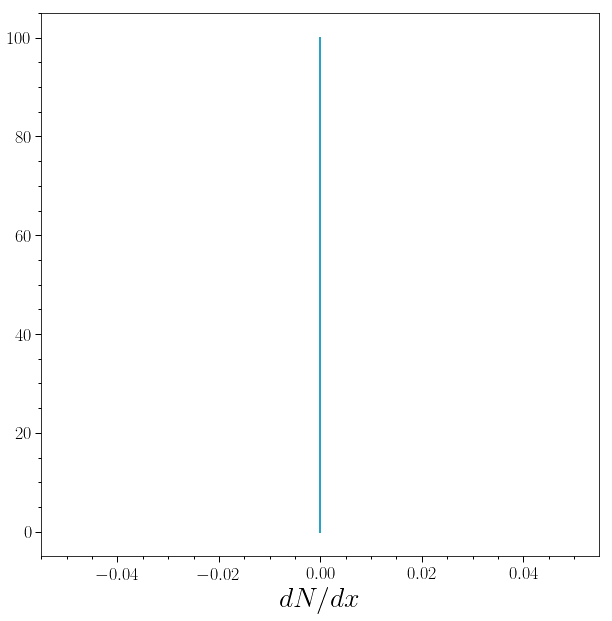

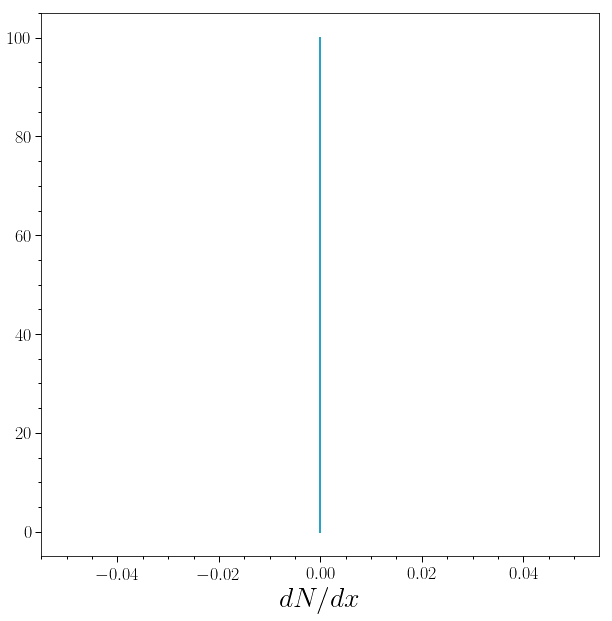

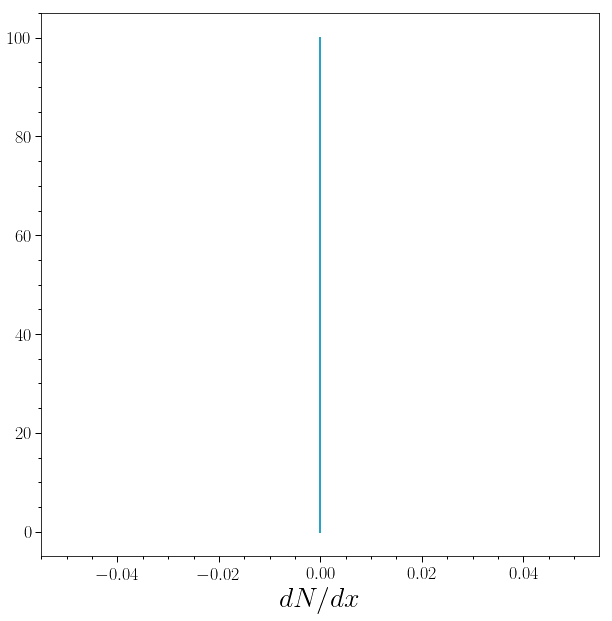

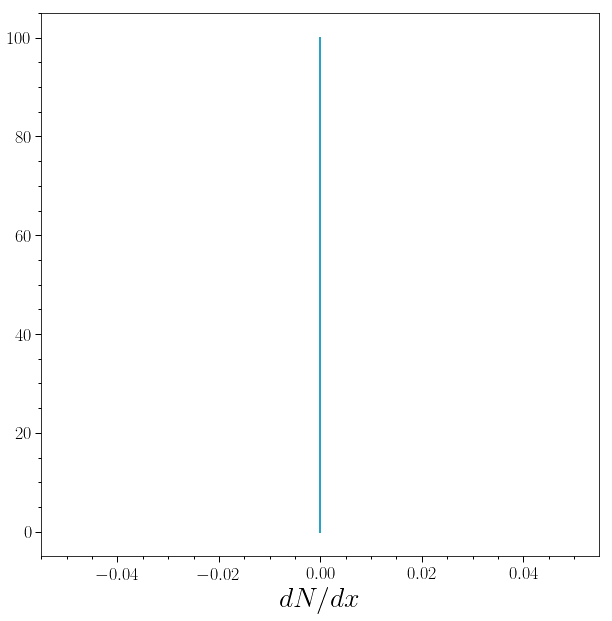

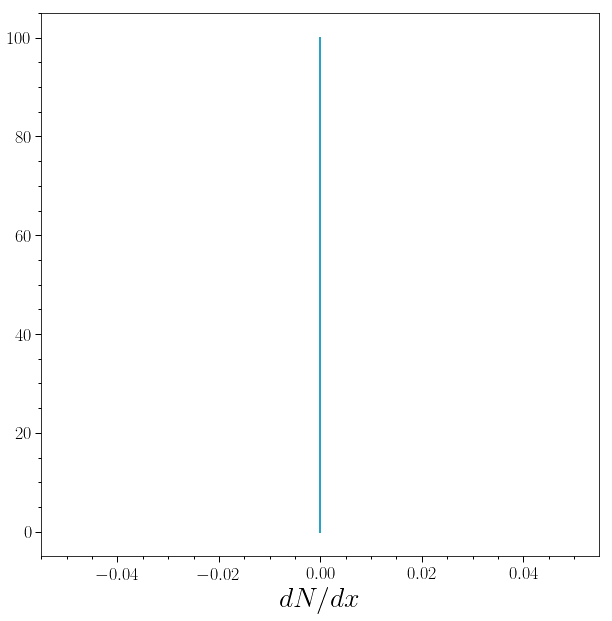

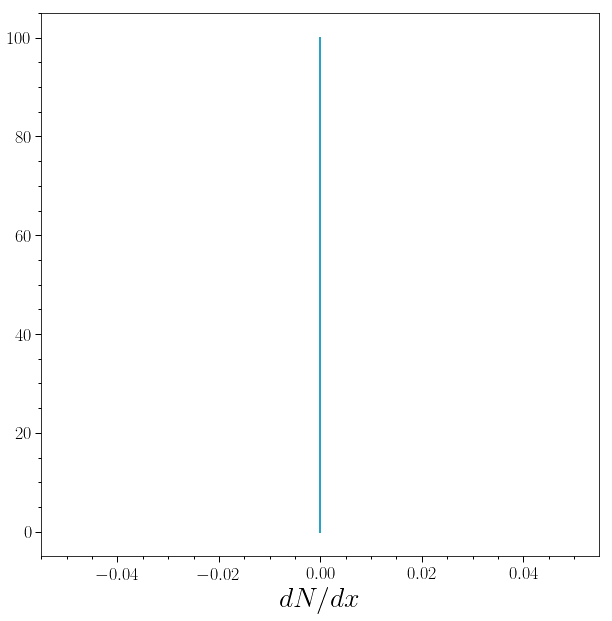

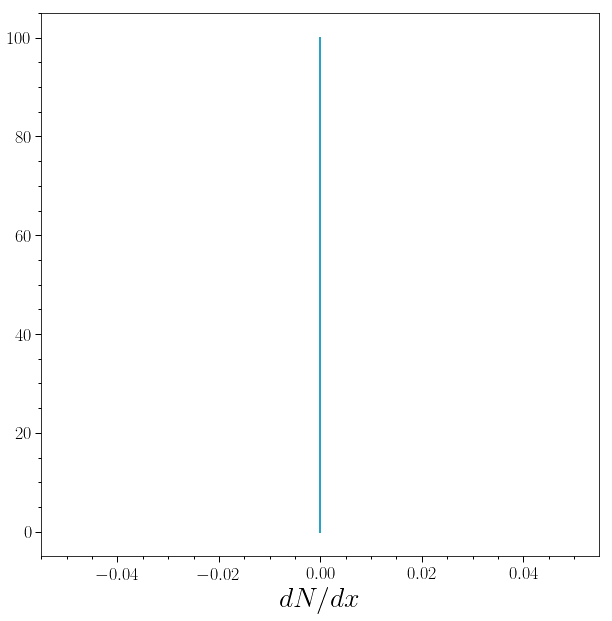

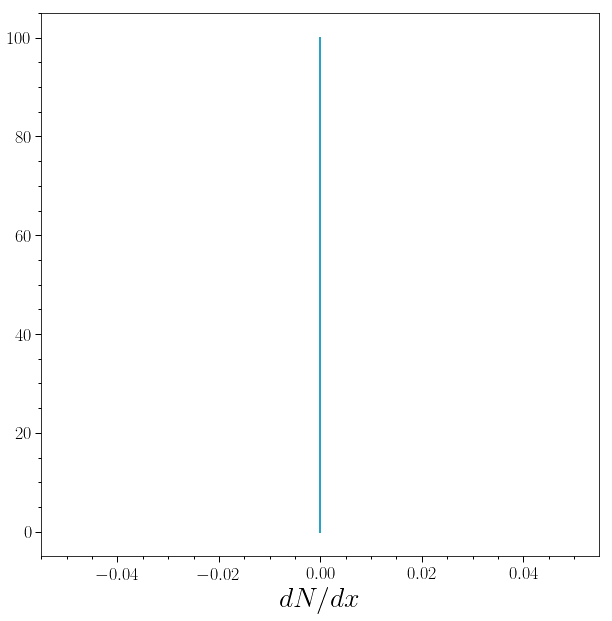

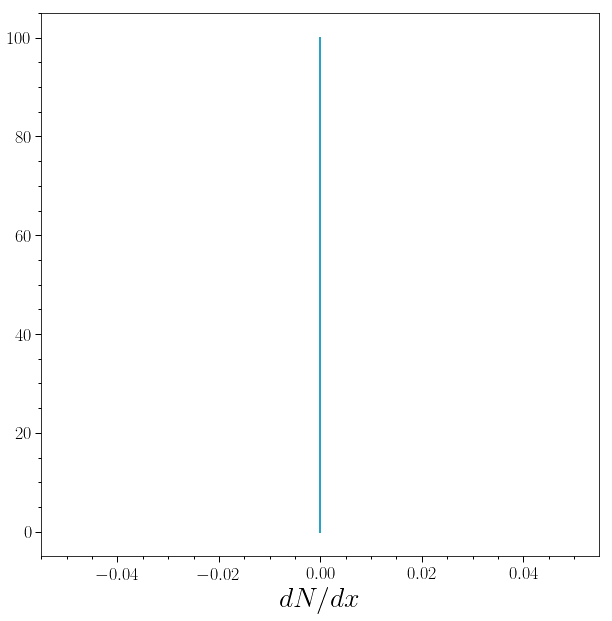

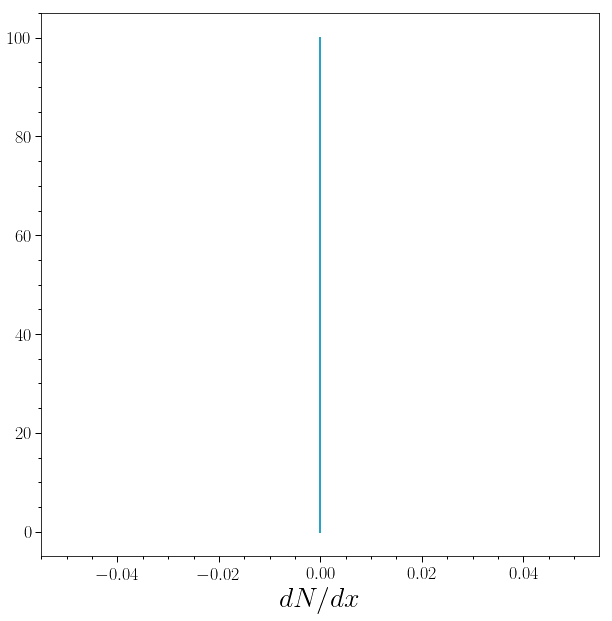

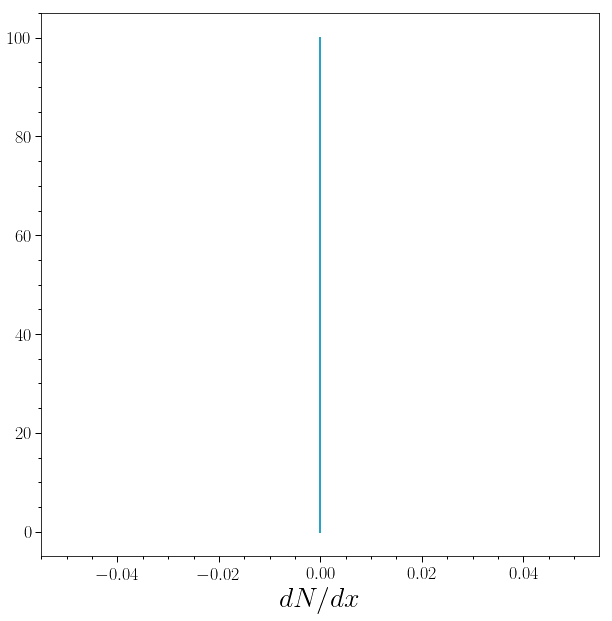

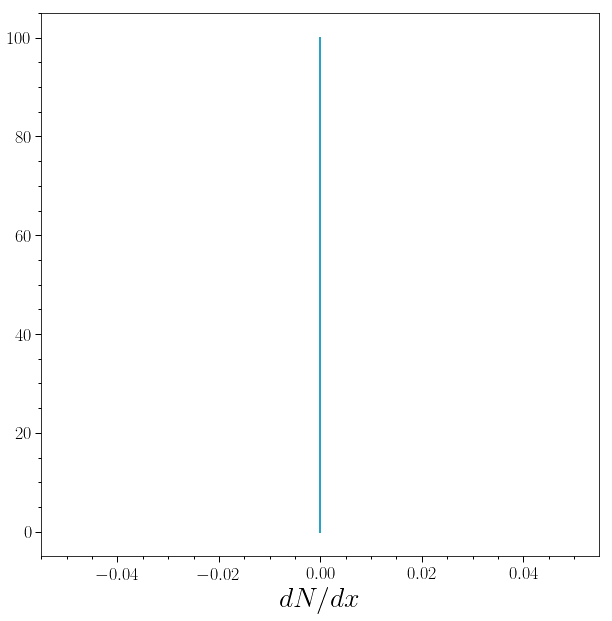

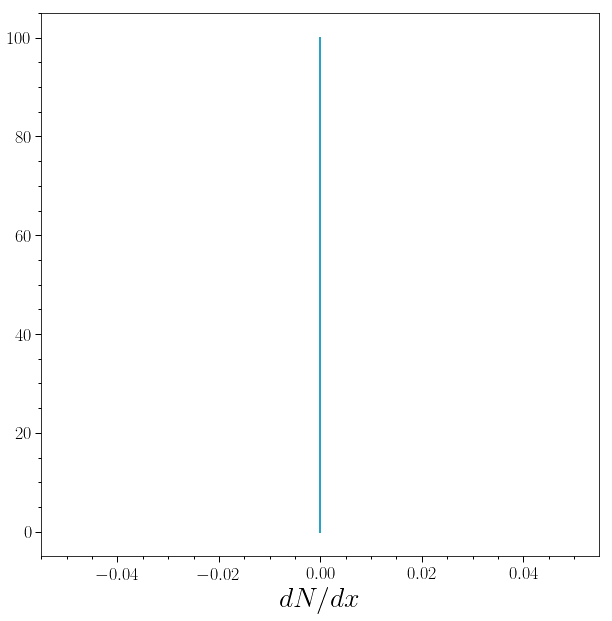

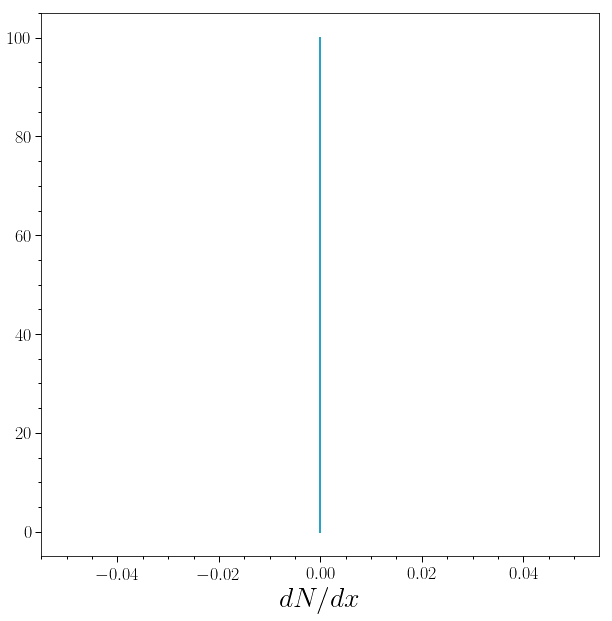

In [22]:
for arr in fluxes[:,0,:].T:
#     h     = np.histogram(arr, bins=np.logspace(np.log10(min(arr)), np.log10(max(arr)), 10))
    h     = np.histogram(arr, bins=np.linspace(min(arr), max(arr), 10))
    cents = (h[1][:-1]+h[1][1:])/2
    plt.step(cents, h[0], where='mid')
#     plt.semilogx()
    plt.xlabel(r'$dN/dx$')
    plt.show()

In [134]:
ch = 5
m  = 1000
ordering = 'no'

def gen_error_bounds(ch, m, ordering, which=['xs', 'osc', 'tot'], alpha=0.9545):
    
    if which=='tot':
        savedir = '/data/user/jlazar/solar_WIMP/data/total_uncertainties/'
    elif which=='xs':
        savedir = '/data/user/jlazar/solar_WIMP/data/xs_uncertainties/'
    else:
        savedir = '/data/user/jlazar/solar_WIMP/data/param_uncertainties/'

    if ordering=='no':
        nominal = np.load('/data/user/jlazar/solar_WIMP/data/param_uncertainties/%d_%d_33.820000_48.300000_8.610000_0.000074_0.002523_222.000000.npy' % (ch, m)) / float(m)
    elif ordering=='io':
        nominal = np.load('/data/user/jlazar/solar_WIMP/data/param_uncertainties/%d_%d_33.820000_48.600000_8.650000_0.000074_-0.002509_285.000000.npy' % (ch, m)) / float(m)
        
    flux_fs = sorted(glob.glob('%s/%d_%d_%s*' % (savedir, ch, m, ordering)))
    fluxes = np.zeros((2, len(flux_fs), 200))/float(m)
    ee = np.linspace(10./float(m),1,200)    


    for i, fluxf in enumerate(flux_fs):
        flux = np.load(fluxf)/float(m)
        fluxes[:,i,:] = flux
    
    nu_upper_flux = []
    nu_lower_flux = []

    for i,fl in enumerate(fluxes[0,:,:].T):
        h                   = np.histogram(fl, bins=np.linspace(min(fl), max(fl), 100))    
        central_flux        = (h[1][1:]+h[1][:-1])/2
        probs               = [float(count)/np.sum(h[0]) for count in h[0]]
        central_flux, probs = zip(*sorted(zip(central_flux,probs), key=lambda x: x[1], reverse=True))
        cum_sum             = np.array(np.cumsum(probs))
        contained_fluxes    = np.asarray(central_flux)[np.where(cum_sum<alpha)[0]]
        if len(contained_fluxes)!=0:
            nu_upper_flux.append(np.max(contained_fluxes))
            nu_lower_flux.append(np.min(contained_fluxes))
        else:
            nu_upper_flux.append(0)
            nu_lower_flux.append(0)
            
    nubar_upper_flux = []
    nubar_lower_flux = []

    for i,fl in enumerate(fluxes[1,:,:].T):
        h                   = np.histogram(fl, bins=np.linspace(min(fl), max(fl), 100))    
        central_flux        = (h[1][1:]+h[1][:-1])/2
        probs               = [float(count)/np.sum(h[0]) for count in h[0]]
        central_flux, probs = zip(*sorted(zip(central_flux,probs), key=lambda x: x[1], reverse=True))
        cum_sum             = np.array(np.cumsum(probs))
        contained_fluxes    = np.asarray(central_flux)[np.where(cum_sum<alpha)[0]]
        if len(contained_fluxes)!=0:
            nubar_upper_flux.append(np.max(contained_fluxes))
            nubar_lower_flux.append(np.min(contained_fluxes))
        else:
            nubar_upper_flux.append(0)
            nubar_lower_flux.append(0)
            
    return nominal, np.vstack([nu_upper_flux,nubar_upper_flux]), np.vstack([nu_lower_flux,nubar_lower_flux])

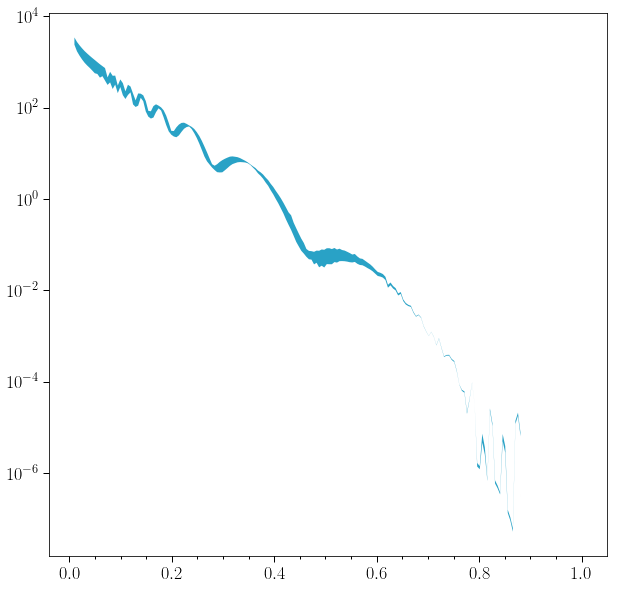

In [114]:
plt.fill_between(ee, up,low)
plt.semilogy()
plt.show()

In [154]:
def plot_uncertainty(ch, m, save=False, ylim=(1e-6, 1e1), which=['xs', 'osc', 'tot'], alpha=0.9545):
    
    
    lw=1
    cmap = cm.get_cmap('RdYlBu')
    xx = np.linspace(10./float(m),1,200)    
    lw=1.5
    blw = 0.5
    
    nice_chs_strs = {5:r'b\bar{b}', 8:r'W^{+}W^{-}'}
    text_str      = r'$%s,\, m_{\chi}=%d\,\rm{GeV}$' % (nice_chs_strs[ch], m)
    text_pos      = get_text_pos(ch, m)
    
    cnuno = cmap(0.7)
    cnubarno = cmap(0.9)
    cnuio = cmap(0.3)
    cnubario = cmap(0.1)
    
    fig = plt.figure(figsize=(13.5,7.5))
    gs  = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[4,1], hspace=0.29, wspace=0.02)
    axs = [plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1])]
        
    # Top left panel
    nominal, upper, lower = gen_error_bounds(ch, m, 'no', alpha=alpha, which=which)
    
    axs[0].plot(xx, upper[1], lw=blw, color=cnubarno)
    axs[0].plot(xx, lower[1], lw=blw, color=cnubarno)
    axs[0].plot(xx, nominal[1], lw=lw, color=cnubarno, label=r'$\bar{\nu}_{\mu}$')
    axs[0].plot(xx, upper[0], lw=blw, color=cnuno)
    axs[0].plot(xx, lower[0], lw=blw, color=cnuno)
    axs[0].plot(xx, nominal[0], lw=lw, color=cnuno, label=r'$\nu_{\mu}$')
    
    axs[0].fill_between(xx, lower[0], upper[0], color=cnuno, alpha=0.5)
    axs[0].fill_between(xx, lower[1], upper[1], color=cnubarno, alpha=0.5)
    
    axs[0].text(text_pos[0], text_pos[1], r'\textbf{Normal ordering}', fontsize=18)
    axs[0].text(text_pos[2], text_pos[3], text_str, fontsize=18)
    
    axs[0].set_ylabel(r'$dN/dx\,\left[\rm{ann}^{-1}\right]$', fontsize=18)
    axs[0].legend(fontsize=18)
    axs[0].semilogy()
    axs[0].set_ylim(ylim)
    
    # Bottom left pannel
    axs[2].fill_between(xx, np.divide(upper[0], nominal[0]), np.divide(lower[0], nominal[0]),color=rgb2hex(cnuno[:3]), alpha=0.5)
    axs[2].fill_between(xx, np.divide(upper[1], nominal[1]), np.divide(lower[1], nominal[1]),color=rgb2hex(cnubarno[:3]), alpha=0.5)
    axs[2].set_ylabel(r'Ratio', fontsize=18)
    axs[2].set_ylim(0.3,1.7)
    
    # Top right panel
    nominal, upper, lower = gen_error_bounds(ch, m, 'io', alpha=alpha, which=which)
    
    axs[0].plot(xx, upper[1], lw=blw, color=cnubario)
    axs[0].plot(xx, lower[1], lw=blw, color=cnubario)
    axs[0].plot(xx, nominal[1], lw=lw, color=cnubario, label=r'$\bar{\nu}_{\mu}$')
    axs[0].plot(xx, upper[0], lw=blw, color=cnuio)
    axs[0].plot(xx, lower[0], lw=blw, color=cnuio)
    axs[0].plot(xx, nominal[0], lw=lw, color=cnuio, label=r'$\nu_{\mu}$')
    
    axs[0].fill_between(xx, lower[0], upper[0], color=cnuio, alpha=0.5)
    axs[0].fill_between(xx, lower[1], upper[1], color=cnubario, alpha=0.5)
    
    axs[0].text(text_pos[0], text_pos[1], r'\textbf{Inverted ordering}', fontsize=18)
    axs[0].text(text_pos[2], text_pos[3], text_str, fontsize=18)

    
    axs[1].legend(fontsize=18)
    axs[1].semilogy()
    axs[1].set_ylim(ylim)
    axs[1].yaxis.set_ticklabels([])
    
    # Bottom right panel
    axs[3].fill_between(xx, np.divide(upper[0], nominal[0]), np.divide(lower[0], nominal[0]),color=rgb2hex(cnuio[:3]), alpha=0.5)
    axs[3].fill_between(xx, np.divide(upper[1], nominal[1]), np.divide(lower[1], nominal[1]),color=rgb2hex(cnubario[:3]), alpha=0.5)
    axs[3].set_ylim(0.3,1.7)
    axs[3].yaxis.set_ticklabels([])
    
    for ax in axs:
        ax.set_xlabel(r'$x=E_{\nu}/m_{\chi}$', fontsize=18)
        ax.tick_params(direction='in', which='both')
        ax.set_xlim(0.1,1)
    
    if save:
        plt.savefig('plots/ch%d_m%d_xs_uncertainty.pdf' % (ch,m), bbox_inches='tight')
    
    plt.show()

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in divide
No handlers could be found for logger "matplotlib.legend"
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in divide
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in divide


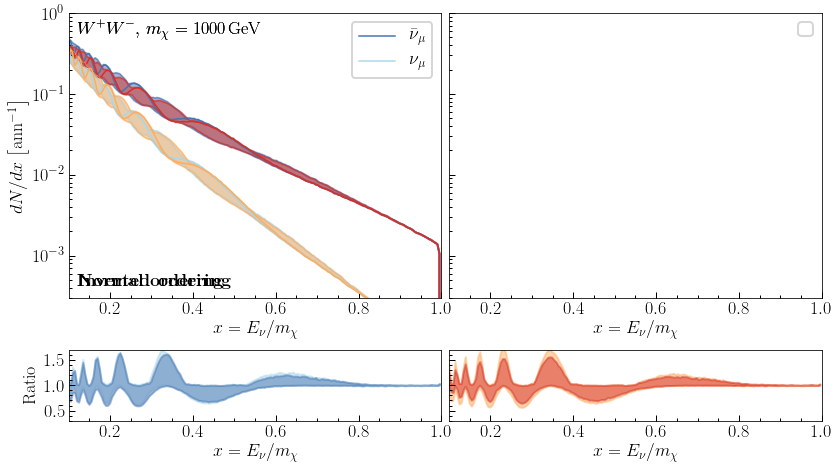

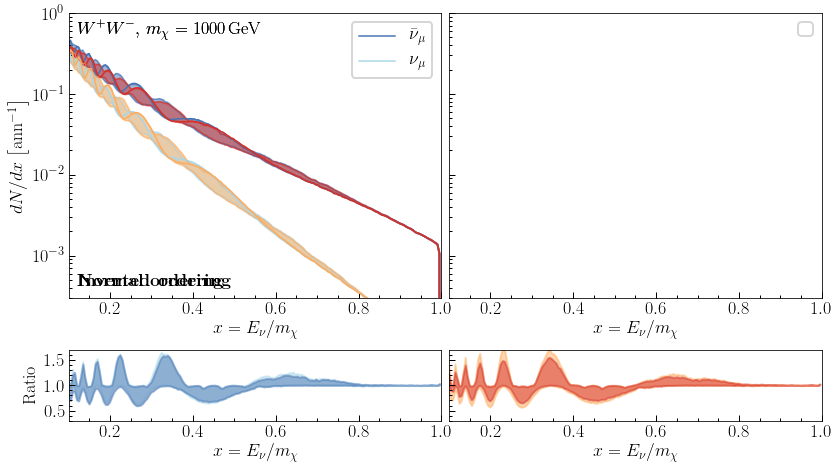

In [155]:
ch=8
m=1000
plot_uncertainty(ch, m, ylim=ylims[str(ch)+str(m)], alpha=0.997, which='tot')
plot_uncertainty(ch, m, ylim=ylims[str(ch)+str(m)], which='tot')

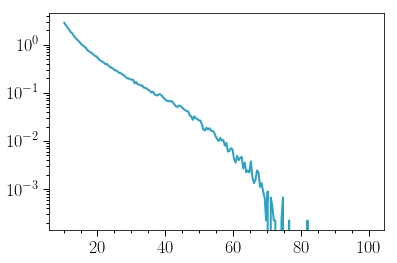

In [41]:
_ = np.genfromtxt('/data/user/jlazar/DMFlux/production/Halo/bb_100.0_1_Halo_ann_--0.dat')
plt.plot(_[:,0], _[:,1])
plt.semilogy()
plt.show()